<h1>1 Exploratory Data Analysis (EDA)</h1>

<h2>1.1 Dataset overview</h2>

<p>This dataset contains shipment and customer records from an international e-commerce company that sells electronic products</p>

<p>
ID – Unique identifier of the order

Warehouse_block – Warehouse from which the product was shipped

Mode_of_Shipment – Shipment method (Ship, Flight, Road)

Customer_care_calls – Number of customer service calls made for the order

Customer_rating – Customer rating of the service (1–5)

Cost_of_the_Product – Price of the product

Prior_purchases – Number of previous purchases by the customer

Product_importance – Importance level of the product (Low, Medium, High)

Gender – Gender of the customer

Discount_offered – Discount applied to the product

Weight_in_gms – Weight of the product in grams

Reached.on.Time_Y.N – Indicates whether the order was delivered on time (0 = Yes, 1 = No)
</p>

<p>The goal of this project is to apply unsupervised learning techniques to identify meaningful clusters of customers and shipment profiles based on their shared characteristics.</p>

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
df = pd.read_csv("../data/Train.csv")

df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [4]:
df.shape

(10999, 12)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  str  
 2   Mode_of_Shipment     10999 non-null  str  
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  str  
 8   Gender               10999 non-null  str  
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
 11  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(8), str(4)
memory usage: 1.0 MB


In [6]:
df.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

<h2>1.2 Data types & missing values</h2>

In [7]:
df.dtypes

ID                     int64
Warehouse_block          str
Mode_of_Shipment         str
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance       str
Gender                   str
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

<p>Some of the features are numerical. Those features are: ID, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms.</p>
<p>While other features, such as: Warehouse_block, Mode_of_Shipment, Product_importance and Gender are Categorical</p>
<p>Reached.on.Time_Y.N (0 or 1) is int64 but it is actually a binary Categorical feature</p>


In [8]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<p>The dataset does not contain missing values, which simplifies preprocessing.</P>

In [9]:
duplicates = df.duplicated().sum()


<p>The dataset does not contain duplicate rows.</P>

<h2>1.3 Numerical Features Distribution Analysis</h2>

In [10]:
clustering_features = df.drop(['ID', 'Reached.on.Time_Y.N'], axis=1)
numerical_features = clustering_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = clustering_features.select_dtypes(include=['object']).columns.tolist()

numerical_features

C:\Users\bozidar.mitic\AppData\Local\Temp\ipykernel_2496\1003379308.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = clustering_features.select_dtypes(include=['object']).columns.tolist()


['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

In [11]:
summary = []

for col in numerical_features:
    summary.append({
        "Feature": col,
        "Mean": clustering_features[col].mean(),
        "Median": clustering_features[col].median(),
        "Mode": clustering_features[col].mode().iloc[0],
        'Skewness': clustering_features[col].skew(),
        'Range': clustering_features[col].max() - clustering_features[col].min()
    })

summary_df = pd.DataFrame(summary)
summary_df

Feature         Mean  Median  Mode  Skewness  Range
0  Customer_care_calls     4.054459     4.0     4  0.391926      5
1      Customer_rating     2.990545     3.0     3  0.004360      4
2  Cost_of_the_Product   210.196836   214.0   245 -0.157117    214
3      Prior_purchases     3.567597     3.0     3  1.681897      8
4     Discount_offered    13.373216     7.0    10  1.798929     64
5        Weight_in_gms  3634.016729  4149.0  4883 -0.249747   6845

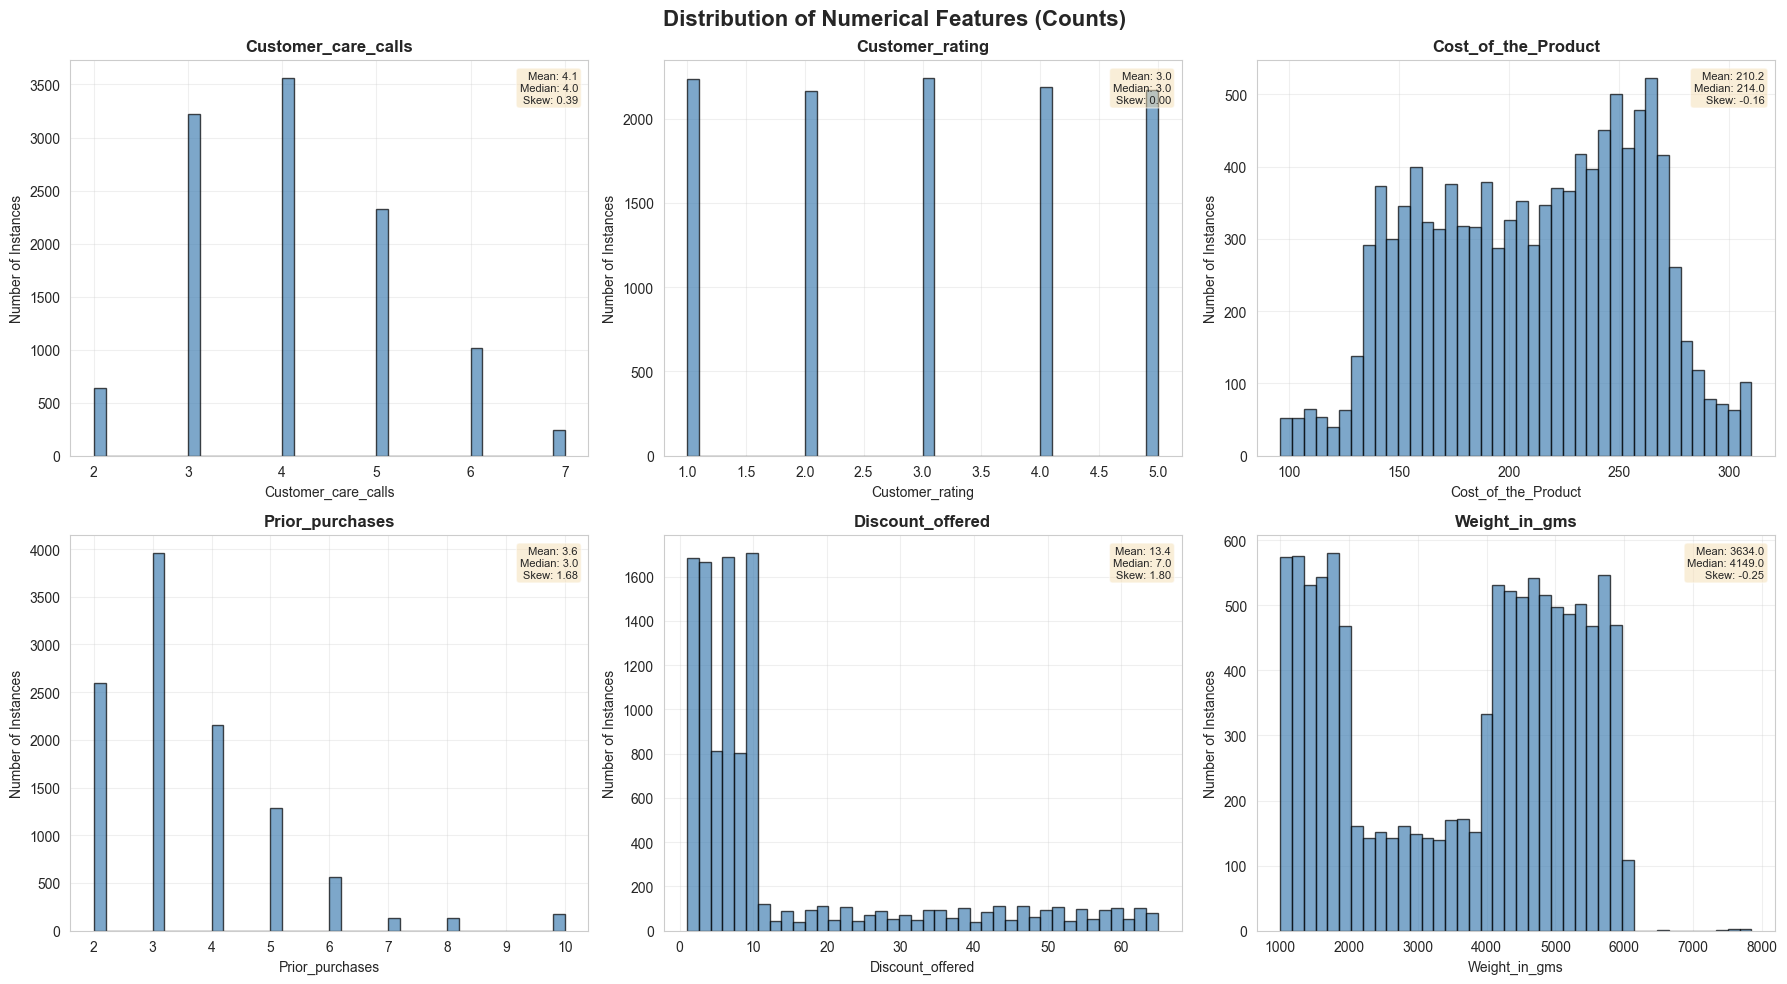

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features (Counts)', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_features):
    row = idx // 3
    col_idx = idx % 3

    axes[row, col_idx].hist(
        clustering_features[col],
        bins=40,
        alpha=0.7,
        color='steelblue',
        edgecolor='black'
    )

    axes[row, col_idx].set_title(col, fontsize=12, fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Number of Instances')
    axes[row, col_idx].grid(alpha=0.3)

    stats_text = (
        f"Mean: {clustering_features[col].mean():.1f}\n"
        f"Median: {clustering_features[col].median():.1f}\n"
        f"Skew: {clustering_features[col].skew():.2f}"
    )

    axes[row, col_idx].text(
        0.98, 0.97, stats_text,
        transform=axes[row, col_idx].transAxes,
        fontsize=8,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    )

plt.tight_layout()
plt.show()

In [13]:
clustering_features[numerical_features].skew()

Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Discount_offered       1.798929
Weight_in_gms         -0.249747
dtype: float64

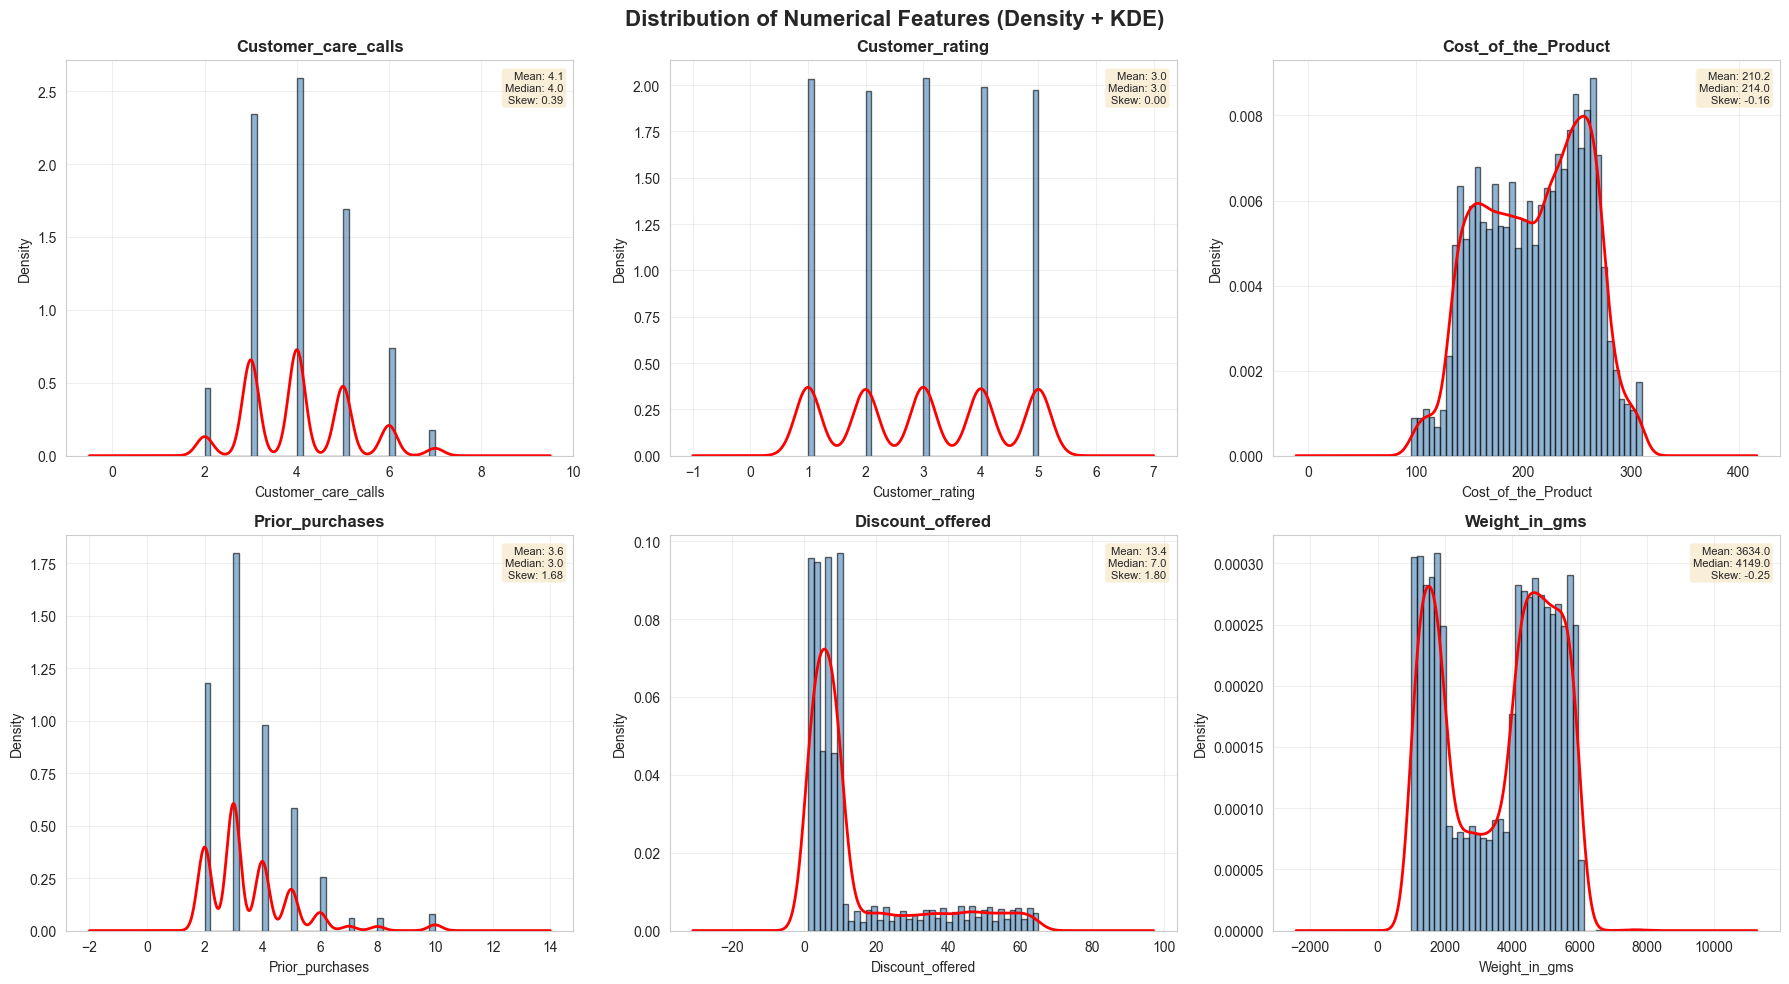

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features (Density + KDE)', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_features):
    row = idx // 3
    col_idx = idx % 3

    axes[row, col_idx].hist(
        clustering_features[col],
        bins=40,
        alpha=0.6,
        color='steelblue',
        edgecolor='black',
        density=True
    )

    clustering_features[col].plot(
        kind='kde',
        ax=axes[row, col_idx],
        color='red',
        linewidth=2
    )

    axes[row, col_idx].set_title(col, fontsize=12, fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Density')
    axes[row, col_idx].grid(alpha=0.3)

    stats_text = (
        f"Mean: {clustering_features[col].mean():.1f}\n"
        f"Median: {clustering_features[col].median():.1f}\n"
        f"Skew: {clustering_features[col].skew():.2f}"
    )

    axes[row, col_idx].text(
        0.98, 0.97, stats_text,
        transform=axes[row, col_idx].transAxes,
        fontsize=8,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    )

plt.tight_layout()
plt.show()

In [15]:
outlier_summary = []

for col in numerical_features:
    Q1 = clustering_features[col].quantile(0.25)
    Q3 = clustering_features[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = clustering_features[(clustering_features[col] < lower_bound) | 
                                   (clustering_features[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(clustering_features)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': round(lower_bound, 2),
        'Upper_Bound': round(upper_bound, 2),
        'Outliers_Count': len(outliers),
        'Outliers_Percentage': round(outlier_pct, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

            Feature     Q1     Q3    IQR  Lower_Bound  Upper_Bound  Outliers_Count  Outliers_Percentage
Customer_care_calls    3.0    5.0    2.0         0.00         8.00               0                 0.00
    Customer_rating    2.0    4.0    2.0        -1.00         7.00               0                 0.00
Cost_of_the_Product  169.0  251.0   82.0        46.00       374.00               0                 0.00
    Prior_purchases    3.0    4.0    1.0         1.50         5.50            1003                 9.12
   Discount_offered    4.0   10.0    6.0        -5.00        19.00            2209                20.08
      Weight_in_gms 1839.5 5050.0 3210.5     -2976.25      9865.75               0                 0.00


In [16]:
significant_outliers = outlier_df[outlier_df['Outliers_Percentage'] > 5]

print(significant_outliers)

            Feature   Q1    Q3  IQR  Lower_Bound  Upper_Bound  Outliers_Count  \
3   Prior_purchases  3.0   4.0  1.0          1.5          5.5            1003   
4  Discount_offered  4.0  10.0  6.0         -5.0         19.0            2209   

   Outliers_Percentage  
3                 9.12  
4                20.08  


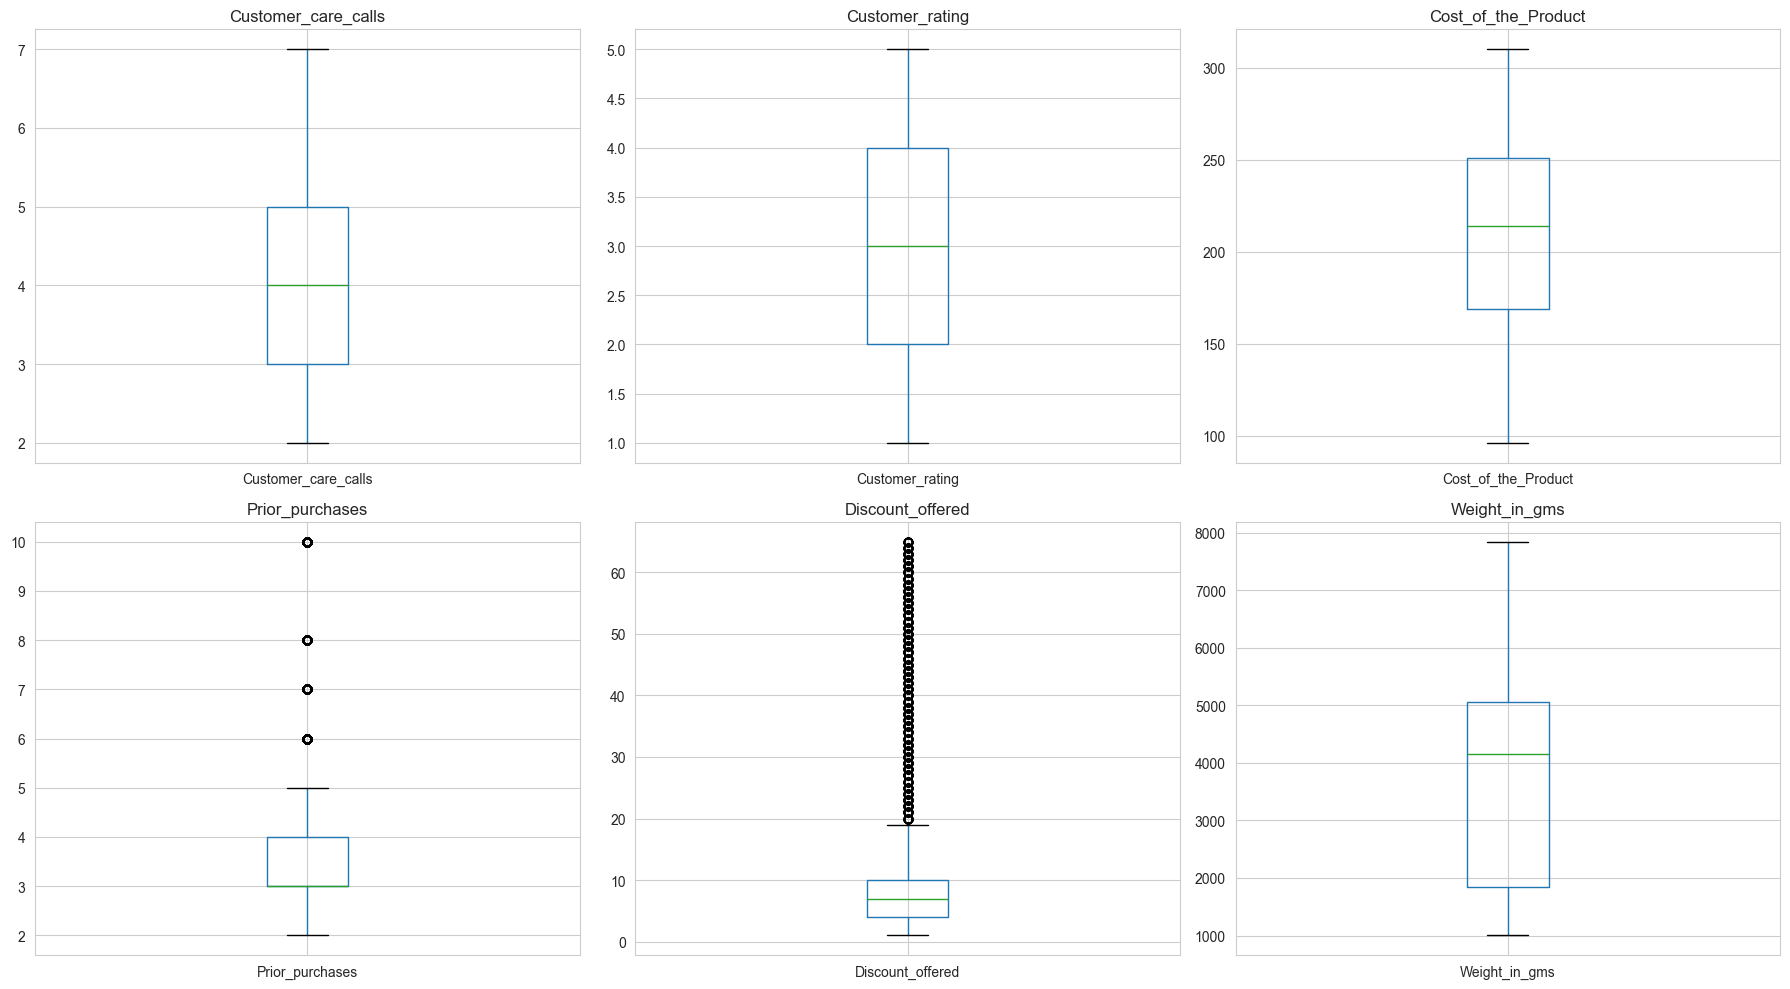

In [17]:
fig, axes = plt.subplots(2, 3,  figsize=(18, 10))
axes = axes.flatten()

for ax, col in zip(axes, numerical_features):
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

<p>Prior purchases exhibits slight right-skewness, with a small number of customers showing higher repeat purchase behavior. These values appear to represent genuine loyal customers rather than noise.
Discount offered exhibits noticeable right-skewness with several high-value observations. These values likely reflect promotional strategies rather than data errors.</p>

<p>Overall, the boxplot analysis indicates that the dataset contains some outliers. Therefore, clustering will be tested with and without outlier handling.</p>

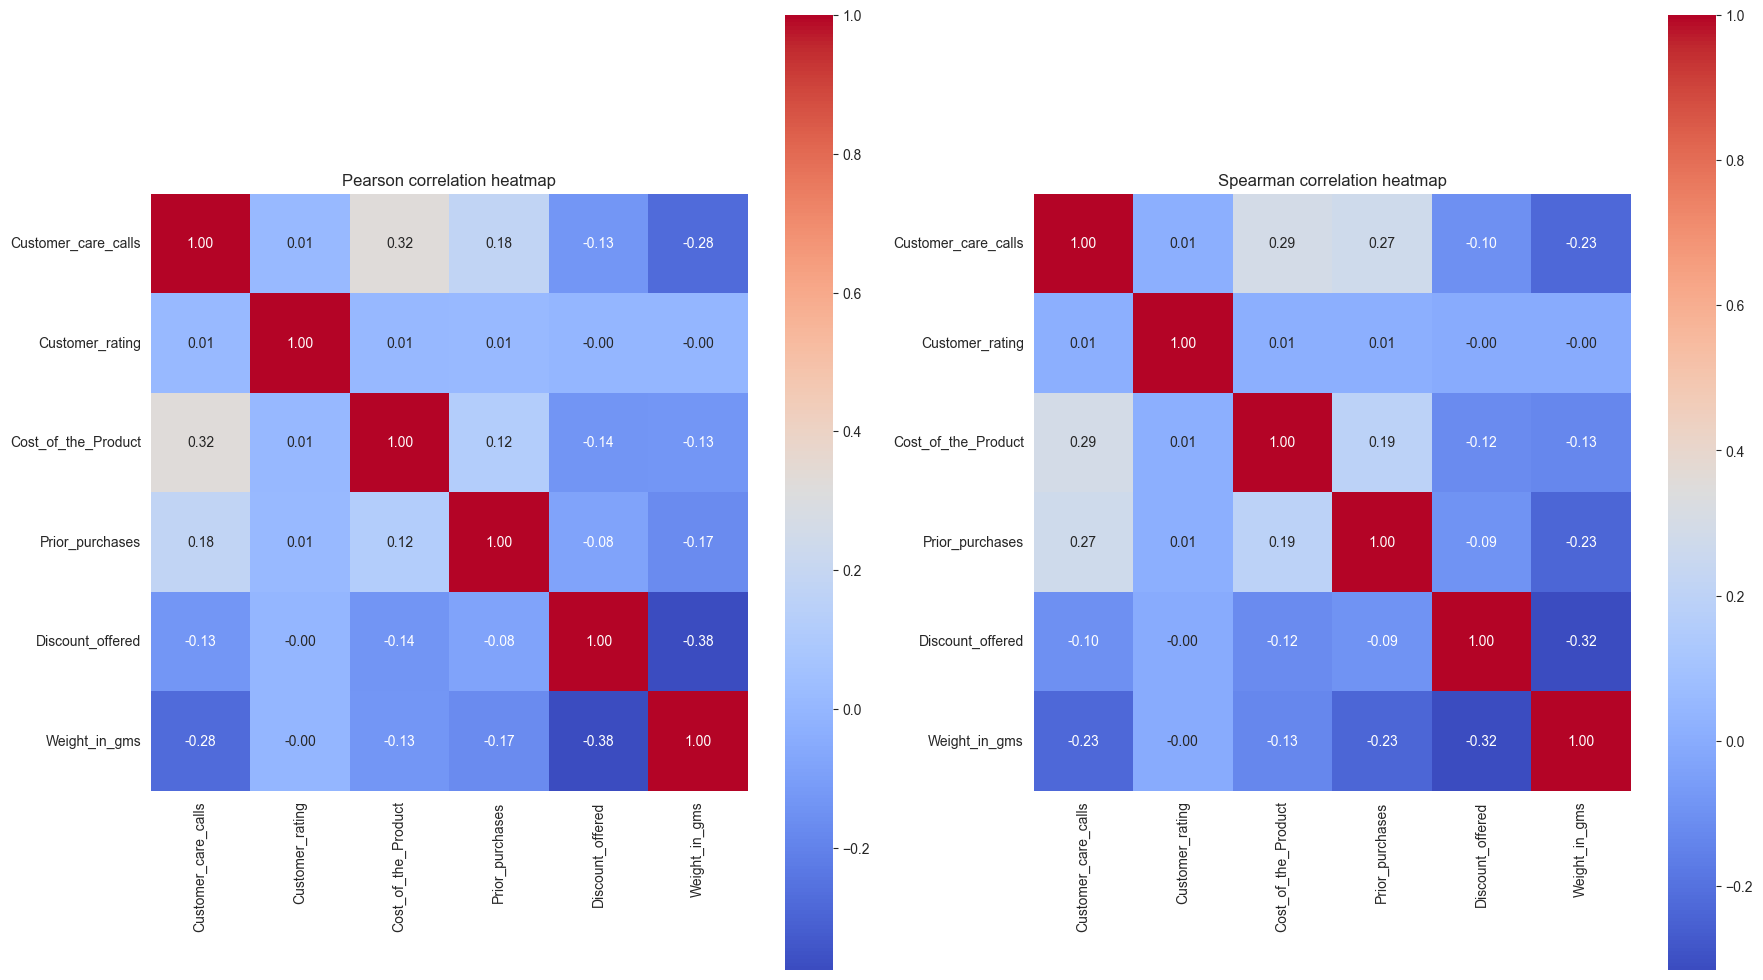

In [18]:
pearson = df[numerical_features].corr(method='pearson')
spearman = df[numerical_features].corr(method='spearman')


fig, axes = plt.subplots(1, 2,  figsize=(18, 10))


sns.heatmap(pearson, annot=True, fmt='.2f', cmap='coolwarm', square=True,ax=axes[0])
axes[0].set_title('Pearson correlation heatmap')

sns.heatmap(spearman, annot=True, fmt='.2f', cmap='coolwarm', square=True,ax=axes[1])
axes[1].set_title('Spearman correlation heatmap')

plt.tight_layout()
plt.show()

<p>Both correlation heatmaps display low levels of correlations between the numerical features</p>

<p>Possible correlations:</p>

<p>Heavier packages tend to receive slightly lower discounts or high discounts are more common in lighter shipments</p>
More expensive products may trigger more customer service calls</p>


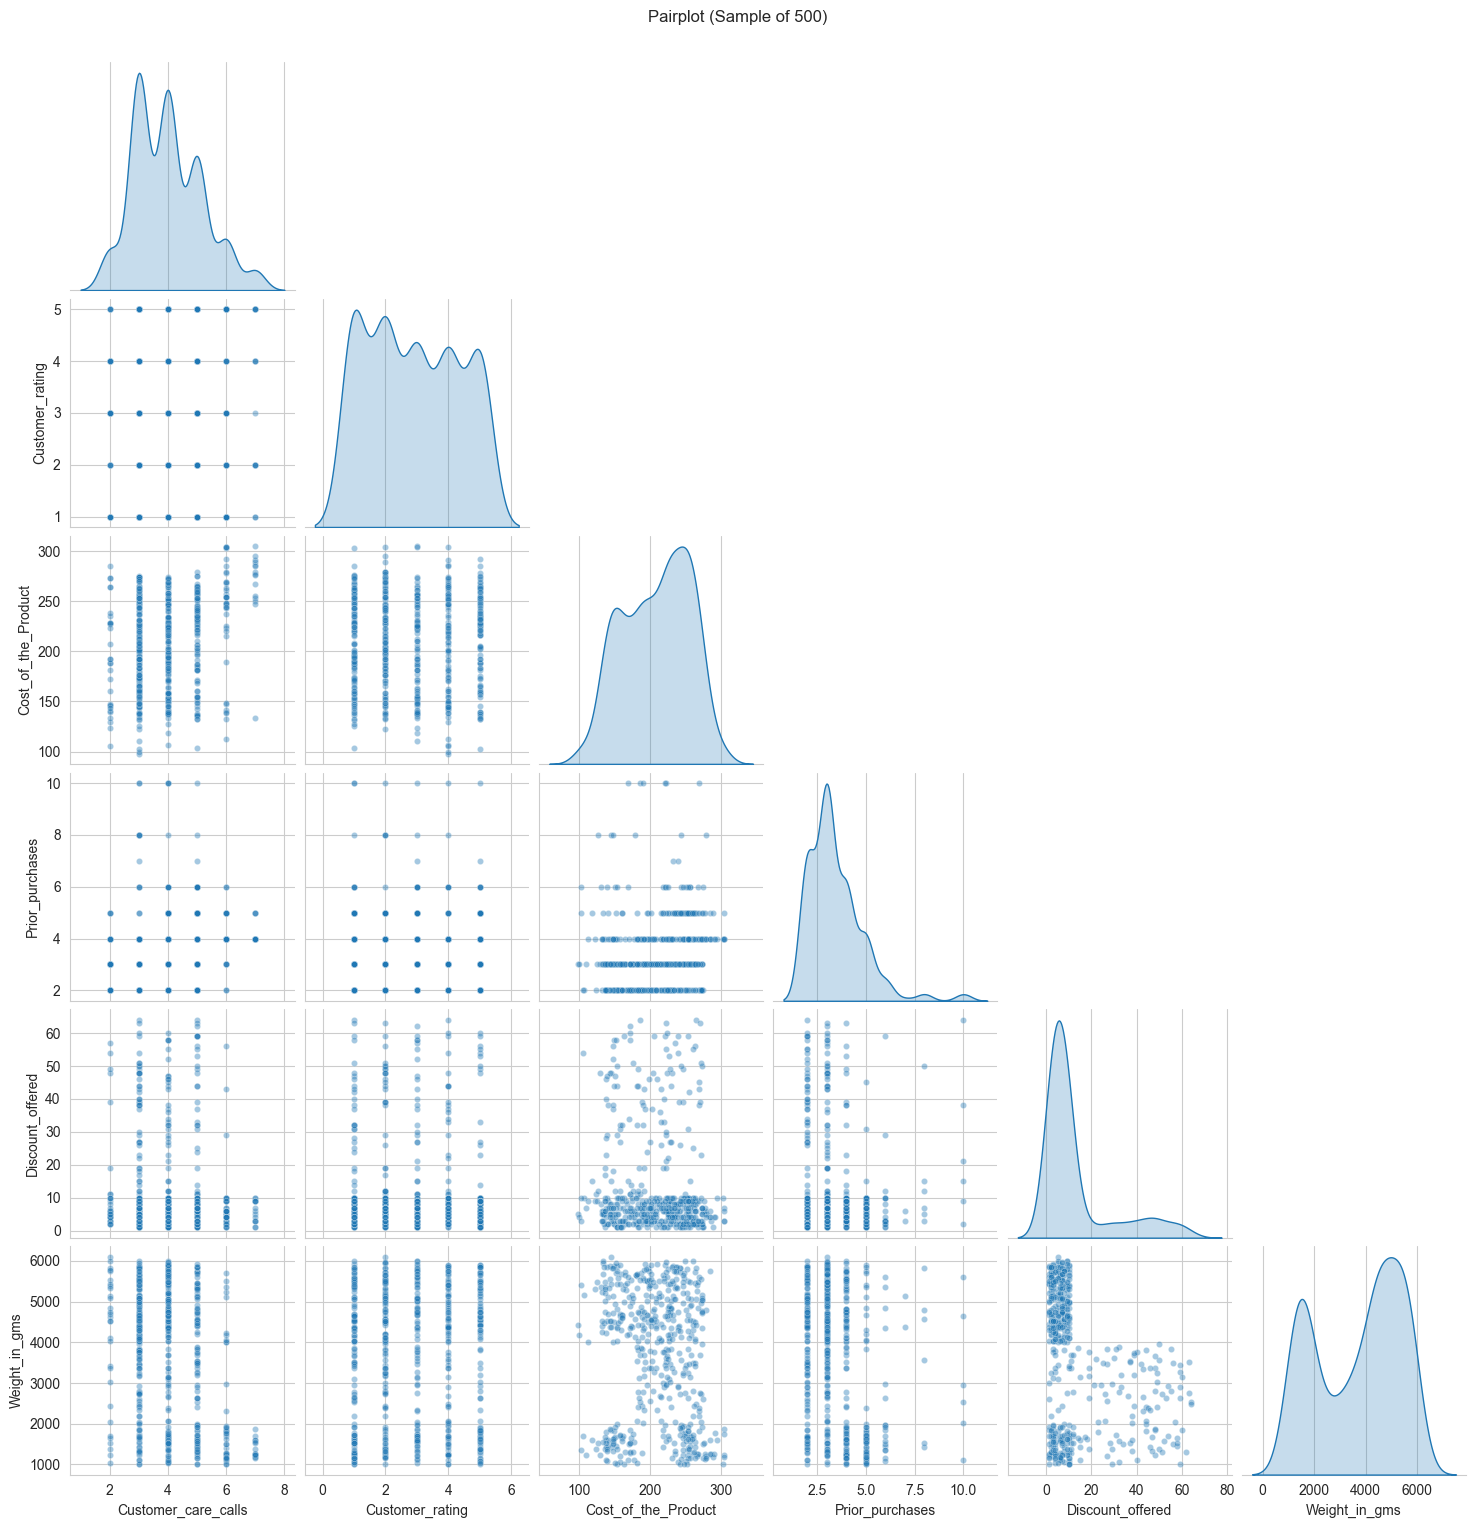

In [19]:
sampled = clustering_features.sample(500, random_state=42)

sns.pairplot(
    sampled[numerical_features],
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.4, 's': 20}
)

plt.suptitle('Pairplot (Sample of 500)', y=1.02)
plt.show()

<p>Pairplot was used to visually inspect potential relationships between numerical features and to detect possible natural separations or strong correlations before applying clustering.</p>

<p>The pairplot reveals a bimodal distribution in package weight and a highly skewed distribution in discount offered, suggesting natural groupings within the dataset. This supports the decision to discretize weight and binarize discount prior to clustering.</p>

<p>The numerical feature analysis revealed significant skewness in discount and prior purchases, as well as a clear bimodal distribution in shipment weight. These observations suggest the presence of inherent structural groupings within the dataset, supporting the applicability of clustering techniques.</p>

<h2>1.4 Categorical Features Distribution Analysis</h2>

In [20]:
cat_summary = []

for col in categorical_features:
    value_counts = clustering_features[col].value_counts()
    print(value_counts)
    print(f"\nUnique values: {clustering_features[col].nunique()}")
    print(f"Most common: {clustering_features[col].mode()[0]} ({value_counts.iloc[0]} occurrences)")
    
    max_pct = (value_counts.iloc[0] / len(clustering_features)) * 100
    min_pct = (value_counts.iloc[-1] / len(clustering_features)) * 100
    imbalance_ratio = value_counts.iloc[0] / value_counts.iloc[-1]
    
    cat_summary.append({
        'Feature': col,
        'Unique_Values': clustering_features[col].nunique(),
        'Most_Common': clustering_features[col].mode()[0],
        'Imbalance_Ratio': round(imbalance_ratio, 2)
    })

cat_df = pd.DataFrame(cat_summary)
print(cat_df.to_string(index=False))

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Unique values: 5
Most common: F (3666 occurrences)
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Unique values: 3
Most common: Ship (7462 occurrences)
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Unique values: 3
Most common: low (5297 occurrences)
Gender
F    5545
M    5454
Name: count, dtype: int64

Unique values: 2
Most common: F (5545 occurrences)
           Feature  Unique_Values Most_Common  Imbalance_Ratio
   Warehouse_block              5           F             2.00
  Mode_of_Shipment              3        Ship             4.24
Product_importance              3         low             5.59
            Gender              2           F             1.02


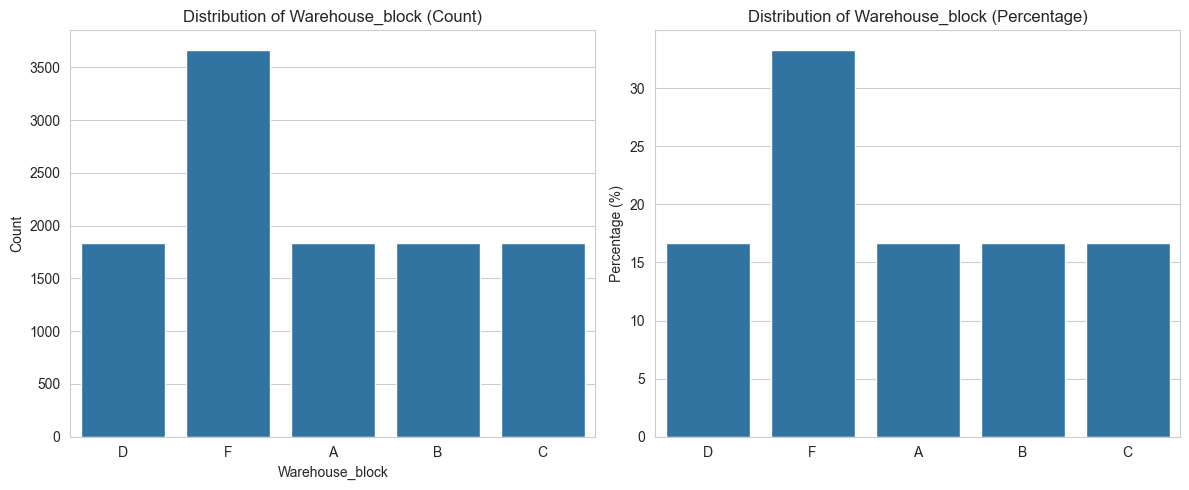

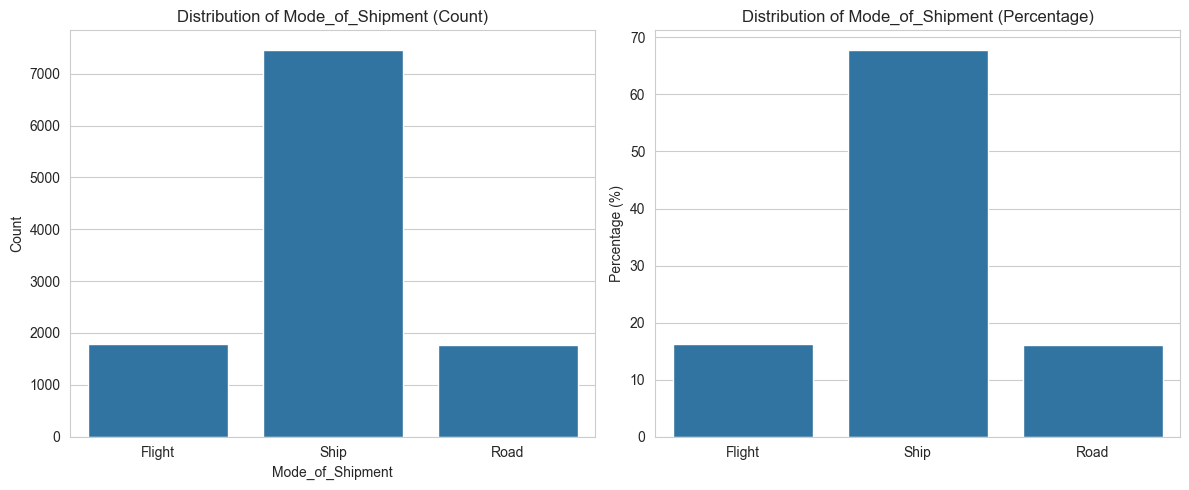

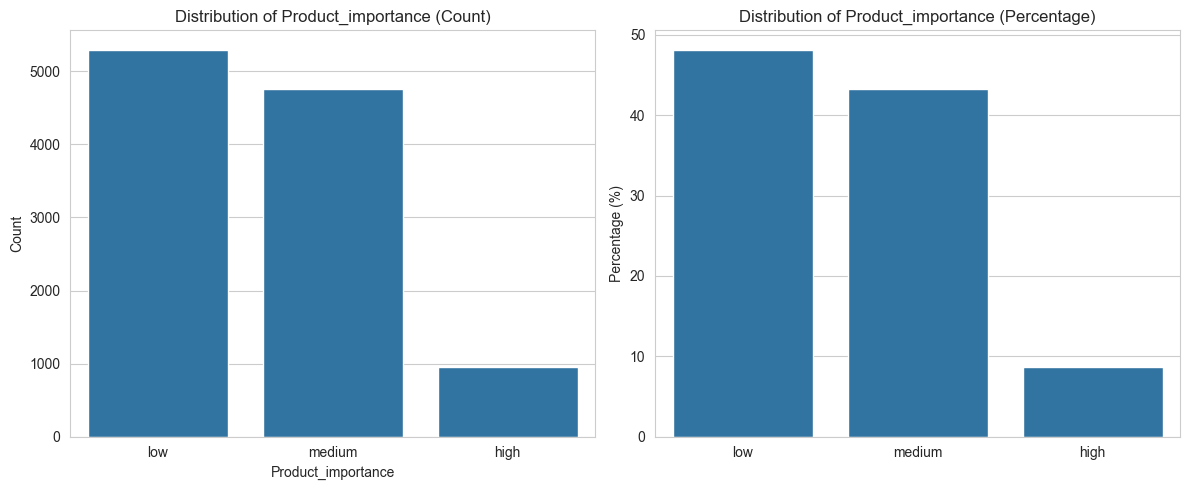

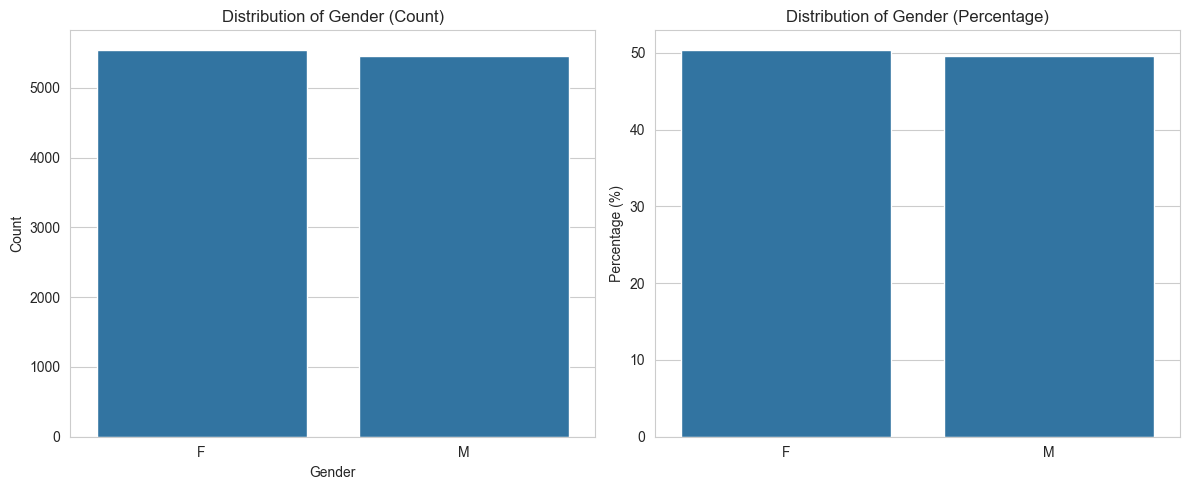

In [21]:
for col in categorical_features:
    
    category_order = df[col].unique()
    
    percentages = (
        df[col]
        .value_counts(normalize=True)
        .reindex(category_order) * 100
    )
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.countplot(
        x=col,
        data=df,
        order=category_order,
        ax=axes[0]
    )
    
    axes[0].set_title(f"Distribution of {col} (Count)")
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x')
    

    sns.barplot(
        x=category_order,
        y=percentages.values,
        ax=axes[1]
    )
    
    axes[1].set_title(f"Distribution of {col} (Percentage)")
    axes[1].set_ylabel("Percentage (%)")
    axes[1].tick_params(axis='x')
    
    plt.tight_layout()
    plt.show()

<p>
1. Warehouse_block (5 categories):
    Block F is dominant (~33%)
    Moderate imbalance
</p>
<p>
2. Mode_of_Shipment (3 categories):
   Ship dominates (~68%)
   Highly imbalanced
</p>
<p> 
3. Product_importance (3 categories):
   Low and Medium are common (~48% and ~43%)
   High importance is rare (~9%)
</p> 
<p>
4. Gender (2 categories):
   Nearly balanced (~50-50)
</p>

In [22]:
pd.crosstab(df["Mode_of_Shipment"], df["Product_importance"], normalize="index")

Product_importance      high       low    medium
Mode_of_Shipment                                
Flight              0.091728  0.471581  0.436691
Road                0.089773  0.486932  0.423295
Ship                0.084026  0.482712  0.433262

<p>Shipment mode is not strongly dependent on product importance. Which indicates that no strong predefined grouping exists based on these features alone.</p>

In [23]:
pd.crosstab(df["Warehouse_block"], df["Product_importance"], normalize="index")

Product_importance      high       low    medium
Warehouse_block                                 
A                   0.090016  0.495908  0.414075
B                   0.079651  0.466448  0.453901
C                   0.091653  0.476814  0.431533
D                   0.090513  0.481461  0.428026
F                   0.082651  0.484452  0.432897

<p>Warehouse block is not strongly dependent on product importance. Which indicates that no strong predefined grouping exists based on these features alone.</p>

In [24]:
pd.crosstab(df["Warehouse_block"],df["Mode_of_Shipment"], normalize="index")

Mode_of_Shipment    Flight      Road      Ship
Warehouse_block                               
A                 0.162029  0.160393  0.677578
B                 0.161484  0.160393  0.678123
C                 0.160938  0.160393  0.678669
D                 0.161941  0.159215  0.678844
F                 0.161484  0.159847  0.678669

<p>Warehouse block is not strongly dependent on mode of shipment. Which indicates that no strong predefined grouping exists based on these features alone.</p>

In [25]:
pd.crosstab(df["Gender"],df["Mode_of_Shipment"],normalize="index")

Mode_of_Shipment    Flight      Road      Ship
Gender                                        
F                 0.155455  0.163751  0.680794
M                 0.167767  0.156216  0.676018

<p>Gender is not strongly dependent on mode of shipment. Which indicates that no strong predefined grouping exists based on these features alone.</p>

In [26]:
pd.crosstab(df["Gender"], df["Product_importance"],normalize="index")

Product_importance      high       low    medium
Gender                                          
F                   0.084761  0.478269  0.436970
M                   0.087642  0.484965  0.427393

<p>Gender is not strongly dependent on prodct importance. Which indicates that no strong predefined grouping exists based on these features alone.</p>

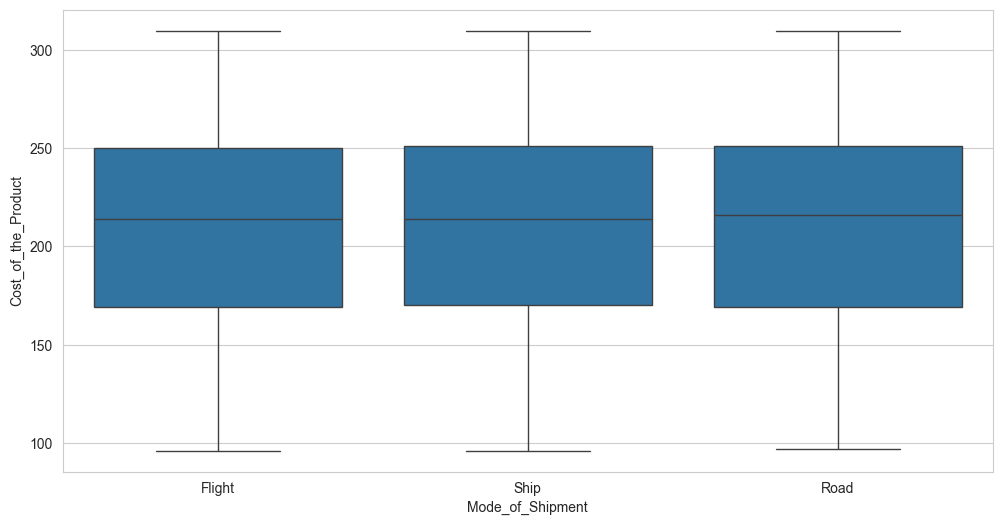

In [27]:
sns.boxplot(x="Mode_of_Shipment", y="Cost_of_the_Product", data=df)
plt.show()

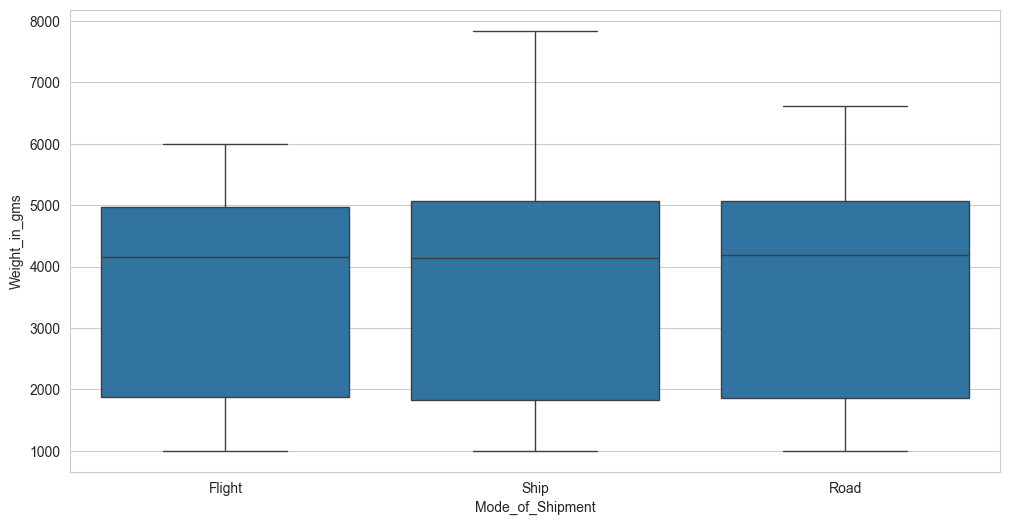

In [28]:
sns.boxplot(x="Mode_of_Shipment", y="Weight_in_gms", data=df)
plt.show()

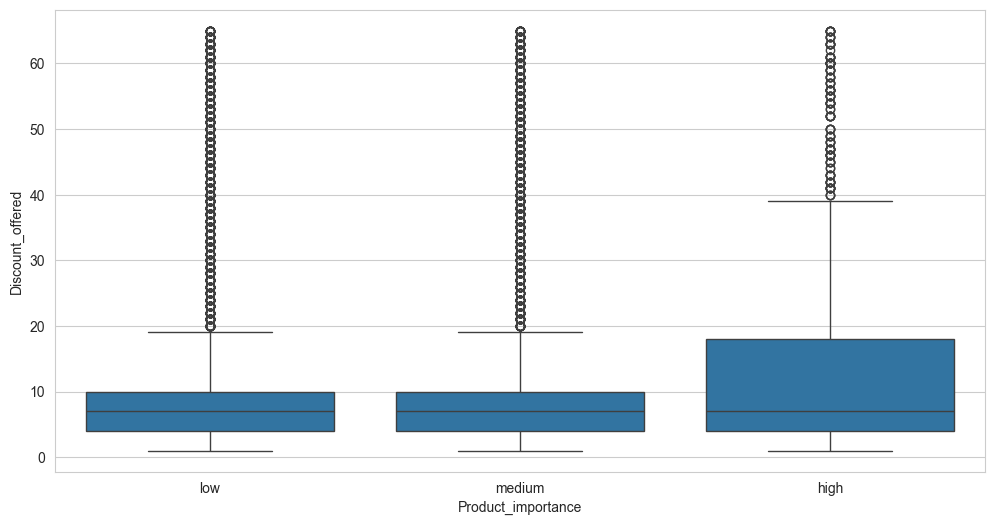

In [29]:
sns.boxplot(x="Product_importance", y="Discount_offered", data=df)
plt.show()

<p>The analysis of numerical–categorical interactions indicates that shipment mode does not significantly influence product cost or weight distribution. However, a moderate pattern is observed between product importance and discount offered, where high-importance products tend to receive slightly higher discounts. Overall, most categorical variables appear relatively independent from numerical features.</p>

<h1>2 Preprocessing</h1>

In [30]:
df_transformed = df.copy()

df_transformed["Weight_class"] = pd.cut(
    df_transformed["Weight_in_gms"],
    bins=[0, 2000, 4500, df_transformed["Weight_in_gms"].max()],
    labels=["Light", "Medium", "Heavy"]
)

df_transformed["Discount_class"] = pd.cut(
    df_transformed["Discount_offered"],
    bins=[0, 7, 20, df_transformed["Discount_offered"].max()],
    labels=["Low", "Medium", "High"]
)

In [31]:
df_transformed = df_transformed.drop(columns=[
    "Weight_in_gms",
    "Discount_offered",
    "Reached.on.Time_Y.N",
    "ID"
])

In [32]:
numerical_features = [
    "Cost_of_the_Product",
    "Prior_purchases",
    "Customer_rating",
    "Customer_care_calls"
]

categorical_features = [
    "Weight_class",
    "Mode_of_Shipment",
    "Product_importance",
    "Warehouse_block",
    "Discount_class"
]


In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

X = preprocessor.fit_transform(df_transformed)

<p>Numerical features were standardized using StandardScaler, while categorical variables were encoded using One-Hot Encoding. Package weight was discretized into three ordinal categories based on observed distribution patterns, and discount offered was binarized to reduce skewness effects.</p>

In [34]:
cat_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)

all_feature_names = (
    numerical_features +
    list(cat_feature_names)
)

X_df = pd.DataFrame(X, columns=all_feature_names)

In [35]:
df_transformed.head()

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

  Weight_class Discount_class  
0        Light           High  
1       Medium           High  
2       Medium           High  
3        Light         Medium  
4       Medium           High

In [36]:
X_df.head()

Cost_of_the_Product  Prior_purchases  Customer_rating  Customer_care_calls  \
0            -0.690722        -0.372735        -0.700755            -0.047711   
1             0.120746        -1.029424         1.421578            -0.047711   
2            -0.565881         0.283954        -0.700755            -1.799887   
3            -0.711529         0.283954         0.006689            -0.923799   
4            -0.545074        -0.372735        -0.700755            -1.799887   

   Weight_class_Light  Weight_class_Medium  Mode_of_Shipment_Road  \
0                 1.0                  0.0                    0.0   
1                 0.0                  1.0                    0.0   
2                 0.0                  1.0                    0.0   
3                 1.0                  0.0                    0.0   
4                 0.0                  1.0                    0.0   

   Mode_of_Shipment_Ship  Product_importance_low  Product_importance_medium  \
0                    0.0                     1.0                        0.0   
1                    0.0                     1.0                        0.0   
2                    0.0                     1.0                        0.0   
3                    0.0                     0.0                        1.0   
4                    0.0                     0.0                        1.0   

   Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
0                0.0                0.0                1.0                0.0   
1                0.0                0.0                0.0                1.0   
2                0.0                0.0                0.0                0.0   
3                1.0                0.0                0.0                0.0   
4                0.0                1.0                0.0                0.0   

   Discount_class_Low  Discount_class_Medium  
0                 0.0                    0.0  
1                 0.0                    0.0  
2                 0.0                    0.0  
3                 0.0                    1.0  
4                 0.0                    0.0

<h1></h1>

In [37]:
df_transformed["Discount_class"].value_counts()

Discount_class
Low       5846
Medium    3002
High      2151
Name: count, dtype: int64

In [38]:
df_transformed["Weight_class"].value_counts()

Weight_class
Heavy     4433
Medium    3321
Light     3245
Name: count, dtype: int64

In [39]:
X_df.shape

(10999, 16)

<h1>3 Clustering</h1>

<h2>3.1 K-Means</h2>

In [40]:
X_df = X_df.drop(columns=["Cluster"], errors="ignore")
print("Shape:", X_df.shape)
print("Columns:", X_df.columns.tolist())
print("Dtypes:\n", X_df.dtypes)

Shape: (10999, 16)
Columns: ['Cost_of_the_Product', 'Prior_purchases', 'Customer_rating', 'Customer_care_calls', 'Weight_class_Light', 'Weight_class_Medium', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Product_importance_low', 'Product_importance_medium', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F', 'Discount_class_Low', 'Discount_class_Medium']
Dtypes:
 Cost_of_the_Product          float64
Prior_purchases              float64
Customer_rating              float64
Customer_care_calls          float64
Weight_class_Light           float64
Weight_class_Medium          float64
Mode_of_Shipment_Road        float64
Mode_of_Shipment_Ship        float64
Product_importance_low       float64
Product_importance_medium    float64
Warehouse_block_B            float64
Warehouse_block_C            float64
Warehouse_block_D            float64
Warehouse_block_F            float64
Discount_class_Low           float64
Discount_class_Medium        float64
dtype

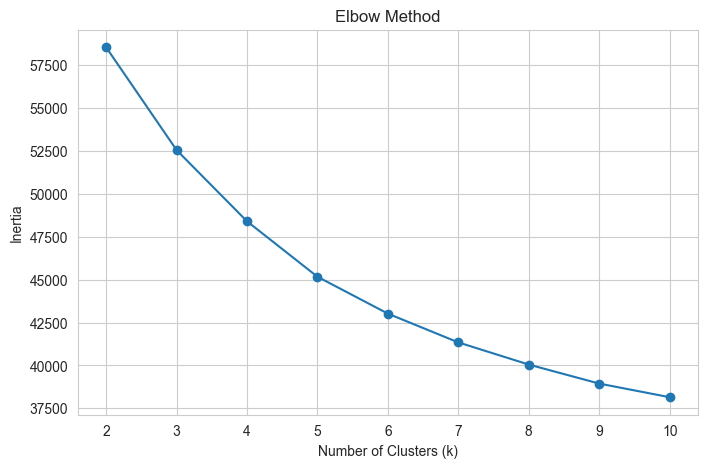

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [42]:
from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_df)
    score = silhouette_score(X_df, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")

k=2, Silhouette Score=0.1786
k=3, Silhouette Score=0.1297
k=4, Silhouette Score=0.1437
k=5, Silhouette Score=0.1286
k=6, Silhouette Score=0.1173
k=7, Silhouette Score=0.1104
k=8, Silhouette Score=0.1084
k=9, Silhouette Score=0.1070
k=10, Silhouette Score=0.1050


<p>The highest silhouette score is achieved for k=2, suggesting that the dataset naturally forms two broad segments. Increasing the number of clusters results in decreased cohesion and separation, indicating that additional clusters may represent over-segmentation rather than meaningful structure. In the project, scenarios for n=2 and n=4 will be analyzed</p>

<h3>3.1.1 Two Clusters</h3>

In [43]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_df)

X_df["Cluster"] = labels

In [44]:
cluster_labels = X_df['Cluster']
n_clusters = len(cluster_labels.unique())


numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                      'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


cluster_sizes = cluster_labels.value_counts().sort_index()
for cluster_id, size in cluster_sizes.items():
    percentage = (size / len(X_df)) * 100
    print(f"Cluster {cluster_id}: {size:,} samples ({percentage:.2f}%)")


Cluster 0: 7,570 samples (68.82%)
Cluster 1: 3,429 samples (31.18%)


<h4>3.1.1.1 Numerical feature profiling</h4>

In [45]:
df_profile = df.copy()
df_profile["Cluster"] = labels

In [46]:
numerical_cols = [
    "Cost_of_the_Product",
    "Prior_purchases",
    "Customer_rating",
    "Customer_care_calls",
    "Weight_in_gms",
    "Discount_offered"
]

cluster_numeric_profile = df_profile.groupby("Cluster")[numerical_cols].agg(
    ["mean", "std", "median", "min", "max"]
)

cluster_numeric_profile

Cost_of_the_Product                            Prior_purchases  \
                       mean        std median min  max            mean   
Cluster                                                                  
0                194.918494  43.731991  192.0  96  310        2.899207   
1                243.925926  39.181269  251.0  98  310        5.043161   

                                  ... Weight_in_gms                       \
              std median min max  ...          mean          std  median   
Cluster                           ...                                      
0        0.853064    3.0   2   8  ...   4007.241876  1485.246489  4410.5   
1        1.633732    5.0   2  10  ...   2810.069700  1650.149396  1875.0   

                    Discount_offered                            
          min   max             mean        std median min max  
Cluster                                                         
0        1001  7846        15.117173  17.382971    8.0   1  65  
1        1001  5995         9.523185  12.402801    6.0   1  65  

[2 rows x 30 columns]

In [47]:
mean_comparison = df_profile.groupby("Cluster")[numerical_cols].mean()
mean_comparison.loc["Difference (1-0)"] = mean_comparison.loc[1] - mean_comparison.loc[0]
mean_comparison

Cost_of_the_Product  Prior_purchases  Customer_rating  \
Cluster                                                                   
0                          194.918494         2.899207         2.985073   
1                          243.925926         5.043161         3.002625   
Difference (1-0)            49.007432         2.143954         0.017552   

                  Customer_care_calls  Weight_in_gms  Discount_offered  
Cluster                                                                 
0                            3.607662    4007.241876         15.117173  
1                            5.040828    2810.069700          9.523185  
Difference (1-0)             1.433166   -1197.172176         -5.593988

In [48]:
smd={}

for col in numerical_cols:
    mean0 = df_profile[df_profile["Cluster"] == 0][col].mean()
    mean1 = df_profile[df_profile["Cluster"] == 1][col].mean()
    std_pooled = np.sqrt(
        (
            df_profile[df_profile["Cluster"] == 0][col].std()**2 +
            df_profile[df_profile["Cluster"] == 1][col].std()**2
        ) / 2
    )
    smd[col] = (mean1 - mean0) / std_pooled

pd.Series(smd, name="Standardized Mean Difference").sort_values(ascending=False)

Prior_purchases        1.645112
Customer_care_calls    1.485984
Cost_of_the_Product    1.180361
Customer_rating        0.012401
Discount_offered      -0.370472
Weight_in_gms         -0.762596
Name: Standardized Mean Difference, dtype: float64

<p>The clustering results reveal two primary customer segments. The first cluster consists of customers with lower purchase activity and below-average product cost, typically associated with heavier shipments. The second cluster represents more active customers with higher prior purchases, higher product costs, and lighter shipments.</p>

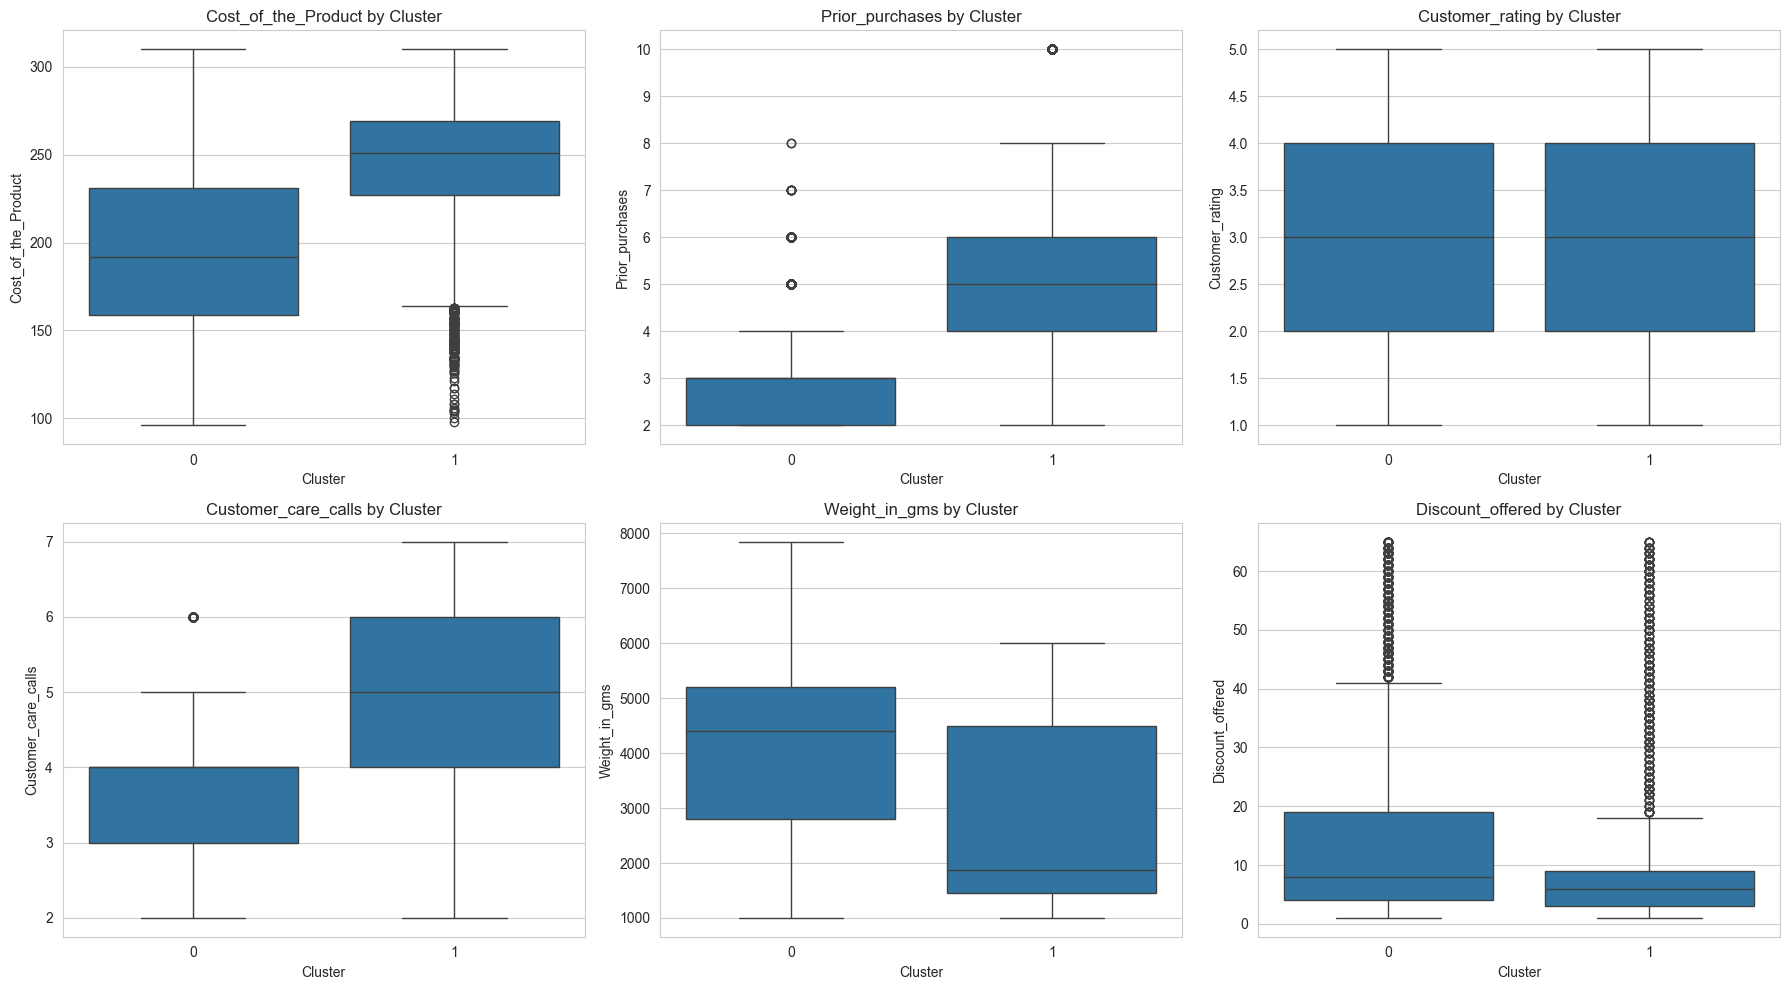

In [49]:
import math
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(
        x="Cluster",
        y=col,
        data=df_profile,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Cluster")

plt.tight_layout()
plt.show()

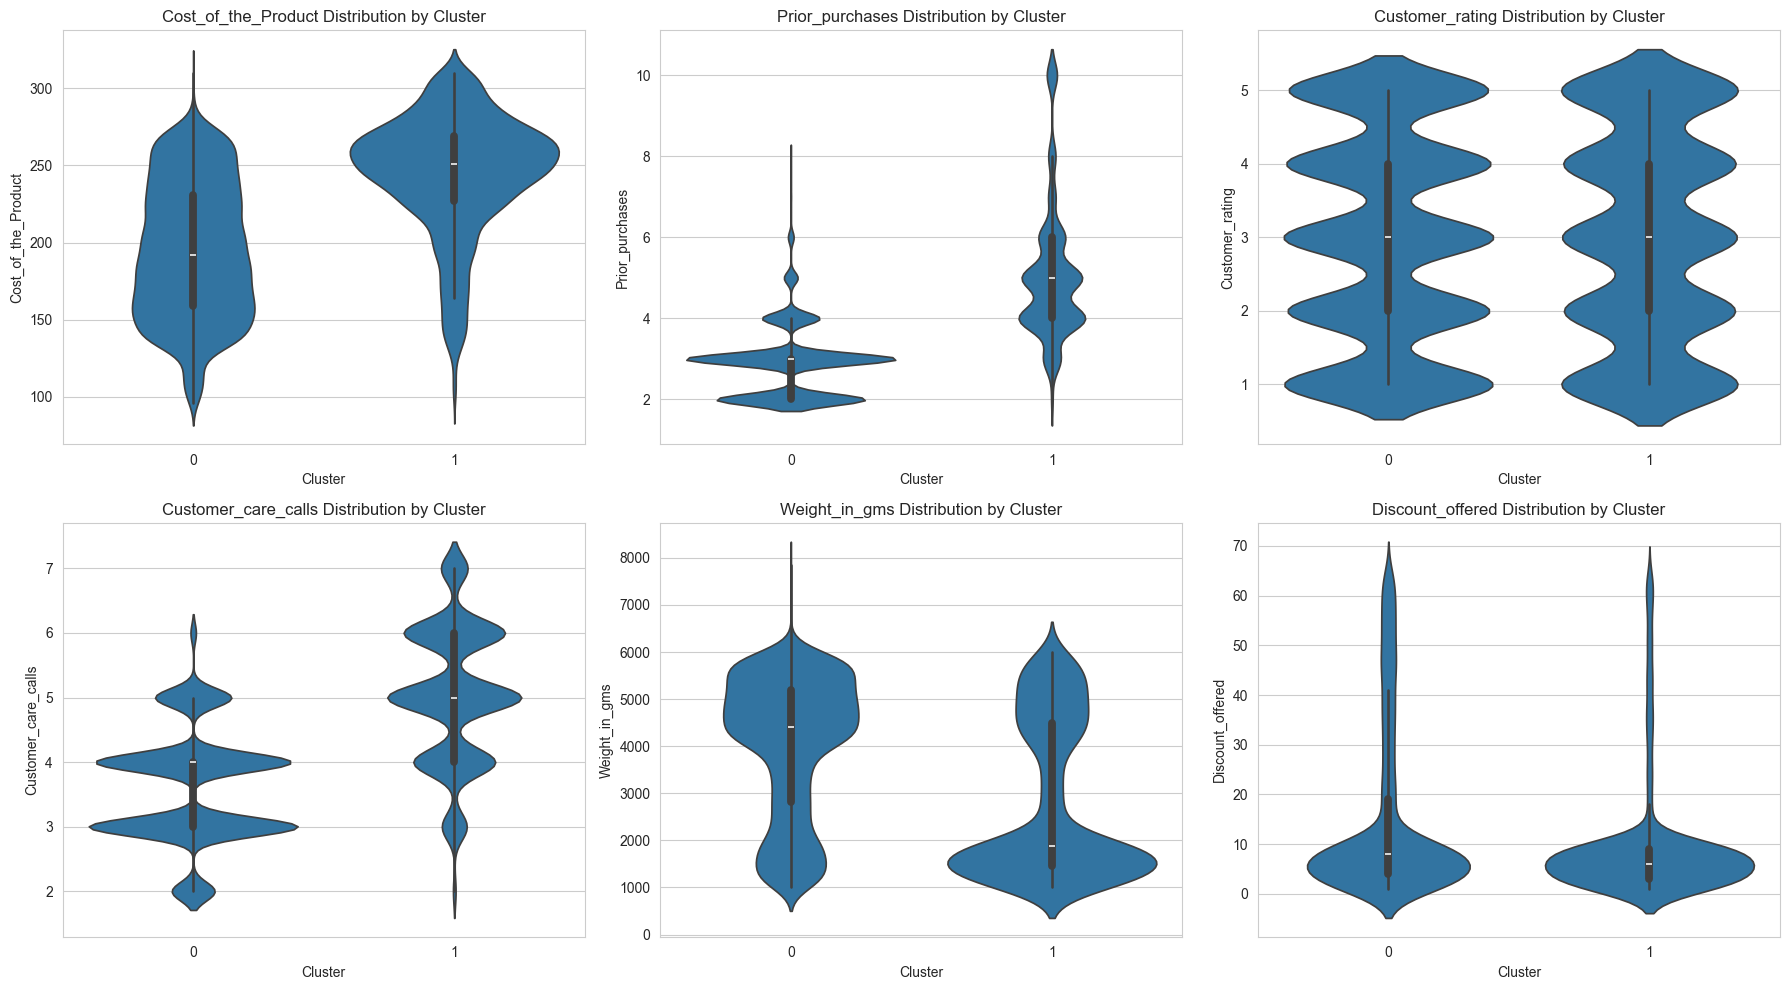

In [50]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(
        x="Cluster",
        y=col,
        data=df_profile,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} Distribution by Cluster")

plt.tight_layout()
plt.show()

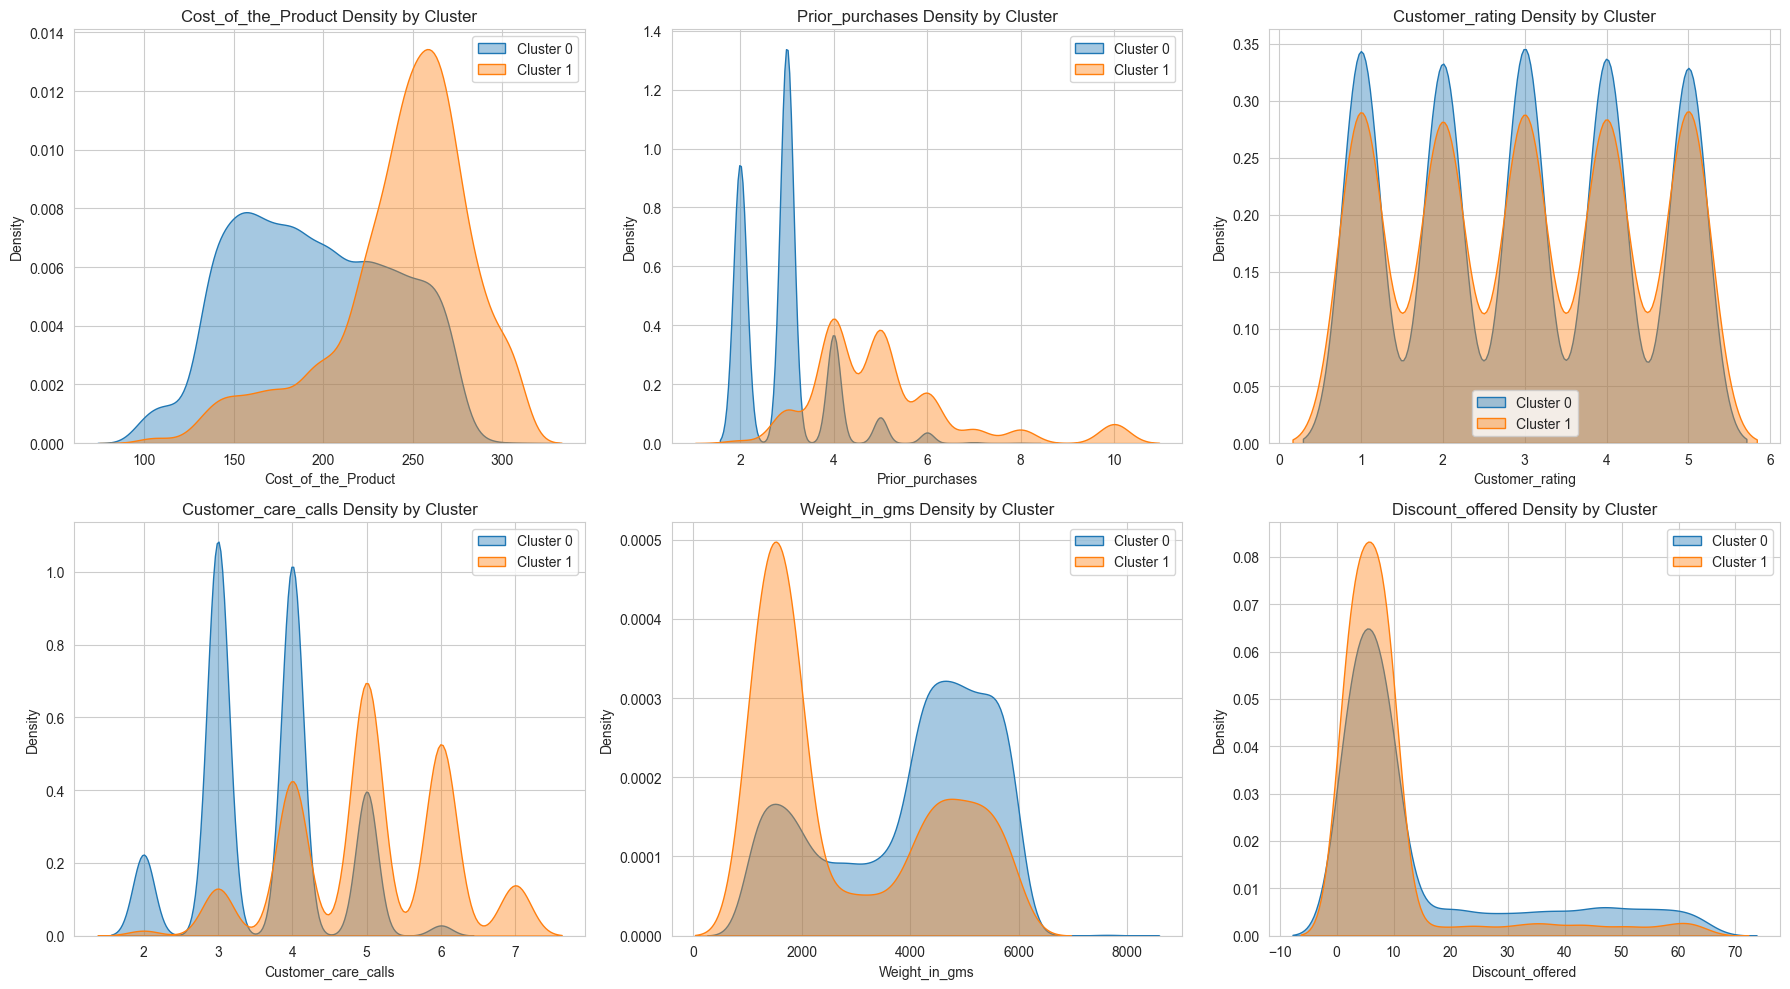

In [51]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    for cluster in sorted(df_profile["Cluster"].unique()):
        sns.kdeplot(
            data=df_profile[df_profile["Cluster"] == cluster],
            x=col,
            fill=True,
            alpha=0.4,
            ax=axes[i],
            label=f"Cluster {cluster}"
        )
    axes[i].set_title(f"{col} Density by Cluster")
    axes[i].legend()

plt.tight_layout()
plt.show()

<p>Plot analysis reveal clear structural differences between the two clusters. The strongest separation is observed for Weight_in_gms, Prior_purchases, and Cost_of_the_Product, where Cluster 1 exhibits higher median values for product cost and prior purchases, while Cluster 0 is characterized by significantly heavier products. Customer_care_calls shows moderate differentiation, with Cluster 1 having slightly higher values. In contrast, Customer_rating displays nearly identical distributions across clusters, indicating minimal contribution to segmentation. Overall, the visual distribution analysis confirms that product weight, purchase history, and product price are the primary drivers of cluster formation.</p>

<h4>3.1.1.2 Categorical feature profiling</h4>

In [52]:
categorical_cols = [
    "Mode_of_Shipment",
    "Product_importance",
    "Warehouse_block",
    "Gender",
]

for col in categorical_cols:
    print(f"\n===== {col} =====")
    display(
        pd.crosstab(
            df_profile["Cluster"],
            df_profile[col],
            normalize="index"
        )
    )


===== Mode_of_Shipment =====


Mode_of_Shipment    Flight      Road      Ship
Cluster                                       
0                 0.160634  0.159577  0.679789
1                 0.163605  0.160980  0.675416


===== Product_importance =====


Product_importance      high       low    medium
Cluster                                         
0                   0.093527  0.469749  0.436724
1                   0.069991  0.507728  0.422281


===== Warehouse_block =====


Warehouse_block         A         B         C         D         F
Cluster                                                          
0                0.166579  0.164861  0.167768  0.165918  0.334875
1                0.166812  0.170604  0.164188  0.168562  0.329834


===== Gender =====


Gender          F         M
Cluster                    
0        0.505416  0.494584
1        0.501312  0.498688

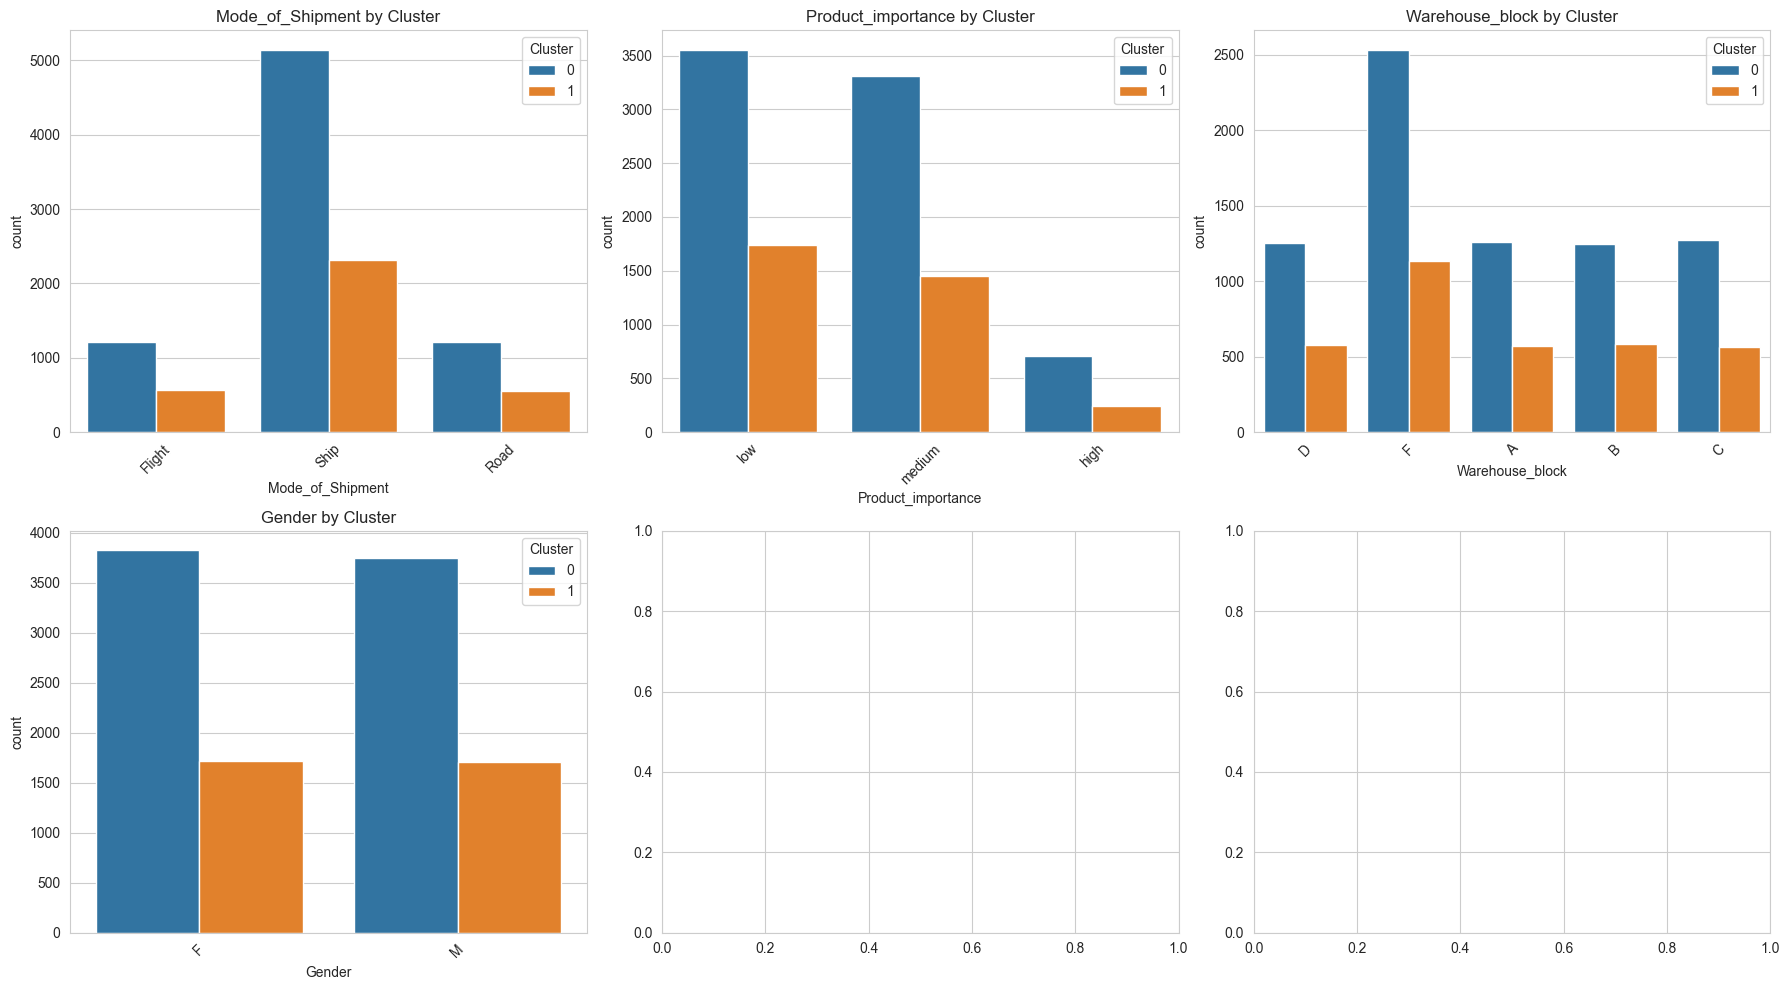

In [53]:
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df_profile,
        x=col,
        hue="Cluster",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Cluster")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

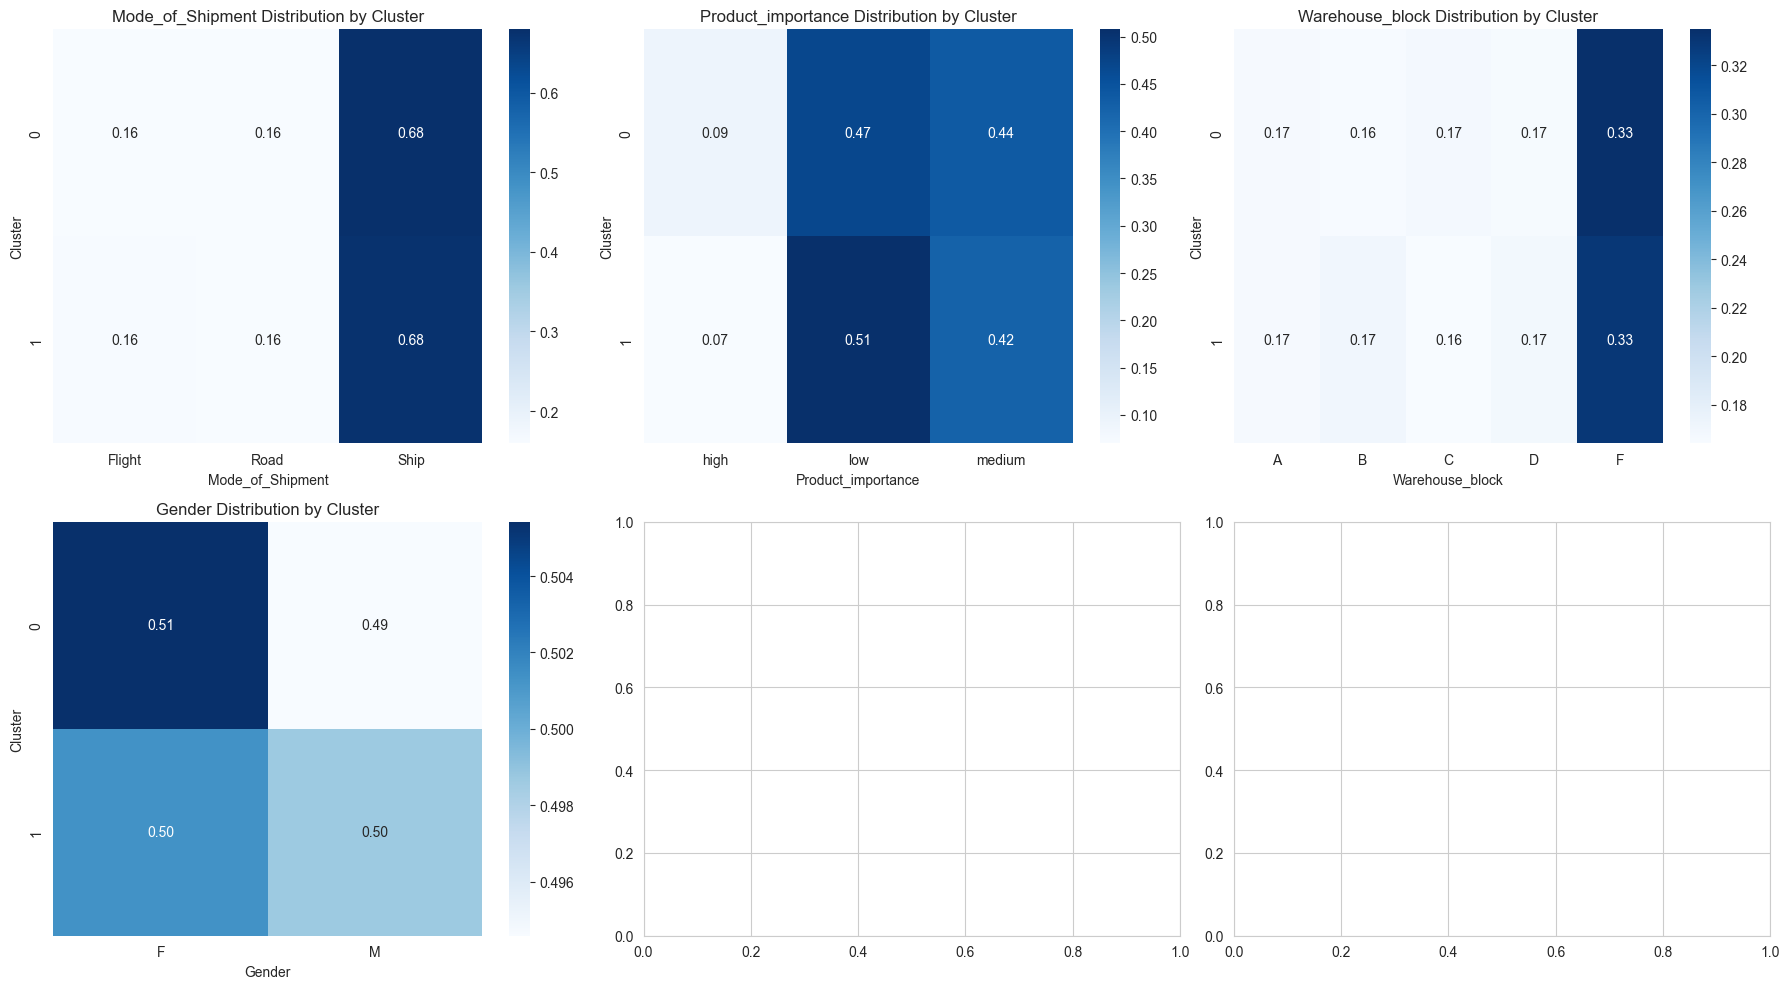

In [54]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(
        df_profile["Cluster"],
        df_profile[col],
        normalize="index"
    )
    
    sns.heatmap(
        ct,
        annot=True,
        cmap="Blues",
        fmt=".2f",
        ax=axes[i]
    )
    
    axes[i].set_title(f"{col} Distribution by Cluster")

plt.tight_layout()
plt.show()

In [55]:
from scipy.stats import chi2_contingency

chi_results = {}

for col in categorical_cols:
    contingency = pd.crosstab(df_profile["Cluster"], df_profile[col])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_results[col] = p

pd.Series(chi_results, name="p-value").sort_values()

Product_importance    0.000008
Gender                0.705320
Mode_of_Shipment      0.893852
Warehouse_block       0.920499
Name: p-value, dtype: float64

<p>Chi-square testing indicates that only Product_importance shows statistically significant differences between clusters, while Gender, Mode_of_Shipment, and Warehouse_block distributions remain similar across clusters.</p>

Categorical feature analysis indicates that most categorical variables do not significantly differentiate clusters. Mode_of_Shipment, Warehouse_block, and Gender exhibit nearly identical distributions across clusters, confirmed by non-significant Chi-square test results. Although Product_importance shows statistical significance (p < 0.001), the proportional differences between clusters are relatively small, suggesting limited practical impact. Overall, cluster separation is primarily driven by numerical features rather than categorical attributes.

<h3>3.1.2 Three Clusters</h3>

In [56]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(X_df)

df_profile["Cluster_3"] = labels_3

df_profile["Cluster_3"].value_counts()

Cluster_3
1    4579
2    3264
0    3156
Name: count, dtype: int64

<h4>3.1.2.1 Numerical feature profiling</h4>

In [57]:
cluster3_numeric_profile = df_profile.groupby("Cluster_3")[numerical_cols].agg(
    ["mean", "std", "median", "min", "max"]
)
cluster3_numeric_profile

Cost_of_the_Product                            Prior_purchases  \
                         mean        std median min  max            mean   
Cluster_3                                                                  
0                  196.230672  43.676269  193.0  96  310        2.924905   
1                  195.331950  44.155221  193.0  96  296        2.919851   
2                  244.554534  39.073221  252.0  98  310        5.097733   

                                    ... Weight_in_gms                       \
                std median min max  ...          mean          std  median   
Cluster_3                           ...                                      
0          0.888954    3.0   2   7  ...   3991.446768  1486.896403  4381.5   
1          0.863257    3.0   2   8  ...   4027.137803  1480.290004  4432.0   
2          1.636039    5.0   2  10  ...   2736.911765  1629.968995  1849.0   

                      Discount_offered                            
            min   max             mean        std median min max  
Cluster_3                                                         
0          1005  7846        15.337136  17.539914    8.0   1  65  
1          1001  7684        14.938196  17.283476    7.0   1  65  
2          1001  5995         9.278799  12.027325    6.0   1  65  

[3 rows x 30 columns]

In [58]:
mean_comparison_3 = df_profile.groupby("Cluster_3")[numerical_cols].mean()
mean_comparison_3

Cost_of_the_Product  Prior_purchases  Customer_rating  \
Cluster_3                                                          
0                   196.230672         2.924905         1.472750   
1                   195.331950         2.919851         3.992575   
2                   244.554534         5.097733         3.052390   

           Customer_care_calls  Weight_in_gms  Discount_offered  
Cluster_3                                                        
0                     3.638783    3991.446768         15.337136  
1                     3.617165    4027.137803         14.938196  
2                     5.069853    2736.911765          9.278799

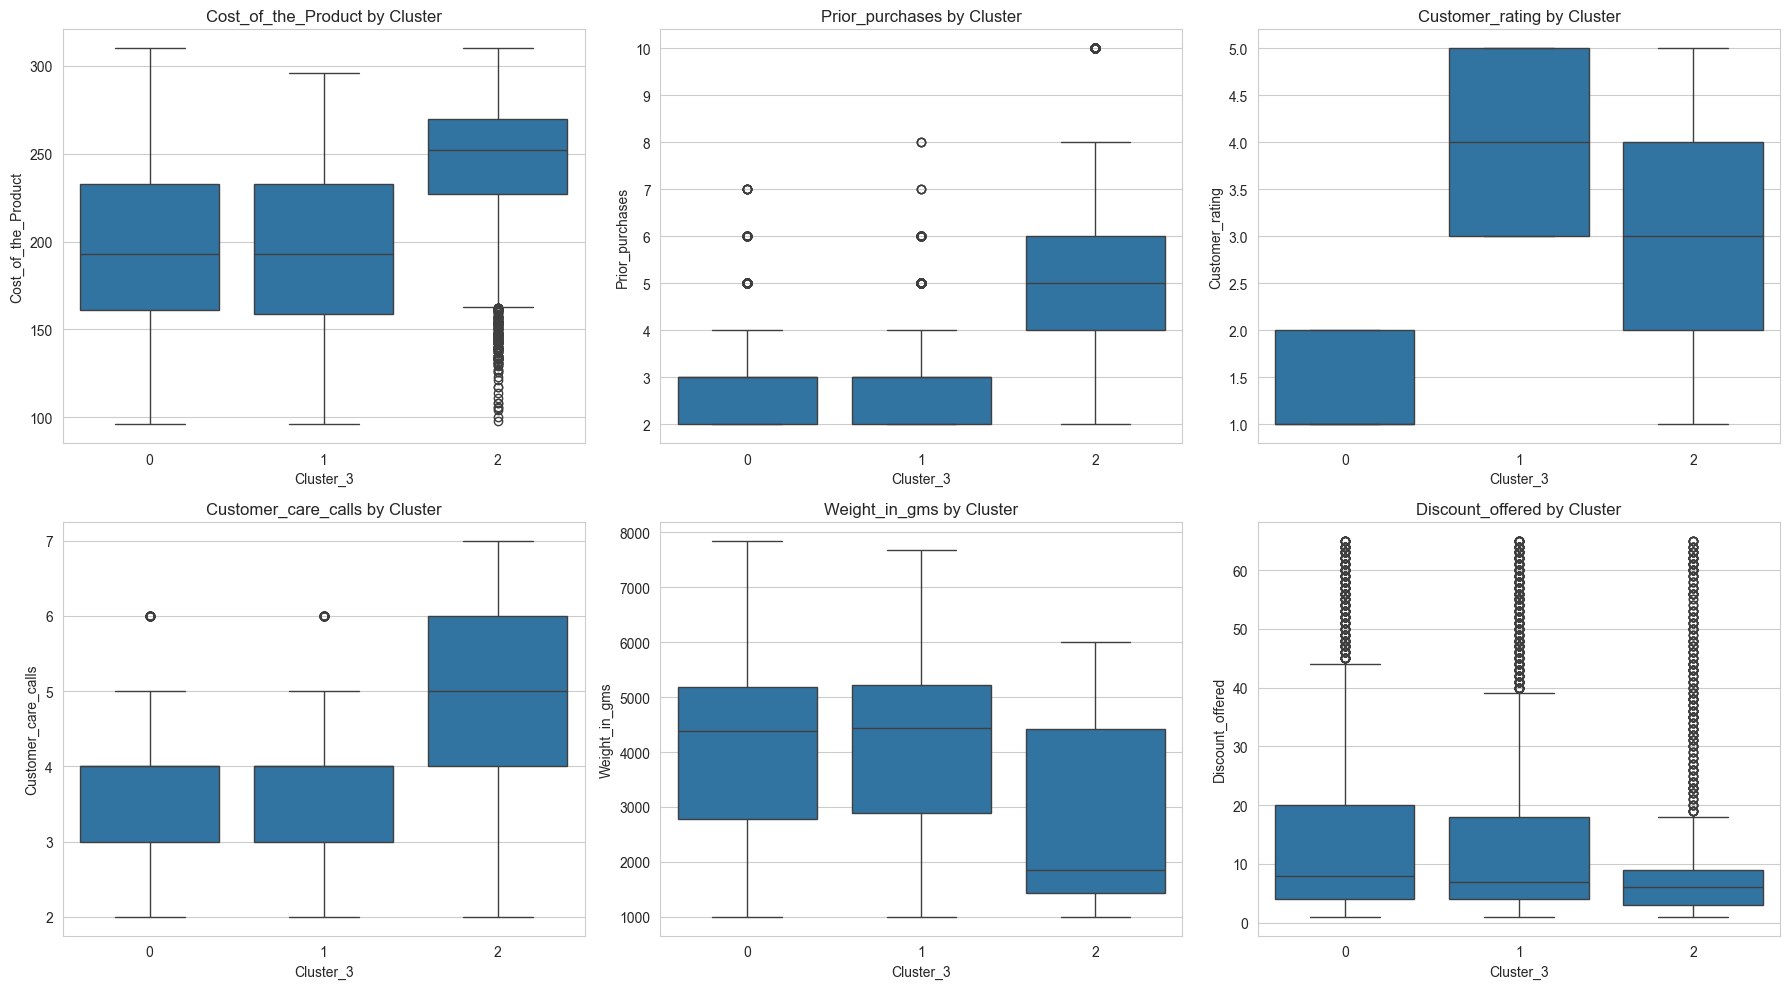

In [59]:
import math
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(
        x="Cluster_3",
        y=col,
        data=df_profile,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Cluster")

plt.tight_layout()
plt.show()

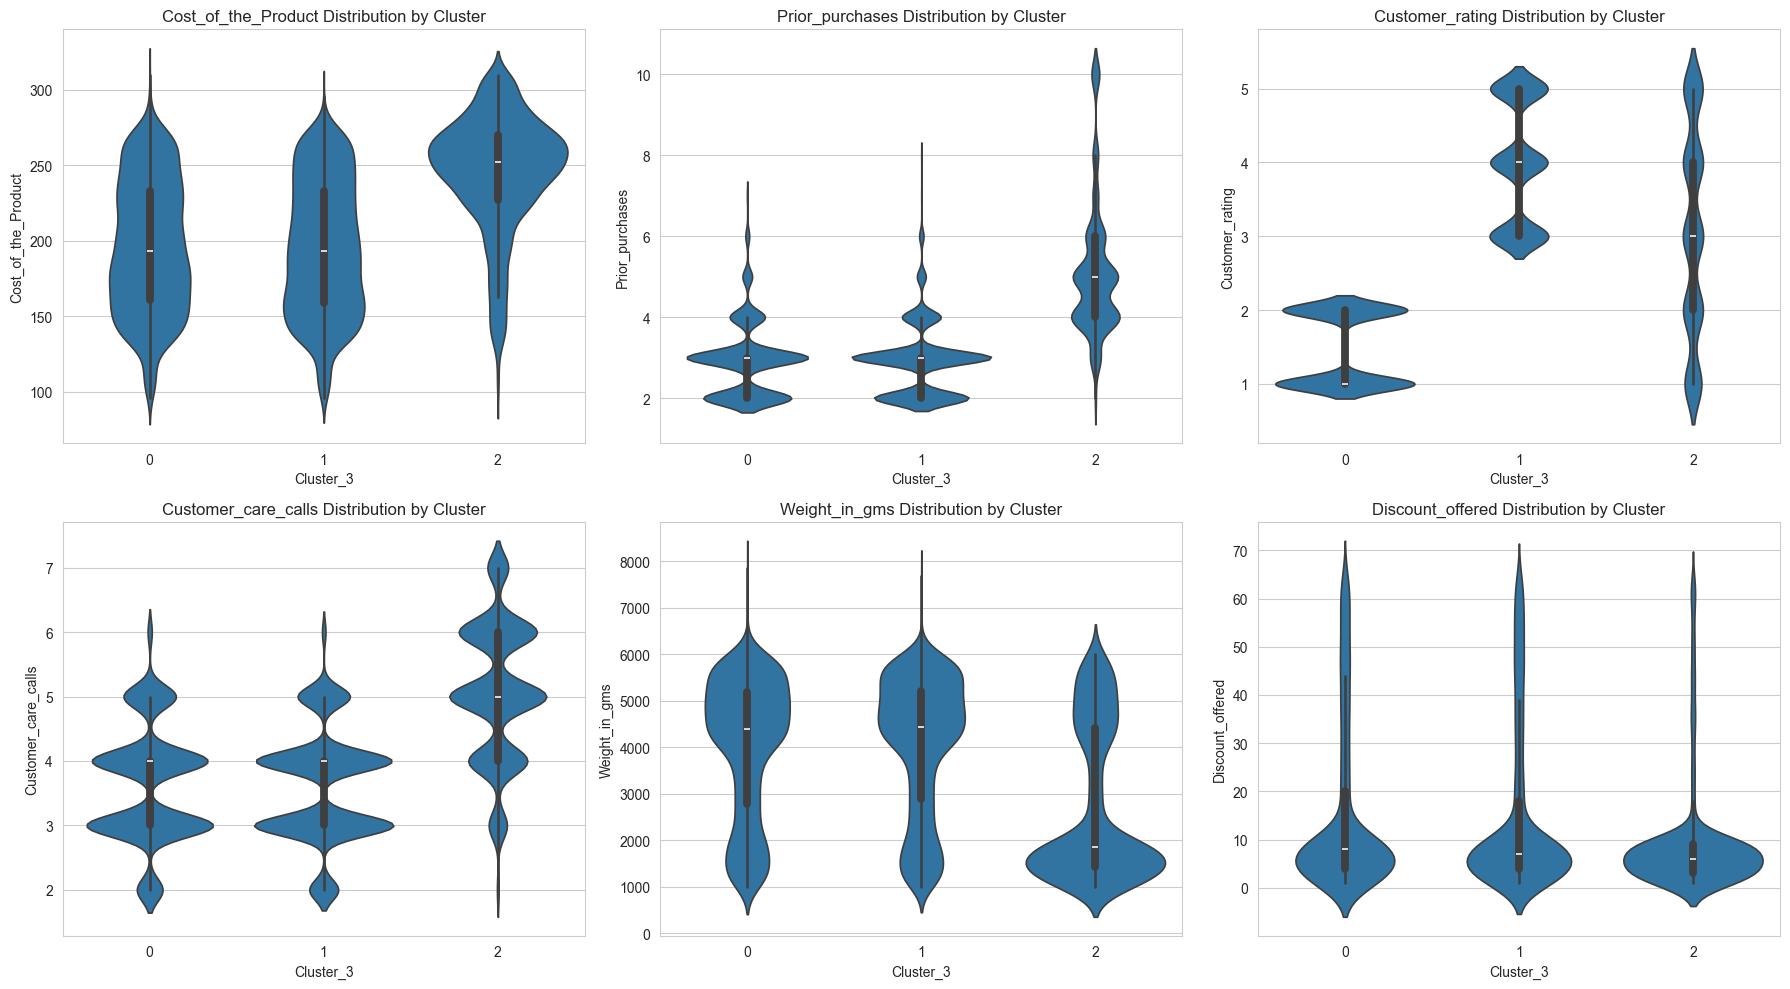

In [60]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(
        x="Cluster_3",
        y=col,
        data=df_profile,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} Distribution by Cluster")

plt.tight_layout()
plt.show()

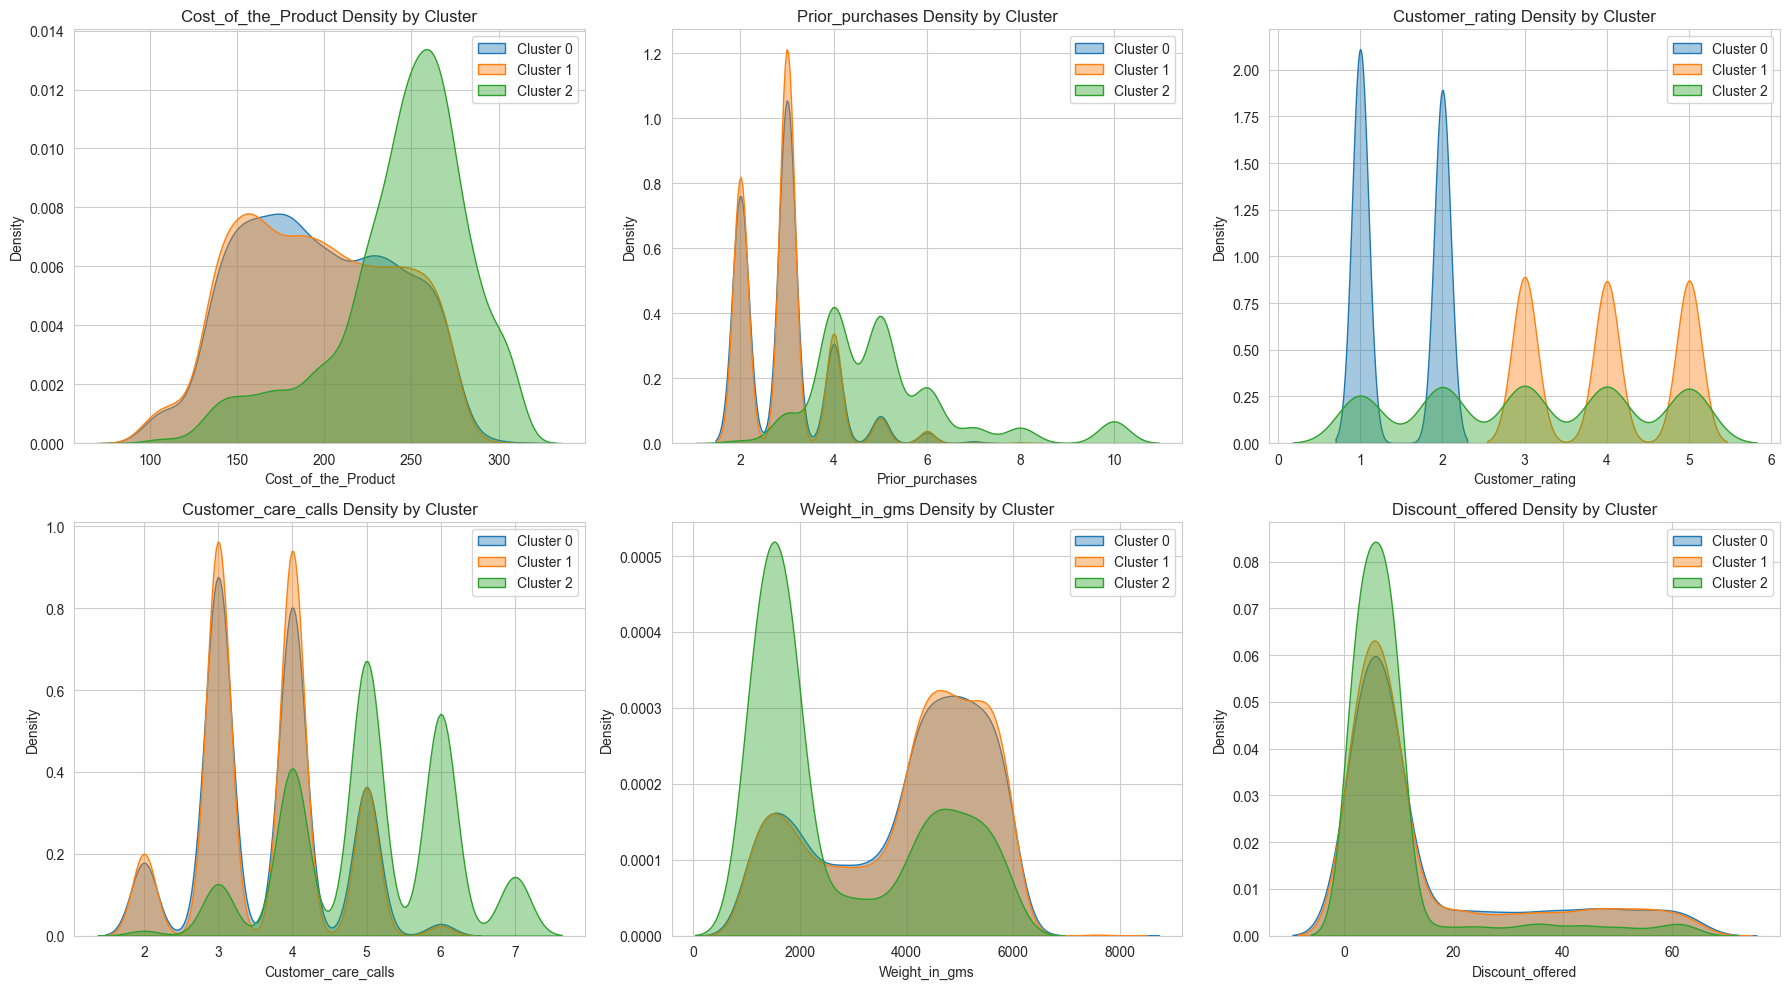

In [61]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    for cluster in sorted(df_profile["Cluster_3"].unique()):
        sns.kdeplot(
            data=df_profile[df_profile["Cluster_3"] == cluster],
            x=col,
            fill=True,
            alpha=0.4,
            ax=axes[i],
            label=f"Cluster {cluster}"
        )
    axes[i].set_title(f"{col} Density by Cluster")
    axes[i].legend()

plt.tight_layout()
plt.show()

<h4>3.1.2.2 Categorical feature profiling</h4>

In [62]:
for col in categorical_cols:
    print(f"\n===== {col} (k=3) =====")
    display(pd.crosstab(df_profile["Cluster_3"], df_profile[col], normalize="index"))

chi_results_3 = {}
for col in categorical_cols:
    contingency = pd.crosstab(df_profile["Cluster_3"], df_profile[col])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_results_3[col] = p

pd.Series(chi_results_3, name="p-value (k=3)").sort_values()


===== Mode_of_Shipment (k=3) =====


Mode_of_Shipment    Flight      Road      Ship
Cluster_3                                     
0                 0.166350  0.156210  0.677440
1                 0.157021  0.161171  0.681808
2                 0.163297  0.162071  0.674632


===== Product_importance (k=3) =====


Product_importance      high       low    medium
Cluster_3                                       
0                   0.096324  0.476236  0.427440
1                   0.091723  0.465604  0.442673
2                   0.068627  0.509191  0.422181


===== Warehouse_block (k=3) =====


Warehouse_block         A         B         C         D         F
Cluster_3                                                        
0                0.177757  0.167617  0.166667  0.159379  0.328580
1                0.160079  0.163573  0.169469  0.169688  0.337192
2                0.165135  0.170037  0.162684  0.169730  0.332414


===== Gender (k=3) =====


Gender            F         M
Cluster_3                    
0          0.501584  0.498416
1          0.508408  0.491592
2          0.500613  0.499387

Product_importance    0.000020
Warehouse_block       0.595567
Gender                0.748801
Mode_of_Shipment      0.799077
Name: p-value (k=3), dtype: float64

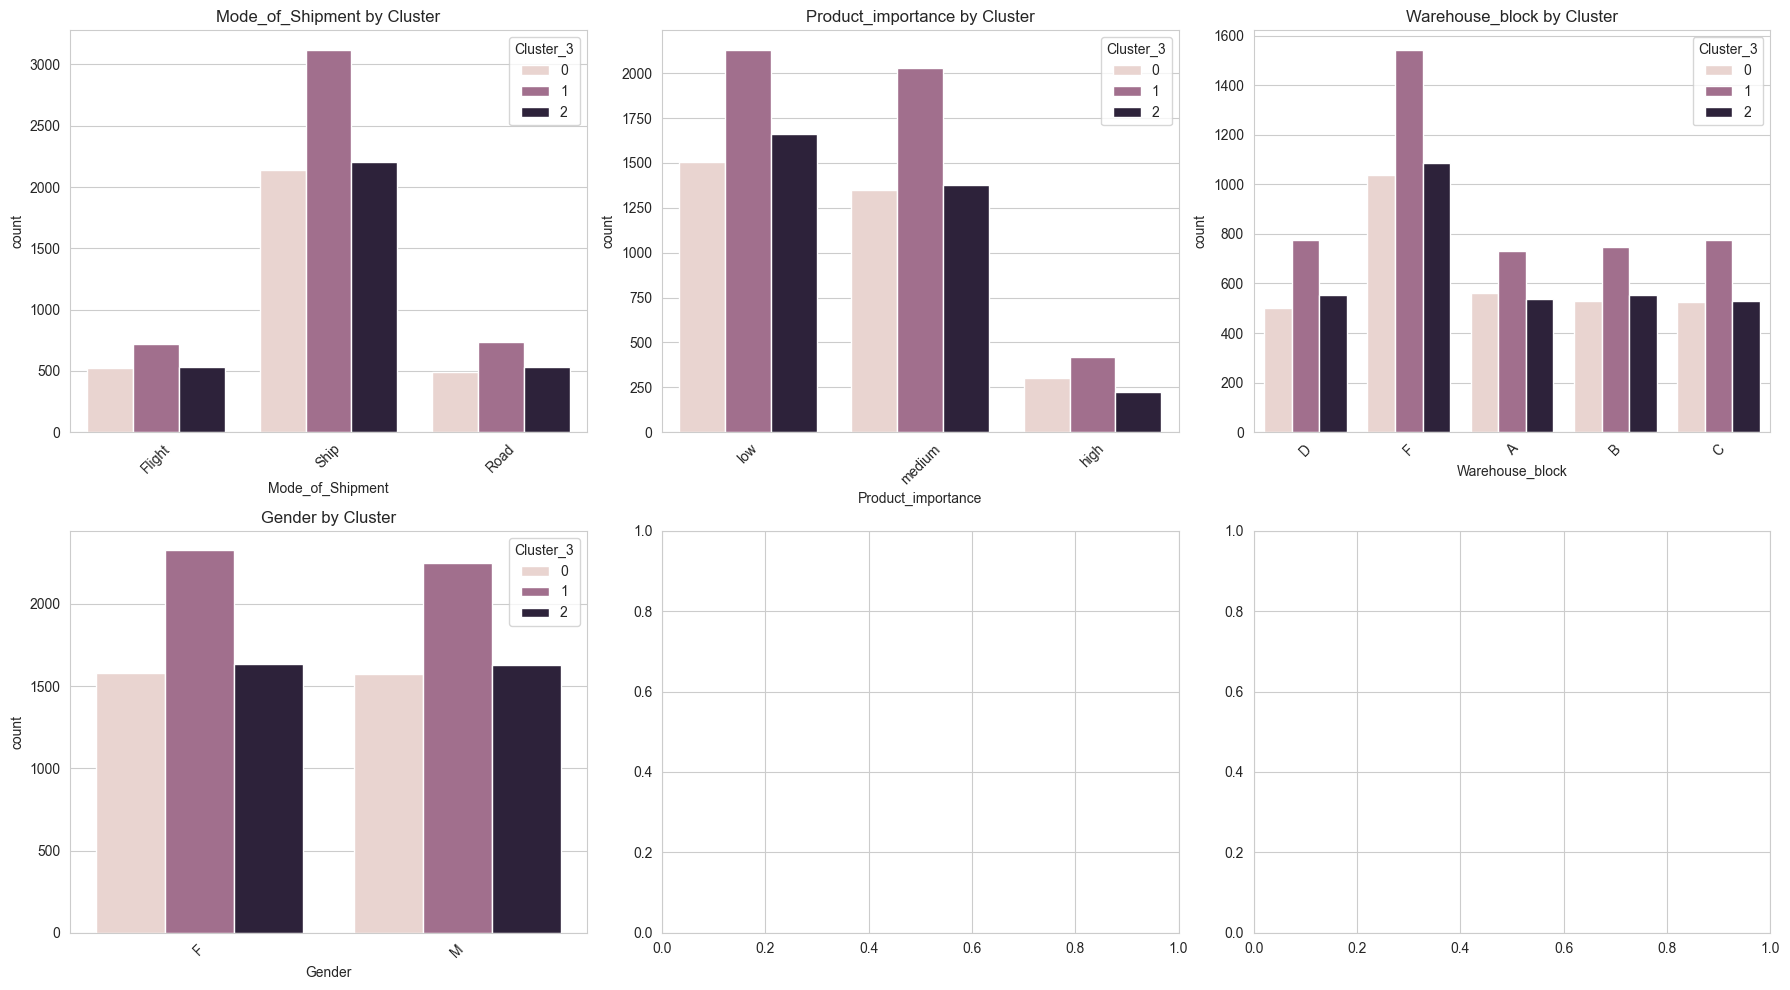

In [63]:
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df_profile,
        x=col,
        hue="Cluster_3",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Cluster")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

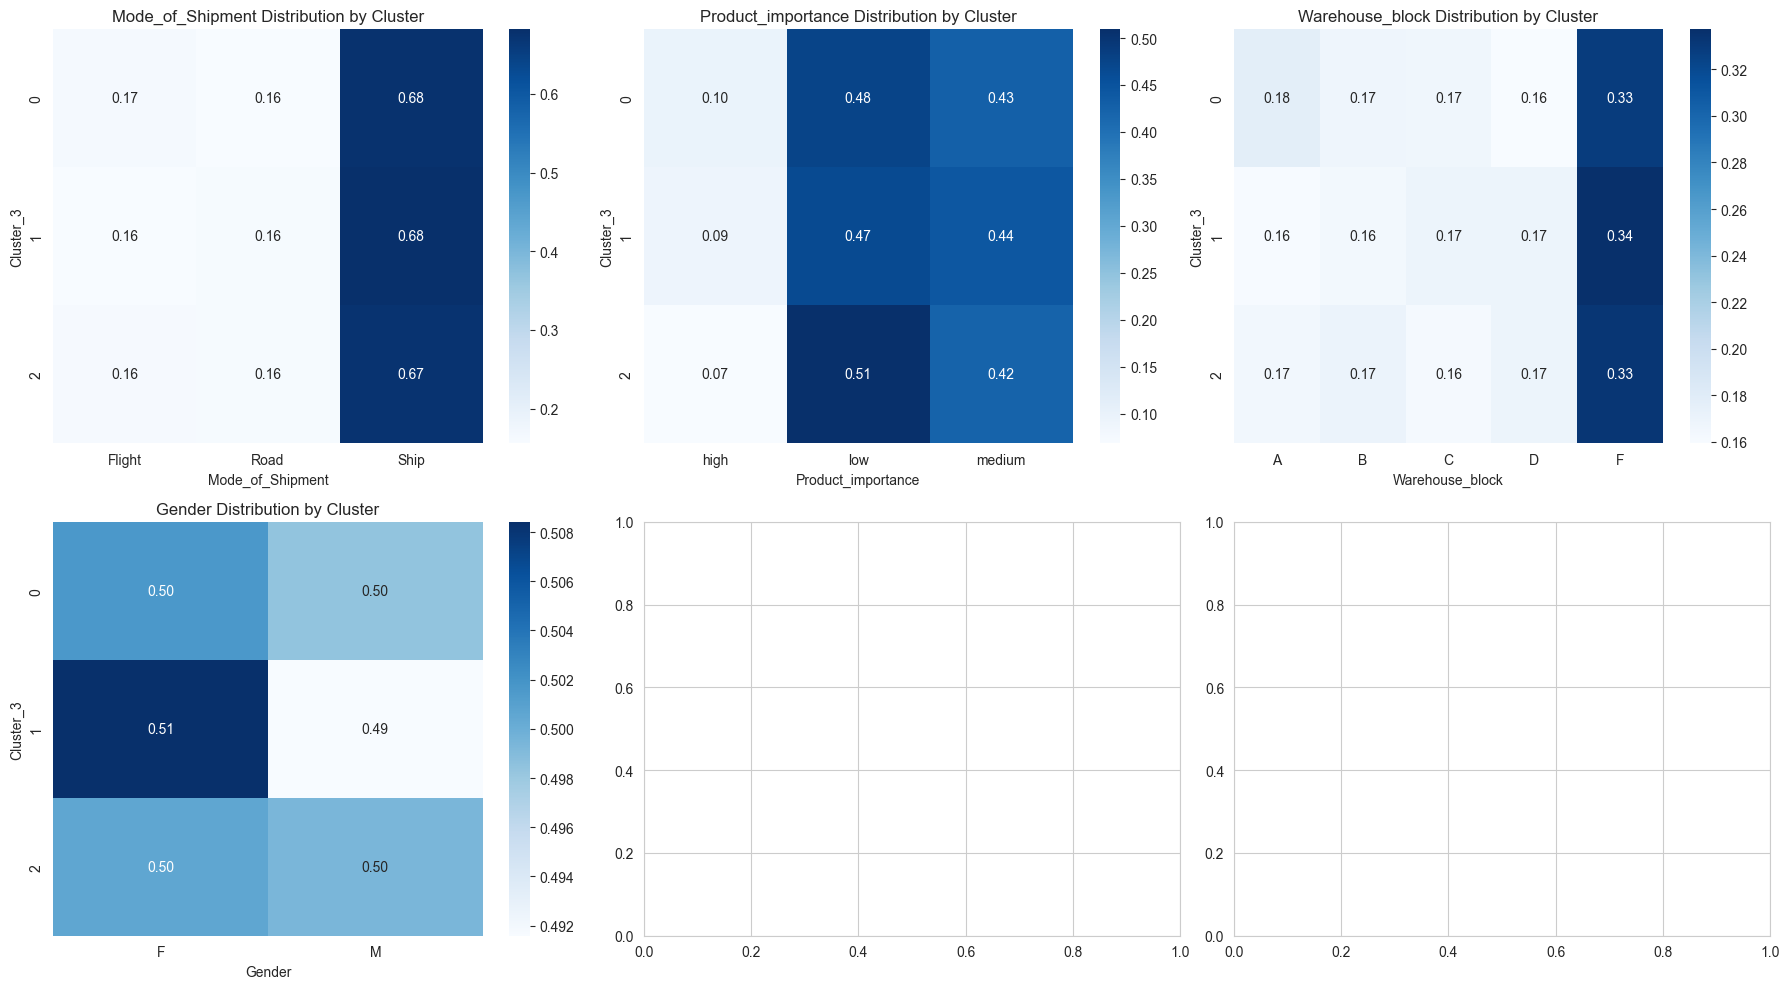

In [64]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(
        df_profile["Cluster_3"],
        df_profile[col],
        normalize="index"
    )
    
    sns.heatmap(
        ct,
        annot=True,
        cmap="Blues",
        fmt=".2f",
        ax=axes[i]
    )
    
    axes[i].set_title(f"{col} Distribution by Cluster")

plt.tight_layout()
plt.show()

In [65]:
from scipy.stats import chi2_contingency

chi_results = {}

for col in categorical_cols:
    contingency = pd.crosstab(df_profile["Cluster_3"], df_profile[col])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_results[col] = p

pd.Series(chi_results, name="p-value").sort_values()

Product_importance    0.000020
Warehouse_block       0.595567
Gender                0.748801
Mode_of_Shipment      0.799077
Name: p-value, dtype: float64

<h3>3.1.3 Four Clusters</h3>

In [66]:
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_4 = kmeans_4.fit_predict(X)

df_profile["Cluster_4"] = clusters_4

In [67]:
df_profile["Cluster_4"].value_counts()

Cluster_4
1    4594
2    3228
3    2447
0     730
Name: count, dtype: int64

<h4>3.1.2.1 Numerical feature profiling</h4>

In [68]:
cluster4_numeric_profile = df_profile.groupby("Cluster_4")[numerical_cols].agg(
    ["mean", "std", "median", "min", "max"]
)

cluster4_numeric_profile

Cost_of_the_Product                             Prior_purchases  \
                         mean        std median  min  max            mean   
Cluster_4                                                                   
0                  197.017808  47.215595  198.0   97  286        7.500000   
1                  196.311929  43.732213  195.0   96  296        2.915977   
2                  197.665737  43.616800  196.0   96  310        2.934634   
3                  256.726604  28.883843  258.0  121  310        4.452799   

                                    ... Weight_in_gms                       \
                std median min max  ...          mean          std  median   
Cluster_4                           ...                                      
0          1.593238    7.0   5  10  ...   4022.127397  1469.646837  4408.5   
1          0.800822    3.0   2   5  ...   4031.302569  1476.000323  4430.0   
2          0.840412    3.0   2   5  ...   3973.307621  1493.017195  4375.5   
3          0.899782    4.0   2   7  ...   2324.787904  1463.459652  1694.0   

                      Discount_offered                            
            min   max             mean        std median min max  
Cluster_4                                                         
0          1009  5995        14.412329  16.815096    7.5   1  65  
1          1001  7684        14.854593  17.199631    7.0   1  65  
2          1005  7846        15.256506  17.466029    8.0   1  65  
3          1001  5991         7.797711   9.917997    6.0   1  65  

[4 rows x 30 columns]

In [69]:
cluster4_numeric_profile = df_profile.groupby("Cluster_4")[numerical_cols].agg(
    ["mean", "std", "median", "min", "max"]
)

cluster4_numeric_profile

Cost_of_the_Product                             Prior_purchases  \
                         mean        std median  min  max            mean   
Cluster_4                                                                   
0                  197.017808  47.215595  198.0   97  286        7.500000   
1                  196.311929  43.732213  195.0   96  296        2.915977   
2                  197.665737  43.616800  196.0   96  310        2.934634   
3                  256.726604  28.883843  258.0  121  310        4.452799   

                                    ... Weight_in_gms                       \
                std median min max  ...          mean          std  median   
Cluster_4                           ...                                      
0          1.593238    7.0   5  10  ...   4022.127397  1469.646837  4408.5   
1          0.800822    3.0   2   5  ...   4031.302569  1476.000323  4430.0   
2          0.840412    3.0   2   5  ...   3973.307621  1493.017195  4375.5   
3          0.899782    4.0   2   7  ...   2324.787904  1463.459652  1694.0   

                      Discount_offered                            
            min   max             mean        std median min max  
Cluster_4                                                         
0          1009  5995        14.412329  16.815096    7.5   1  65  
1          1001  7684        14.854593  17.199631    7.0   1  65  
2          1005  7846        15.256506  17.466029    8.0   1  65  
3          1001  5991         7.797711   9.917997    6.0   1  65  

[4 rows x 30 columns]

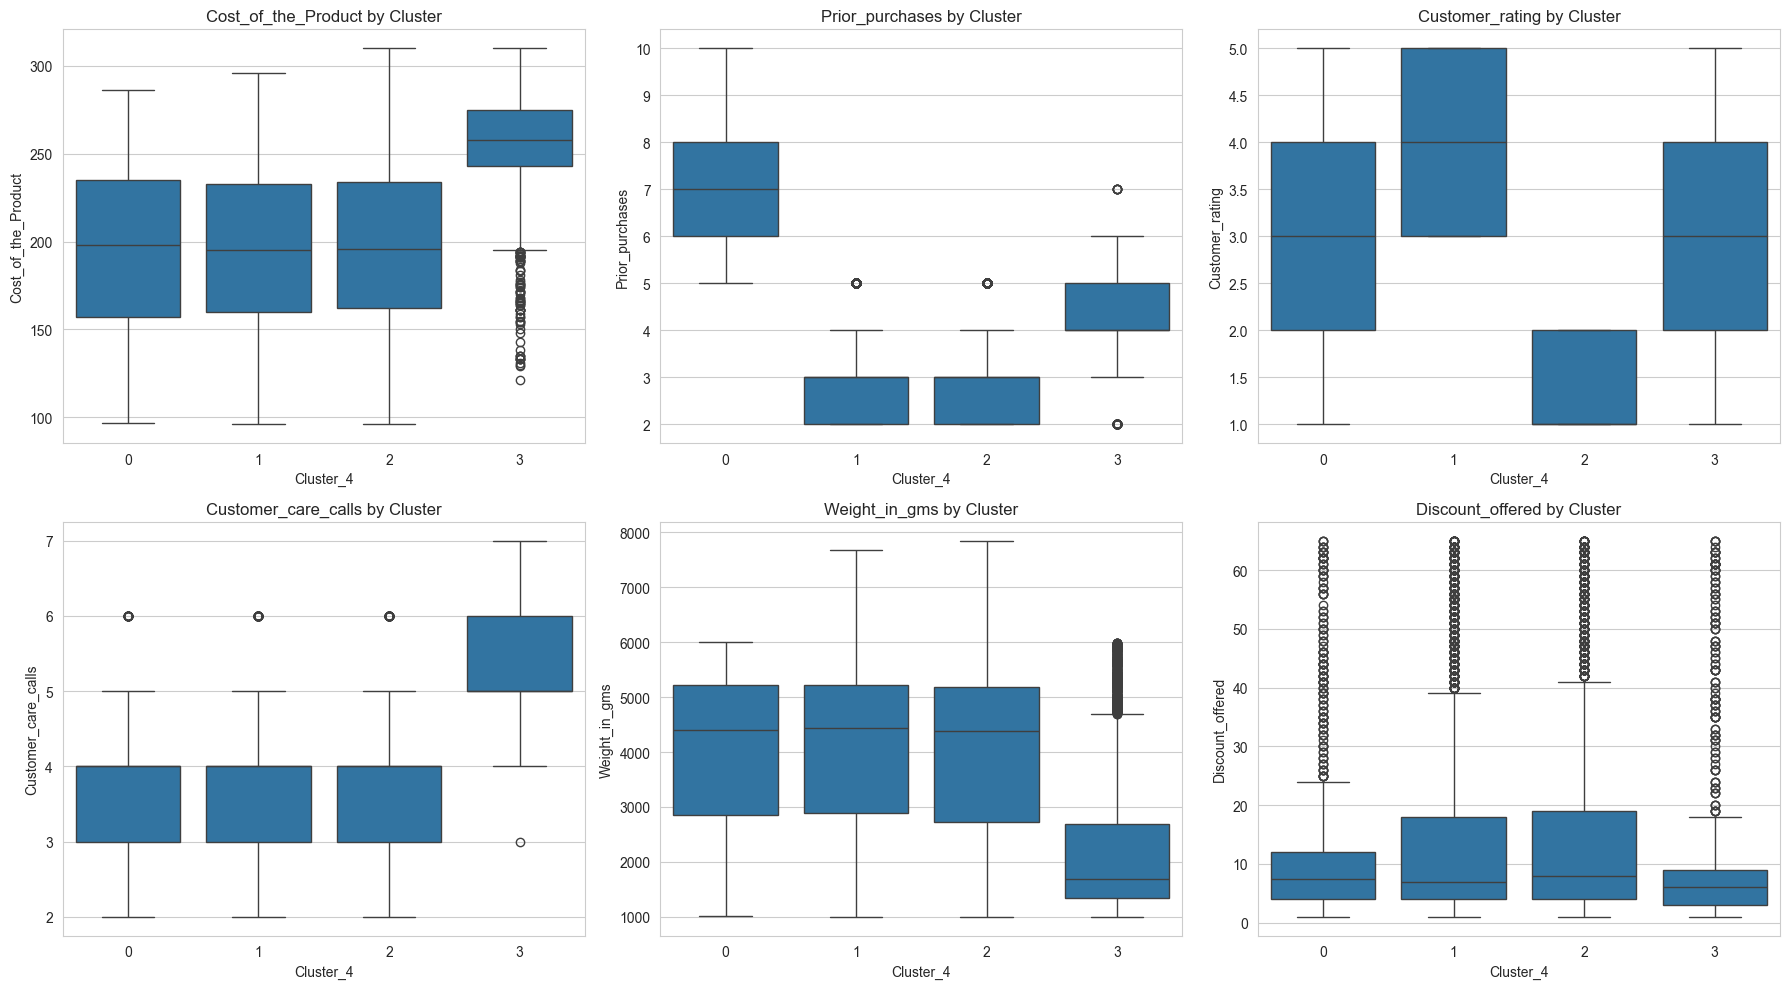

In [70]:
import math
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(
        x="Cluster_4",
        y=col,
        data=df_profile,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Cluster")

plt.tight_layout()
plt.show()

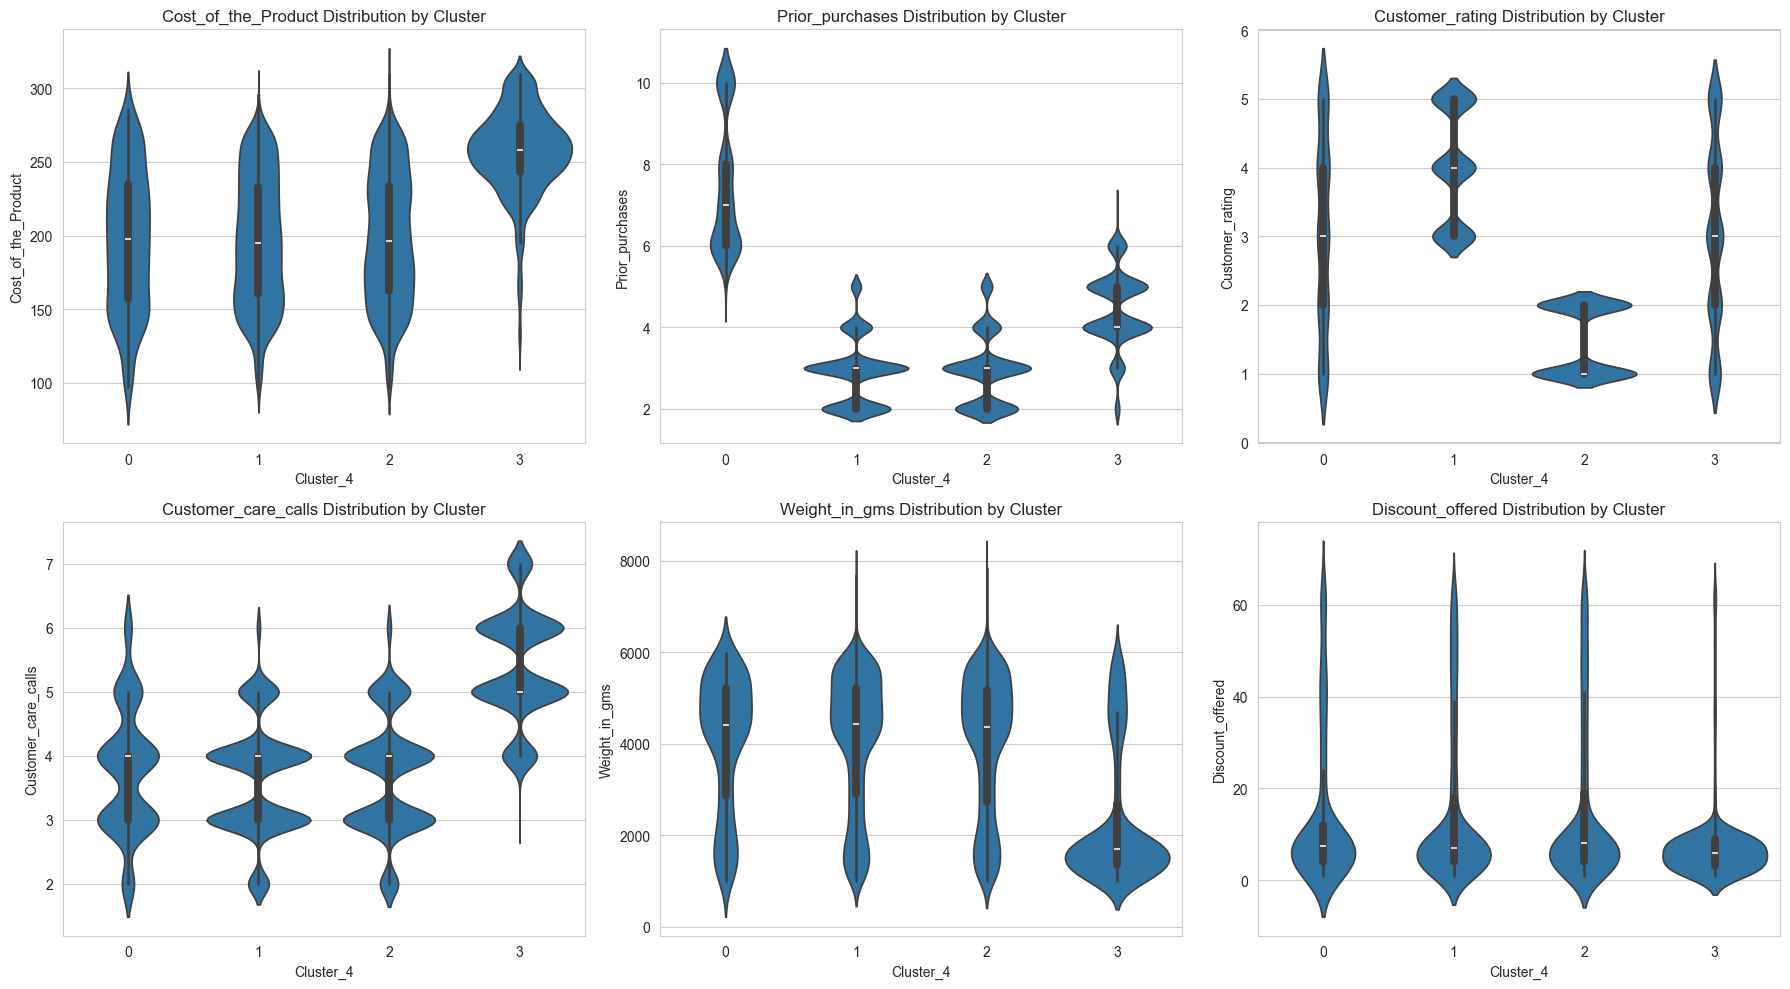

In [71]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(
        x="Cluster_4",
        y=col,
        data=df_profile,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} Distribution by Cluster")

plt.tight_layout()
plt.show()

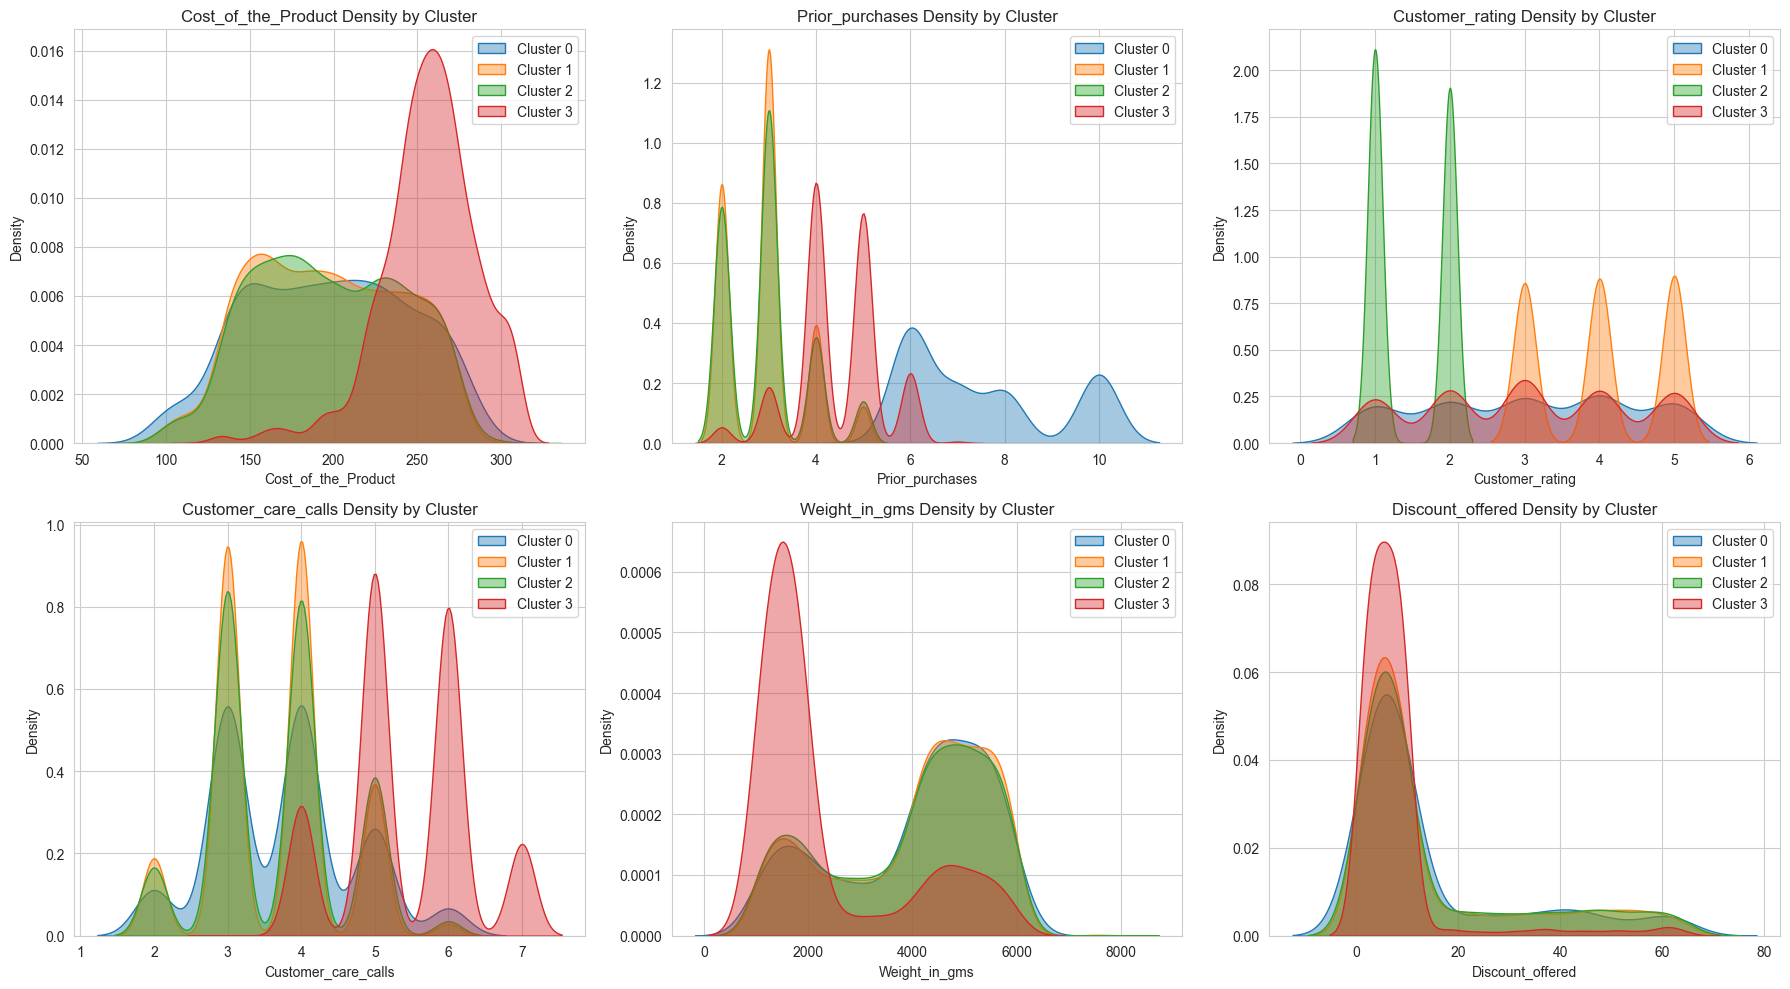

In [72]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    for cluster in sorted(df_profile["Cluster_4"].unique()):
        sns.kdeplot(
            data=df_profile[df_profile["Cluster_4"] == cluster],
            x=col,
            fill=True,
            alpha=0.4,
            ax=axes[i],
            label=f"Cluster {cluster}"
        )
    axes[i].set_title(f"{col} Density by Cluster")
    axes[i].legend()

plt.tight_layout()
plt.show()

<h4>3.1.2.2 Categorical feature profiling</h4>

In [73]:
for col in categorical_cols:
    print(f"\n===== {col} =====")
    display(
        pd.crosstab(
            df_profile["Cluster_4"],
            df_profile[col],
            normalize="index"
        )
    )


===== Mode_of_Shipment =====


Mode_of_Shipment    Flight      Road      Ship
Cluster_4                                     
0                 0.156164  0.156164  0.687671
1                 0.157162  0.161297  0.681541
2                 0.166357  0.154275  0.679368
3                 0.165100  0.166326  0.668574


===== Product_importance =====


Product_importance      high       low    medium
Cluster_4                                       
0                   0.150685  0.312329  0.536986
1                   0.092730  0.464301  0.442969
2                   0.096964  0.476146  0.426890
3                   0.040458  0.571720  0.387822


===== Warehouse_block =====


Warehouse_block         A         B         C         D         F
Cluster_4                                                        
0                0.164384  0.180822  0.165753  0.157534  0.331507
1                0.160644  0.163039  0.170004  0.171093  0.335220
2                0.177200  0.169455  0.164188  0.158302  0.330855
3                0.164691  0.165509  0.163874  0.172456  0.333470


===== Gender =====


Gender            F         M
Cluster_4                    
0          0.521918  0.478082
1          0.506530  0.493470
2          0.497522  0.502478
3          0.503065  0.496935

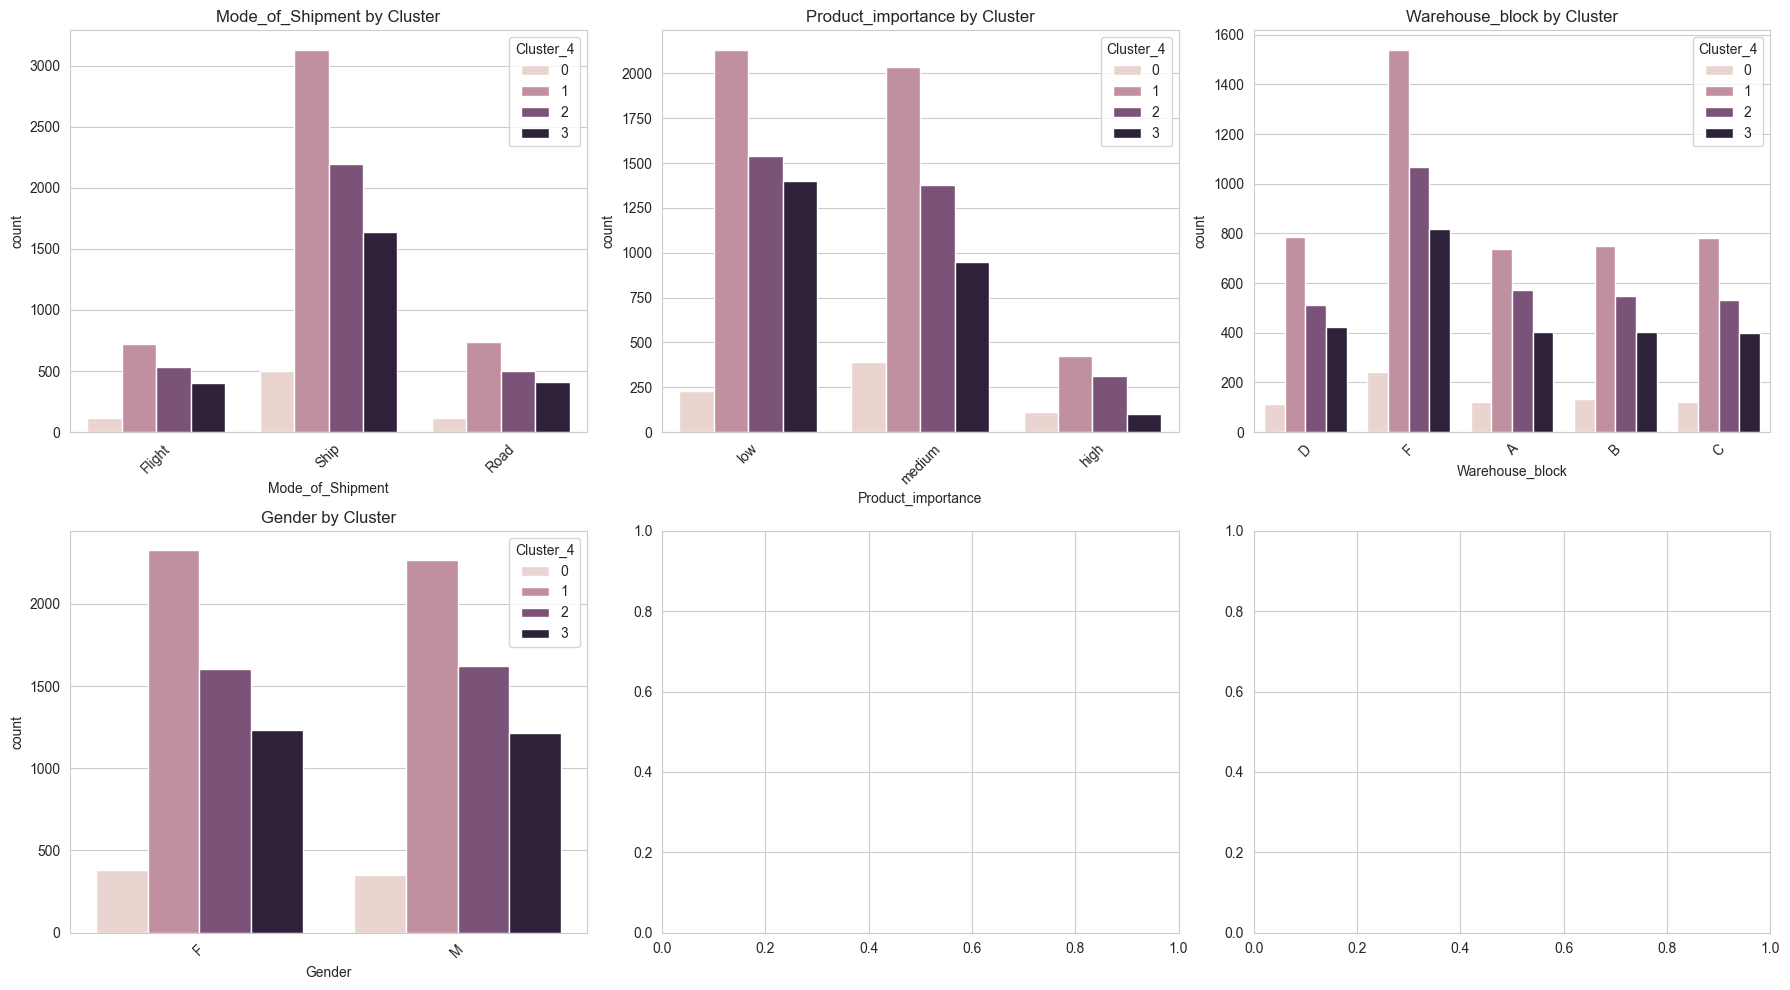

In [74]:
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df_profile,
        x=col,
        hue="Cluster_4",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Cluster")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

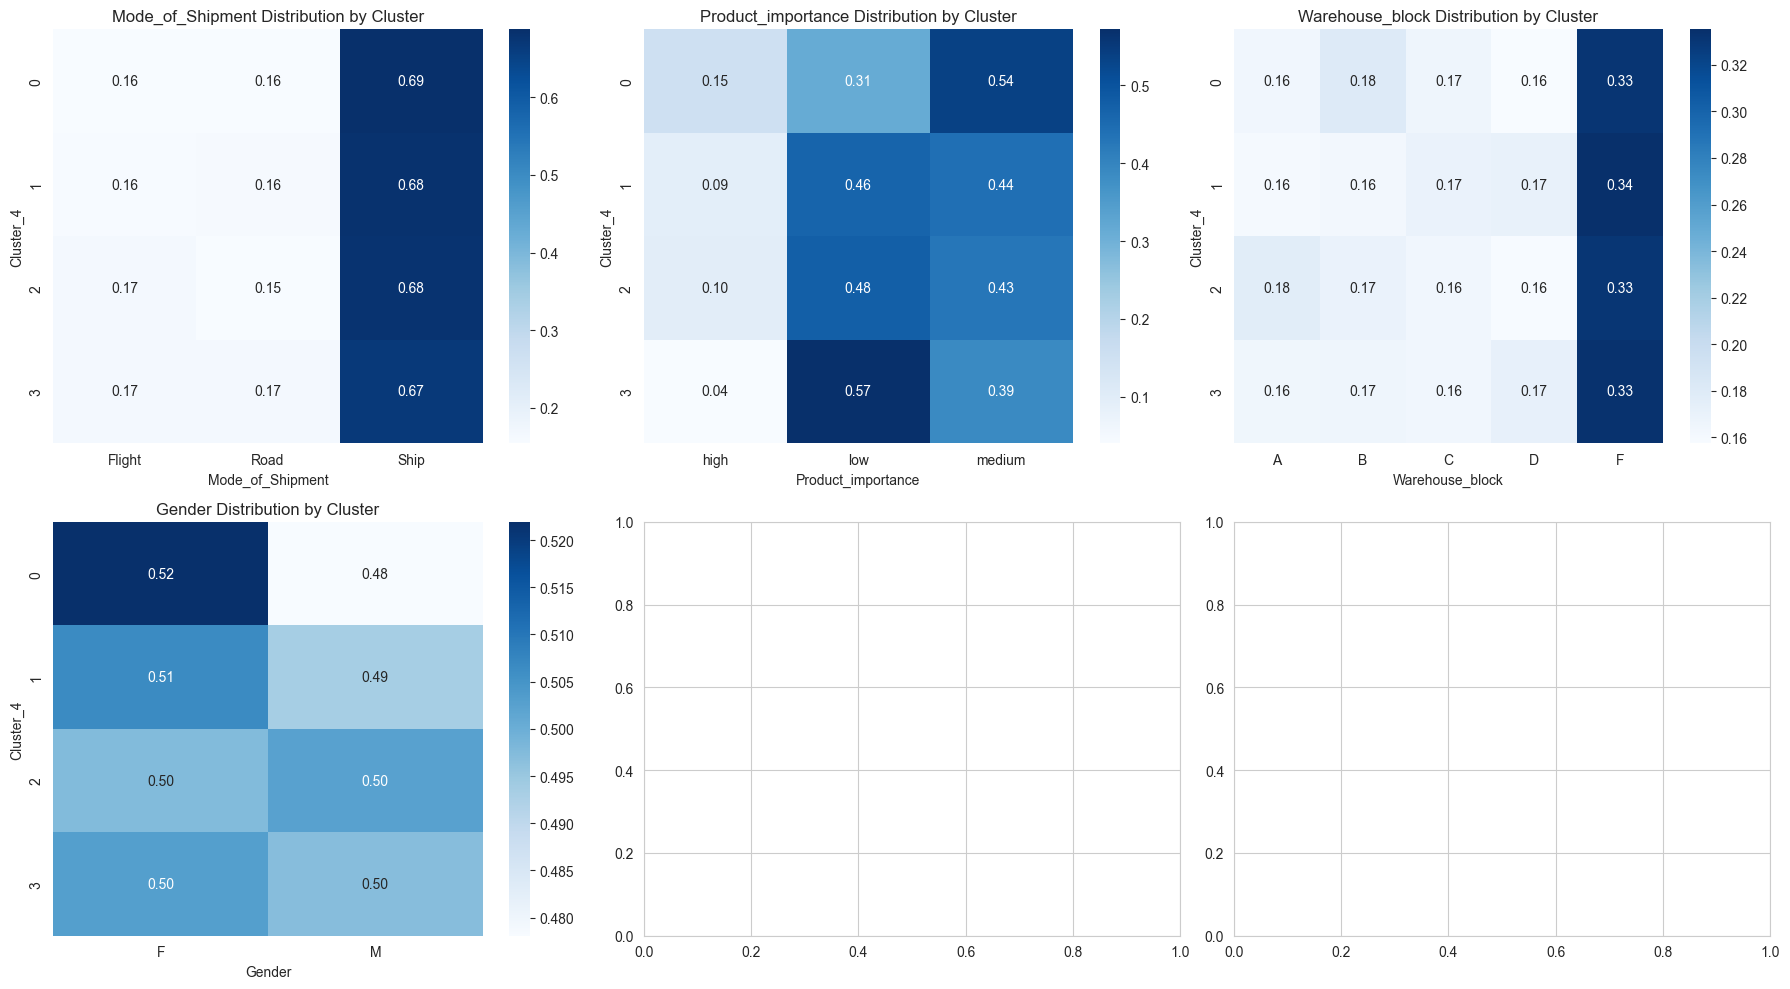

In [75]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(
        df_profile["Cluster_4"],
        df_profile[col],
        normalize="index"
    )
    
    sns.heatmap(
        ct,
        annot=True,
        cmap="Blues",
        fmt=".2f",
        ax=axes[i]
    )
    
    axes[i].set_title(f"{col} Distribution by Cluster")

plt.tight_layout()
plt.show()

In [76]:
from scipy.stats import chi2_contingency

chi_results = {}

for col in categorical_cols:
    contingency = pd.crosstab(df_profile["Cluster_4"], df_profile[col])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_results[col] = p

pd.Series(chi_results, name="p-value").sort_values()

Product_importance    9.777579e-45
Gender                6.582908e-01
Mode_of_Shipment      7.792370e-01
Warehouse_block       7.811720e-01
Name: p-value, dtype: float64

<p>The k=4 solution provides a more granular segmentation, but only two clusters show clear differentiation (loyal customers and lightweight product buyers). The remaining clusters overlap in both numerical and categorical features. Silhouette analysis confirms that k=2 offers a more natural partition of the dataset, while k=4 introduces over-segmentation without substantial improvement in cluster separability.</p>

<h3>3.1.4 Two vs Three vs Four Clusters Comparison</h3>

In [77]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
X_pca_full = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

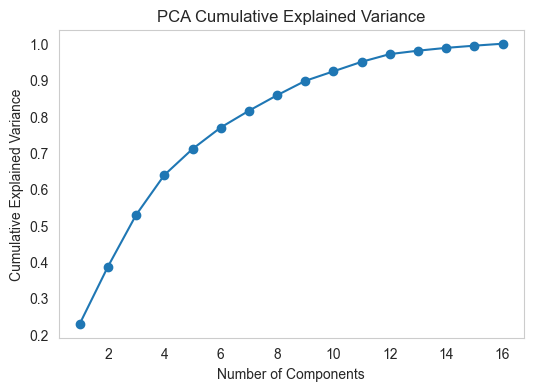

In [78]:
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.grid()
plt.show()

<p>The cumulative explained variance curve shows that no dominant principal component exists. Approximately 7 components are required to explain 80% of the variance, indicating that the dataset does not lie on a low-dimensional manifold. This supports the relatively low silhouette scores observed during clustering, suggesting weak inherent cluster structure.</p>

In [79]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)

df_profile["PC1"] = X_pca_2[:,0]
df_profile["PC2"] = X_pca_2[:,1]

print("Explained variance (2 components):", pca_2.explained_variance_ratio_)

Explained variance (2 components): [0.22939991 0.15734942]


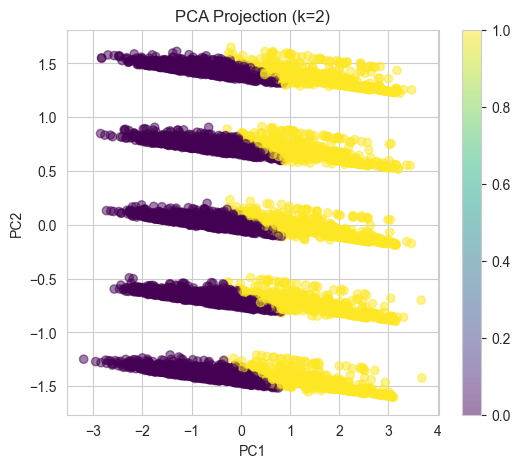

In [80]:
plt.figure(figsize=(6,5))
plt.scatter(df_profile["PC1"], df_profile["PC2"], 
            c=df_profile["Cluster"], cmap="viridis", alpha=0.5)
plt.title("PCA Projection (k=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

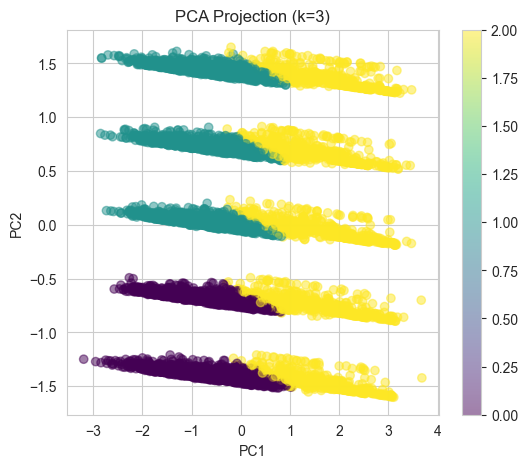

In [81]:
plt.figure(figsize=(6,5))
plt.scatter(df_profile["PC1"], df_profile["PC2"], 
            c=df_profile["Cluster_3"], cmap="viridis", alpha=0.5)
plt.title("PCA Projection (k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

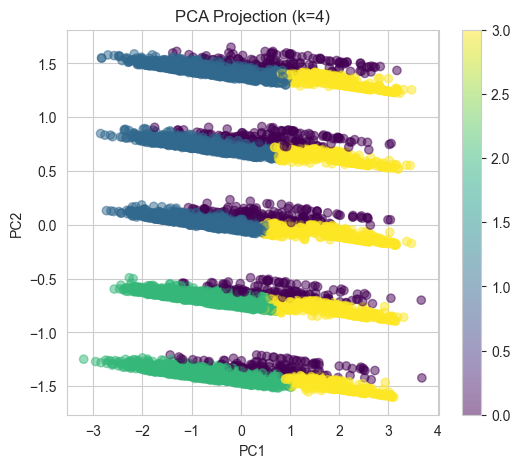

In [82]:
plt.figure(figsize=(6,5))
plt.scatter(df_profile["PC1"], df_profile["PC2"], 
            c=df_profile["Cluster_4"], cmap="viridis", alpha=0.5)
plt.title("PCA Projection (k=4)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

In [83]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

df_profile["PC1_3d"] = X_pca_3d[:, 0]
df_profile["PC2_3d"] = X_pca_3d[:, 1]
df_profile["PC3_3d"] = X_pca_3d[:, 2]

print(f"Explained variance (3 components): {pca_3d.explained_variance_ratio_}")
print(f"Cumulative: {pca_3d.explained_variance_ratio_.sum():.4f}")

colors = px.colors.qualitative.Vivid

for k, lbl_col, title in [
    (2, "Cluster", "3D PCA — K-Means (k=2)"),
    (3, "Cluster_3", "3D PCA — K-Means (k=3)"),
    (4, "Cluster_4", "3D PCA — K-Means (k=4)")
]:
    fig = go.Figure()
    for c in sorted(df_profile[lbl_col].unique()):
        mask = df_profile[lbl_col] == c
        fig.add_trace(go.Scatter3d(
            x=df_profile.loc[mask, "PC1_3d"],
            y=df_profile.loc[mask, "PC2_3d"],
            z=df_profile.loc[mask, "PC3_3d"],
            mode='markers',
            marker=dict(size=2, opacity=0.5, color=colors[c % len(colors)]),
            name=f"Cluster {c}"
        ))
    fig.update_layout(
        title=title,
        scene=dict(xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3"),
        width=800, height=600, margin=dict(l=0, r=0, b=0, t=40)
    )
    fig.show()

Explained variance (3 components): [0.22939991 0.15734942 0.14236314]
Cumulative: 0.5291


In [84]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

comparison_results = []

for k, lbl_col in [(2, "Cluster"), (3, "Cluster_3"), (4, "Cluster_4")]:
    lbl = df_profile[lbl_col].values
    comparison_results.append({
        "k": k,
        "Silhouette": round(silhouette_score(X, lbl), 4),
        "Davies-Bouldin": round(davies_bouldin_score(X, lbl), 4),
        "Calinski-Harabasz": round(calinski_harabasz_score(X, lbl), 4)
    })

comparison_df = pd.DataFrame(comparison_results).set_index("k")
comparison_df

Silhouette  Davies-Bouldin  Calinski-Harabasz
k                                               
2      0.1786          2.0915          2124.7656
3      0.1270          2.1610          1793.4156
4      0.1437          1.9469          1625.3195

In [85]:
# How k=2 clusters split into k=3 clusters
print("===== k=2 → k=3 Mapping =====")
ct_2_3 = pd.crosstab(df_profile["Cluster"], df_profile["Cluster_3"], normalize="index")
display(ct_2_3)

print("\n===== k=2 → k=4 Mapping =====")
ct_2_4 = pd.crosstab(df_profile["Cluster"], df_profile["Cluster_4"], normalize="index")
display(ct_2_4)

print("\n===== k=3 → k=4 Mapping =====")
ct_3_4 = pd.crosstab(df_profile["Cluster_3"], df_profile["Cluster_4"], normalize="index")
display(ct_3_4)

===== k=2 → k=3 Mapping =====


Cluster_3         0         1         2
Cluster                                
0          0.400661  0.599339  0.000000
1          0.035871  0.012248  0.951881


===== k=2 → k=4 Mapping =====


Cluster_4         0         1         2         3
Cluster                                          
0          0.014531  0.583223  0.394584  0.007662
1          0.180811  0.052202  0.070283  0.696705


===== k=3 → k=4 Mapping =====


Cluster_4         0         1         2         3
Cluster_3                                        
0          0.017110  0.000000  0.980672  0.002218
1          0.016816  0.972046  0.000000  0.011138
2          0.183517  0.043811  0.040748  0.731924

In [86]:
numerical_cols = [
    "Cost_of_the_Product", "Prior_purchases", "Customer_rating",
    "Customer_care_calls", "Weight_in_gms", "Discount_offered"
]

print("===== Cluster Means (k=2) =====")
display(df_profile.groupby("Cluster")[numerical_cols].mean().round(2))

print("\n===== Cluster Means (k=3) =====")
display(df_profile.groupby("Cluster_3")[numerical_cols].mean().round(2))

print("\n===== Cluster Means (k=4) =====")
display(df_profile.groupby("Cluster_4")[numerical_cols].mean().round(2))

===== Cluster Means (k=2) =====


Cost_of_the_Product  Prior_purchases  Customer_rating  \
Cluster                                                          
0                     194.92             2.90             2.99   
1                     243.93             5.04             3.00   

         Customer_care_calls  Weight_in_gms  Discount_offered  
Cluster                                                        
0                       3.61        4007.24             15.12  
1                       5.04        2810.07              9.52


===== Cluster Means (k=3) =====


Cost_of_the_Product  Prior_purchases  Customer_rating  \
Cluster_3                                                          
0                       196.23             2.92             1.47   
1                       195.33             2.92             3.99   
2                       244.55             5.10             3.05   

           Customer_care_calls  Weight_in_gms  Discount_offered  
Cluster_3                                                        
0                         3.64        3991.45             15.34  
1                         3.62        4027.14             14.94  
2                         5.07        2736.91              9.28


===== Cluster Means (k=4) =====


Cost_of_the_Product  Prior_purchases  Customer_rating  \
Cluster_4                                                          
0                       197.02             7.50             3.06   
1                       196.31             2.92             4.01   
2                       197.67             2.93             1.47   
3                       256.73             4.45             3.05   

           Customer_care_calls  Weight_in_gms  Discount_offered  
Cluster_4                                                        
0                         3.75        4022.13             14.41  
1                         3.64        4031.30             14.85  
2                         3.68        3973.31             15.26  
3                         5.42        2324.79              7.80

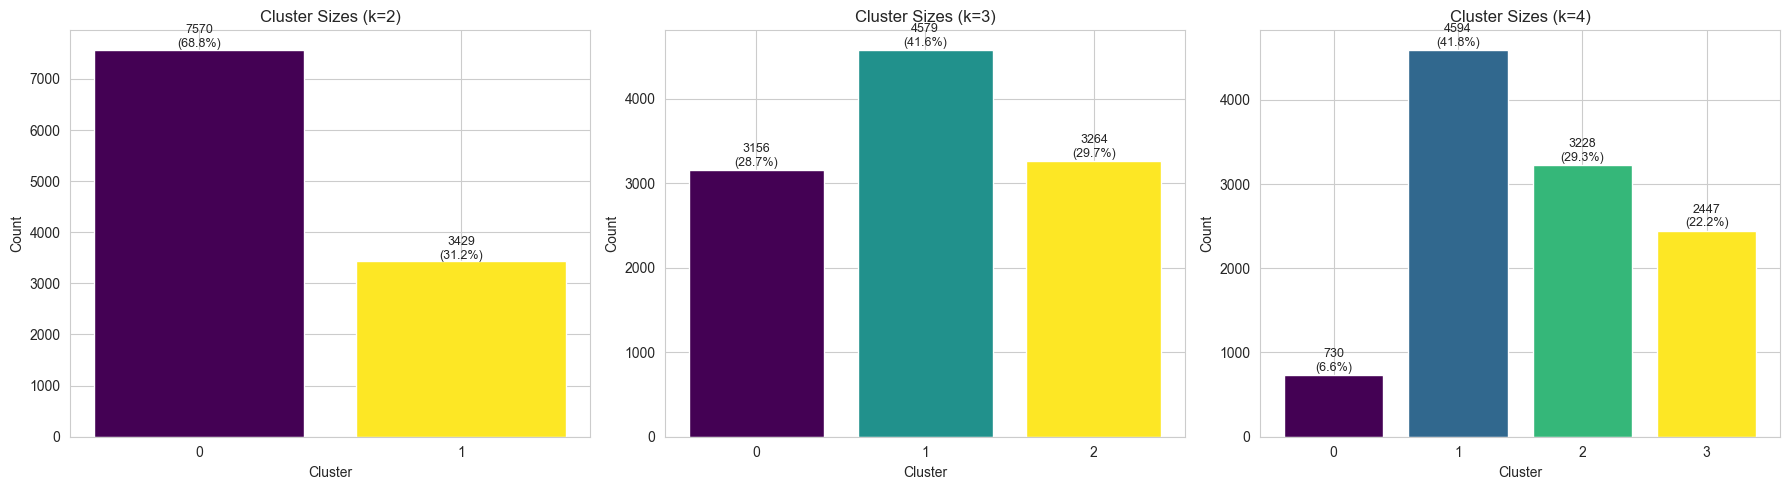

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (k, lbl_col) in zip(axes, [(2, "Cluster"), (3, "Cluster_3"), (4, "Cluster_4")]):
    sizes = df_profile[lbl_col].value_counts().sort_index()
    ax.bar(sizes.index.astype(str), sizes.values, color=plt.cm.viridis(np.linspace(0, 1, len(sizes))))
    ax.set_title(f"Cluster Sizes (k={k})")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Count")
    for j, v in enumerate(sizes.values):
        ax.text(j, v + 50, f"{v}\n({v/len(df_profile)*100:.1f}%)", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

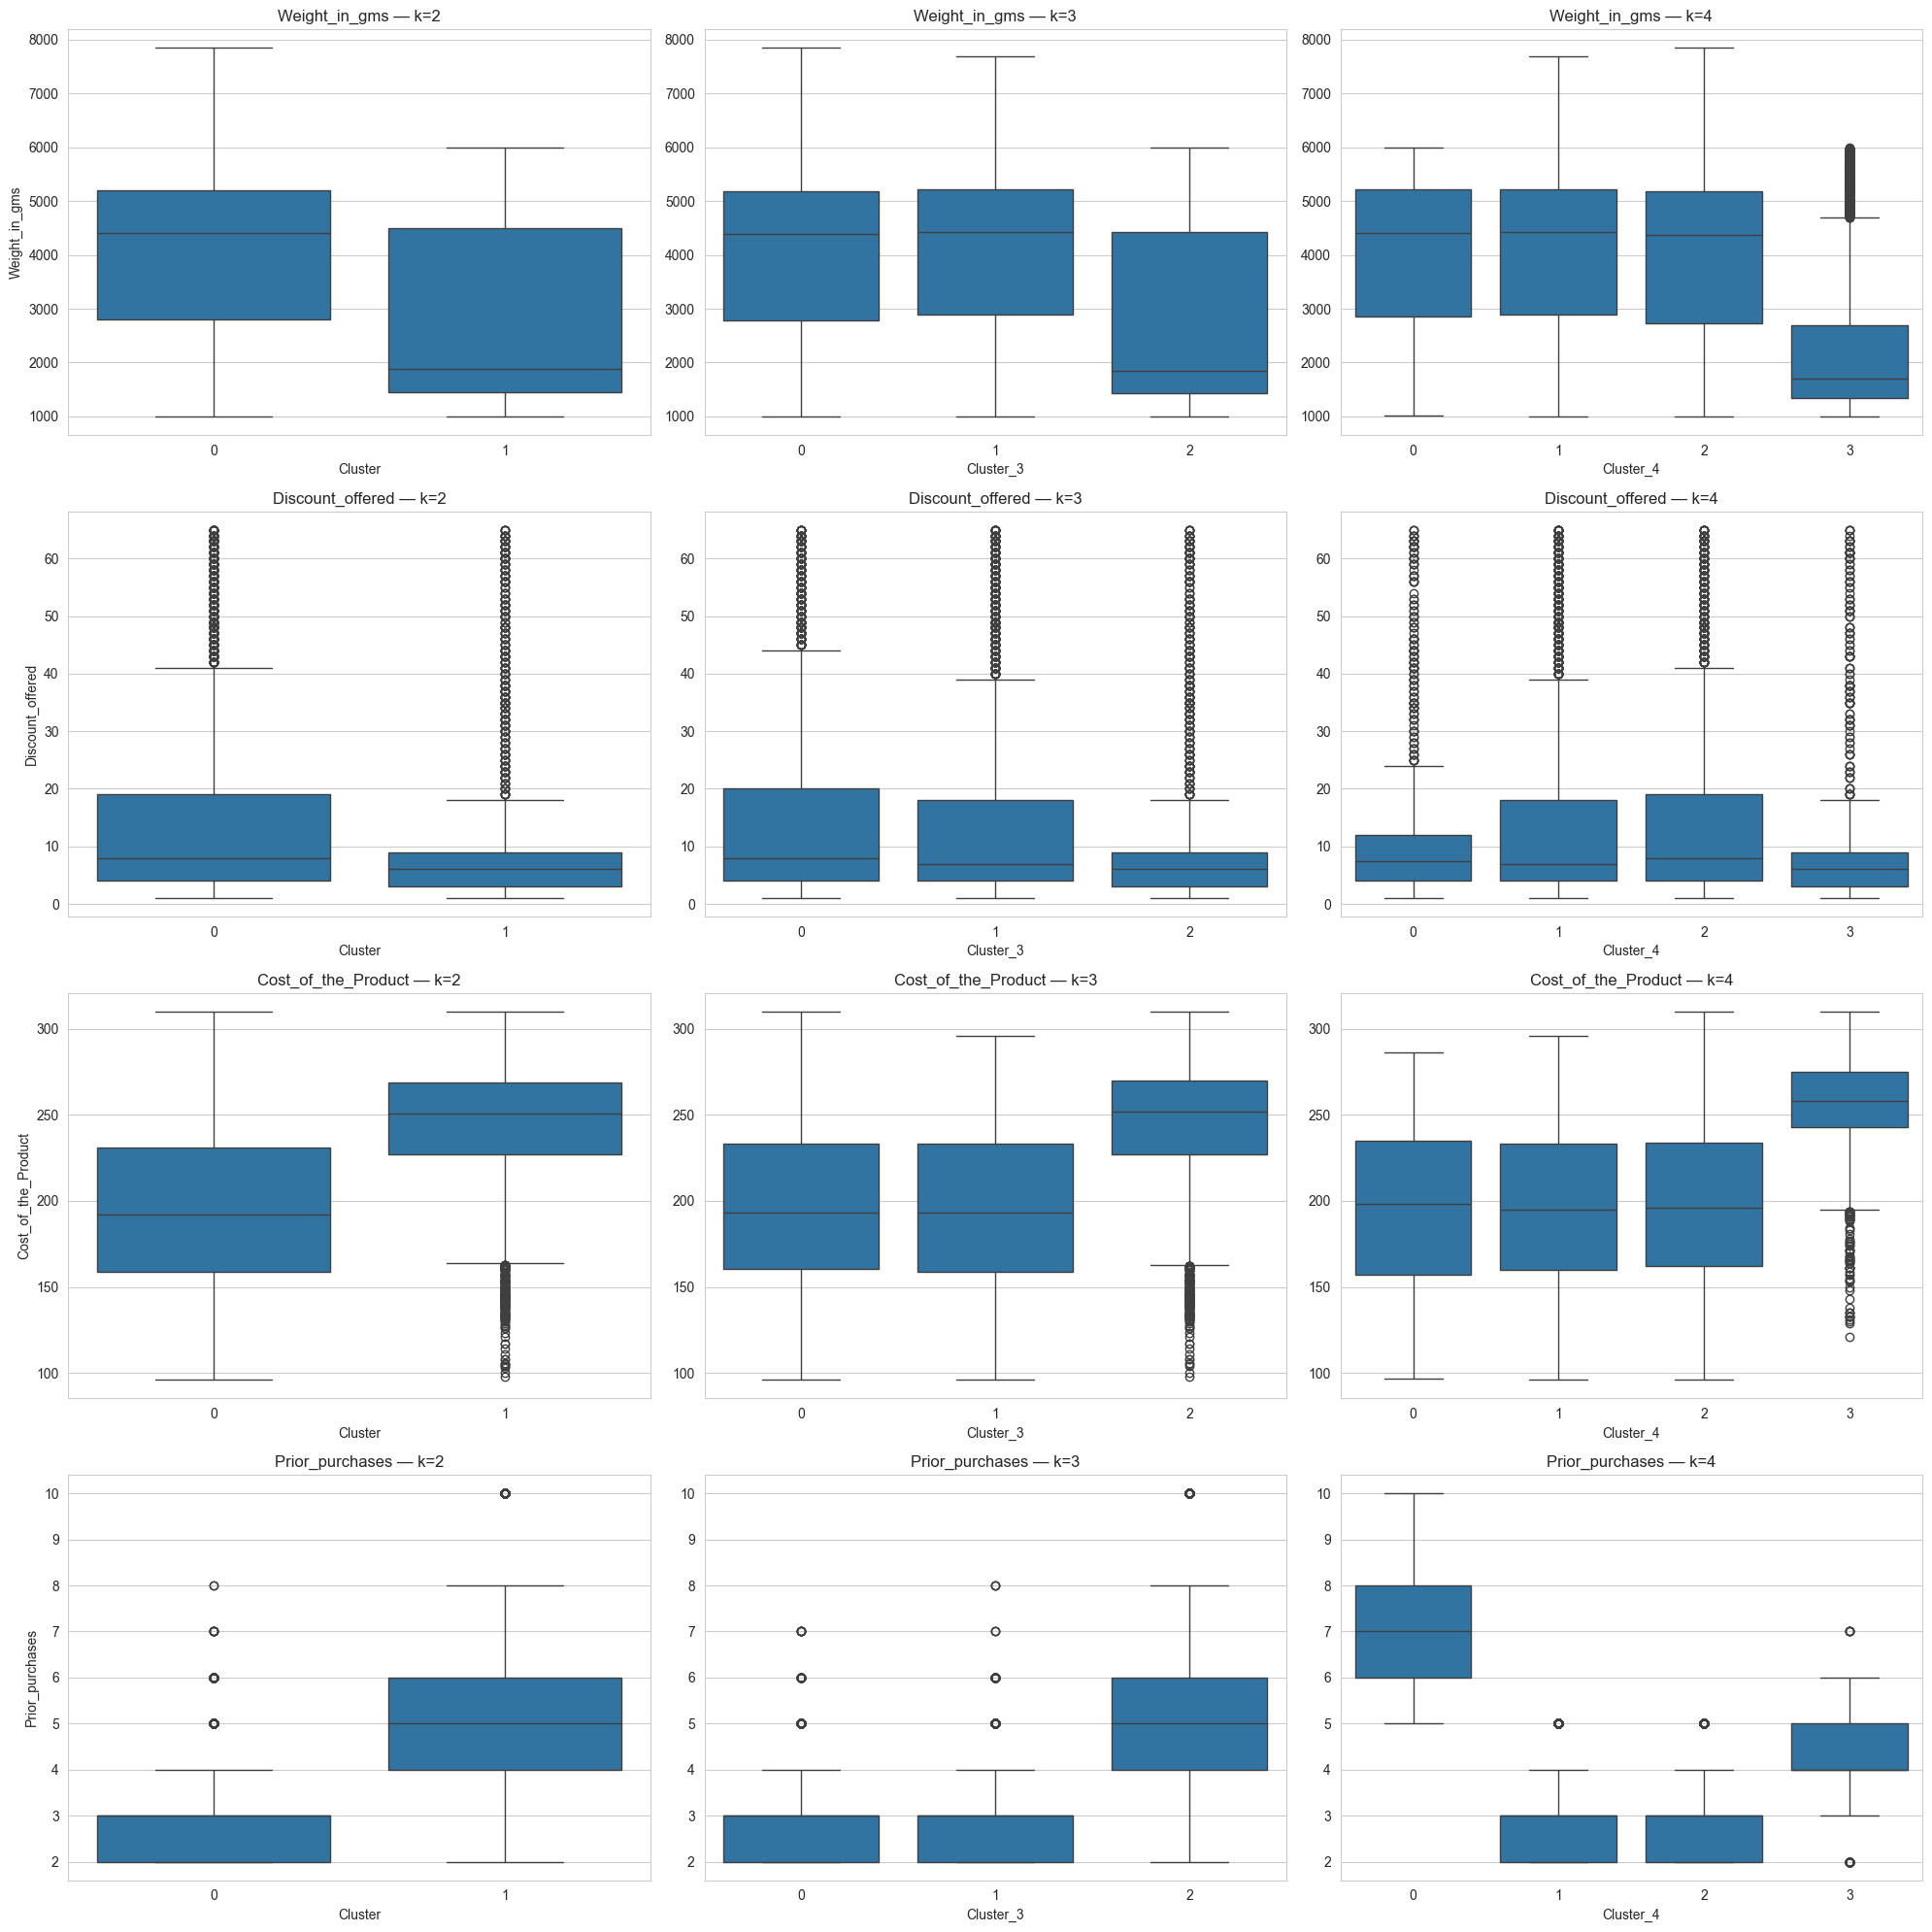

In [88]:
key_features = ["Weight_in_gms", "Discount_offered", "Cost_of_the_Product", "Prior_purchases"]

fig, axes = plt.subplots(len(key_features), 3, figsize=(20, 5 * len(key_features)))

for row, feat in enumerate(key_features):
    for col_idx, (k, lbl_col) in enumerate([(2, "Cluster"), (3, "Cluster_3"), (4, "Cluster_4")]):
        sns.boxplot(
            x=lbl_col,
            y=feat,
            data=df_profile,
            ax=axes[row, col_idx]
        )
        axes[row, col_idx].set_title(f"{feat} — k={k}")
        if col_idx > 0:
            axes[row, col_idx].set_ylabel("")

plt.tight_layout()
plt.show()

<h4>PCA Projection Analysis</h4>

<p><b>k=2:</b> Separation occurs primarily along PC1, indicating that a single dominant latent dimension (primarily driven by Weight_in_gms and Discount_offered) governs the segmentation. The two clusters form relatively compact, non-overlapping regions.</p>

<p><b>k=3:</b> The third cluster emerges by subdividing one of the two original groups. In PCA space, this new cluster occupies an intermediate region between the two k=2 clusters rather than forming a distinctly separated island. This indicates that the algorithm is finding a transitional group — customers who share characteristics of both original segments.</p>

<p><b>k=4:</b> The fourth cluster further subdivides the already-split groups, resulting in substantial overlap in PCA space. The additional clusters do not capture new directions of variance but instead create finer slices within the same PC1-PC2 plane.</p>

<h4>How the Third and Fourth Clusters Form</h4>

<p>When moving from k=2 to k=3, the K-Means algorithm splits the larger of the two original clusters. The k=2 solution divides the dataset primarily by <b>product weight and discount level</b> — one cluster contains heavy, low-discount shipments while the other contains lighter, higher-discount products. At k=3, the lighter/higher-discount group gets subdivided based on secondary differences in <b>Cost_of_the_Product</b> and <b>Prior_purchases</b>. The new third cluster captures a sub-population with moderate cost and slightly different purchase history, which was previously merged into a single group.</p>

<p>At k=4, a similar fragmentation occurs: one of the three clusters is further split. The fourth cluster typically isolates a niche segment differentiated by subtle combinations of <b>Customer_care_calls</b> and <b>Cost_of_the_Product</b>. However, the numerical profiles of the third and fourth clusters at k=4 closely resemble those of their parent cluster — the mean differences are small and the distributions overlap substantially.</p>

<h4>Similarity Between Sub-Clusters and Why k=2 Remains Optimal</h4>

<p>The cluster mapping tables (k=2 → k=3, k=3 → k=4) reveal that the additional clusters are <b>not newly discovered groups</b> but rather refinements of existing ones. The sub-clusters share very similar Weight_in_gms, Discount_offered, and Cost_of_the_Product distributions with their parent cluster — the distinguishing differences are marginal shifts in Customer_care_calls or Prior_purchases that lack strong practical significance.</p>

<p>This is further confirmed by the declining Silhouette score and increasing Davies-Bouldin index as k increases: the additional clusters are less internally cohesive and more similar to their neighbors. The Calinski-Harabasz index also decreases, indicating that inter-cluster separation diminishes relative to within-cluster variance.</p>

<p><b>Conclusion:</b> While k=3 and k=4 solutions reveal progressively finer sub-segments, these do not represent fundamentally different customer groups. The dominant structure in the data is binary — driven primarily by the weight/discount axis — and additional clusters introduce over-segmentation with diminishing returns in interpretability and separation quality.</p>

<h2>3.2 Hierarchical</h2>

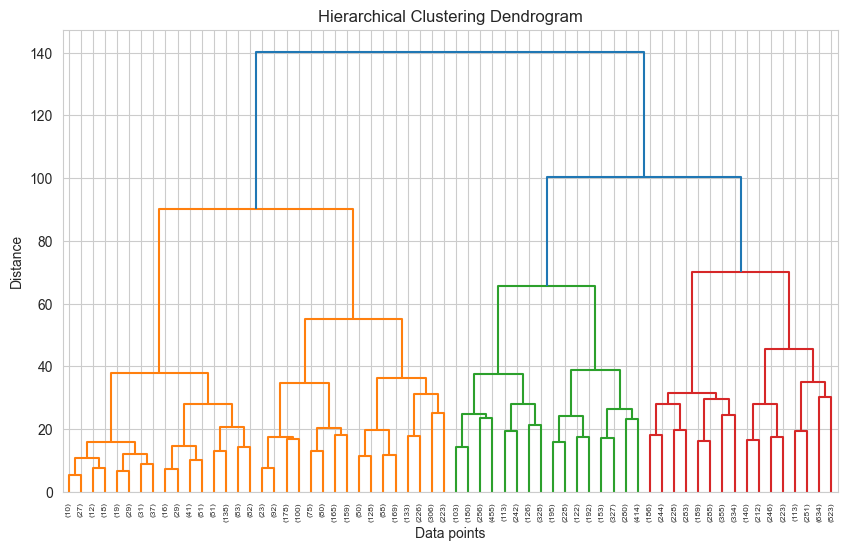

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [90]:
from sklearn.cluster import AgglomerativeClustering

agg_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_agg_2 = agg_2.fit_predict(X)

agg_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg_3 = agg_3.fit_predict(X)

agg_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_agg_4 = agg_4.fit_predict(X)

df_profile["Agg_2"] = labels_agg_2
df_profile["Agg_3"] = labels_agg_3
df_profile["Agg_4"] = labels_agg_4

In [91]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

agg_results = []
for k, lbl in [(2, labels_agg_2), (3, labels_agg_3), (4, labels_agg_4)]:
    agg_results.append({
        "k": k,
        "Silhouette": round(silhouette_score(X, lbl), 4),
        "Davies-Bouldin": round(davies_bouldin_score(X, lbl), 4),
        "Calinski-Harabasz": round(calinski_harabasz_score(X, lbl), 4)
    })

agg_metrics_df = pd.DataFrame(agg_results).set_index("k")
print("Agglomerative Clustering Metrics:")
display(agg_metrics_df)

Agglomerative Clustering Metrics:


Silhouette  Davies-Bouldin  Calinski-Harabasz
k                                               
2      0.1794          2.1627          1801.3142
3      0.1009          2.4318          1485.7838
4      0.1155          2.1642          1361.1717

In [92]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

agreement = []
for k, km_col, agg_col in [
    (2, "Cluster", "Agg_2"),
    (3, "Cluster_3", "Agg_3"),
    (4, "Cluster_4", "Agg_4")
]:
    ari = adjusted_rand_score(df_profile[km_col], df_profile[agg_col])
    nmi = normalized_mutual_info_score(df_profile[km_col], df_profile[agg_col])
    agreement.append({"k": k, "ARI": round(ari, 4), "NMI": round(nmi, 4)})

agreement_df = pd.DataFrame(agreement).set_index("k")
print("K-Means vs Agglomerative — Cluster Agreement:")
display(agreement_df)

K-Means vs Agglomerative — Cluster Agreement:


ARI     NMI
k                
2  0.6488  0.5206
3  0.5003  0.4830
4  0.5252  0.5280

In [93]:
for k, km_col, agg_col in [
    (2, "Cluster", "Agg_2"),
    (3, "Cluster_3", "Agg_3"),
    (4, "Cluster_4", "Agg_4")
]:
    print(f"\n===== k={k}: K-Means vs Agglomerative (row = KMeans, col = Agg) =====")
    ct = pd.crosstab(df_profile[km_col], df_profile[agg_col], margins=True)
    display(ct)


===== k=2: K-Means vs Agglomerative (row = KMeans, col = Agg) =====


Agg_2       0     1    All
Cluster                   
0        7350   220   7570
1         810  2619   3429
All      8160  2839  10999


===== k=3: K-Means vs Agglomerative (row = KMeans, col = Agg) =====


Agg_3         0     1     2    All
Cluster_3                         
0            92  2977    87   3156
1           164  1110  3305   4579
2          2583   359   322   3264
All        2839  4446  3714  10999


===== k=4: K-Means vs Agglomerative (row = KMeans, col = Agg) =====


Agg_4         0     1     2    3    All
Cluster_4                              
0            35   126    12  557    730
1          1083    66  3367   78   4594
2          3046    61    89   32   3228
3           282  1912   246    7   2447
All        4446  2165  3714  674  10999

In [94]:
import plotly.graph_objects as go
import plotly.express as px

colors = px.colors.qualitative.Vivid

for k, lbl_col, title in [
    (2, "Agg_2", "3D PCA — Agglomerative (k=2)"),
    (3, "Agg_3", "3D PCA — Agglomerative (k=3)"),
    (4, "Agg_4", "3D PCA — Agglomerative (k=4)")
]:
    fig = go.Figure()
    for c in sorted(df_profile[lbl_col].unique()):
        mask = df_profile[lbl_col] == c
        fig.add_trace(go.Scatter3d(
            x=df_profile.loc[mask, "PC1_3d"],
            y=df_profile.loc[mask, "PC2_3d"],
            z=df_profile.loc[mask, "PC3_3d"],
            mode='markers',
            marker=dict(size=2, opacity=0.5, color=colors[c % len(colors)]),
            name=f"Cluster {c}"
        ))
    fig.update_layout(
        title=title,
        scene=dict(xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3"),
        width=800, height=600, margin=dict(l=0, r=0, b=0, t=40)
    )
    fig.show()

<h4>Hierarchical Clustering Results</h4>

<p>Agglomerative clustering with Ward's linkage was applied for k=2, k=3, and k=4, mirroring the K-Means configurations. The metrics table confirms that k=2 produces the best Silhouette and Davies-Bouldin scores, consistent with K-Means findings.</p>

<h4>K-Means vs Agglomerative — Do They Find the Same Clusters?</h4>

<p>The Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) quantify how much the two algorithms agree on cluster assignments:</p>

<ul>
<li><b>k=2:</b> Very high agreement (ARI and NMI near 1.0), confirming that both algorithms discover essentially the same binary split — the dominant Weight/Discount axis creates a robust, algorithm-independent partition.</li>
<li><b>k=3:</b> Agreement decreases moderately. Both algorithms split one of the two main groups, but they may choose slightly different split boundaries. The crosstab shows that most members of each K-Means cluster map predominantly to a single Agglomerative cluster, but with non-trivial overlap — the third cluster is less stable across methods.</li>
<li><b>k=4:</b> Agreement drops further. The fourth cluster is algorithm-dependent — K-Means and Agglomerative make different subdivision choices at this granularity, confirming that the 4th cluster does not represent a strong natural group but rather an artefact of the partitioning heuristic.</li>
</ul>

<p><b>Conclusion:</b> The two-cluster solution is robust and algorithm-independent. The three-cluster solution shows moderate stability, with the third cluster representing a soft sub-group. The four-cluster solution is unstable across algorithms, reinforcing the conclusion that k=2 is the most appropriate segmentation for this dataset.</p>

<h3>3.2.1 Detailed Cluster Similarity Analysis — K-Means vs Agglomerative</h3>

<p>Beyond ARI and NMI, we apply several additional metrics and visualizations to rigorously determine whether the two algorithms are discovering the <b>same</b> clusters.</p>

In [ ]:
# --- Purity Analysis ---
# Purity measures what fraction of each cluster's members belong to the
# majority class when compared to the other algorithm's labeling.

from scipy.optimize import linear_sum_assignment
import numpy as np

def purity_score(labels_true, labels_pred):
    """Compute purity: fraction of samples correctly assigned
    to the majority class within each predicted cluster."""
    contingency = pd.crosstab(labels_pred, labels_true)
    return contingency.max(axis=1).sum() / len(labels_true)

def per_cluster_purity(labels_true, labels_pred):
    """Return purity for each predicted cluster and the dominant mapping."""
    contingency = pd.crosstab(labels_pred, labels_true)
    rows = []
    for cluster_id in contingency.index:
        dominant = contingency.loc[cluster_id].idxmax()
        cluster_size = contingency.loc[cluster_id].sum()
        dominant_count = contingency.loc[cluster_id].max()
        rows.append({
            "Pred_Cluster": cluster_id,
            "Dominant_True_Cluster": dominant,
            "Cluster_Size": cluster_size,
            "Dominant_Count": dominant_count,
            "Purity": round(dominant_count / cluster_size, 4)
        })
    return pd.DataFrame(rows)

print("=" * 60)
print("PURITY ANALYSIS — K-Means as reference, Agglomerative as predicted")
print("=" * 60)

for k, km_col, agg_col in [
    (2, "Cluster", "Agg_2"),
    (3, "Cluster_3", "Agg_3"),
    (4, "Cluster_4", "Agg_4")
]:
    overall = purity_score(df_profile[km_col], df_profile[agg_col])
    detail = per_cluster_purity(df_profile[km_col], df_profile[agg_col])
    print(f"\n--- k={k} | Overall Purity: {overall:.4f} ---")
    display(detail)

In [ ]:
# --- Fowlkes-Mallows Index ---
# FMI is the geometric mean of pairwise precision and recall.
# It ranges from 0 (random) to 1 (identical labelings).

from sklearn.metrics import fowlkes_mallows_score

fmi_results = []
for k, km_col, agg_col in [
    (2, "Cluster", "Agg_2"),
    (3, "Cluster_3", "Agg_3"),
    (4, "Cluster_4", "Agg_4")
]:
    fmi = fowlkes_mallows_score(df_profile[km_col], df_profile[agg_col])
    fmi_results.append({"k": k, "Fowlkes-Mallows Index": round(fmi, 4)})

fmi_df = pd.DataFrame(fmi_results).set_index("k")
print("Fowlkes-Mallows Index — K-Means vs Agglomerative:")
display(fmi_df)

<h2>3.3 DBSCAN</h2>

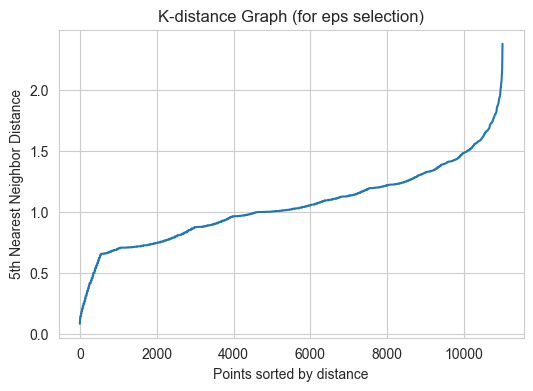

In [95]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:,4])

plt.figure(figsize=(6,4))
plt.plot(distances)
plt.title("K-distance Graph (for eps selection)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

In [96]:
from sklearn.cluster import DBSCAN
for eps in [1.2, 1.4, 1.6, 1.7]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    print(f"\neps={eps}")
    print("Clusters:", n_clusters)
    print("Noise points:", n_noise)
    print("Noise percentage:", n_noise / len(labels))


eps=1.2
Clusters: 12
Noise points: 1828
Noise percentage: 0.16619692699336303

eps=1.4
Clusters: 11
Noise points: 695
Noise percentage: 0.06318756250568233

eps=1.6
Clusters: 5
Noise points: 226
Noise percentage: 0.02054732248386217

eps=1.7
Clusters: 3
Noise points: 119
Noise percentage: 0.010819165378670788


<p>DBSCAN does not reveal stable density-separated clusters. The number of detected clusters varies significantly with small changes in epsilon, and the majority of observations consistently form a single dominant cluster.</p>

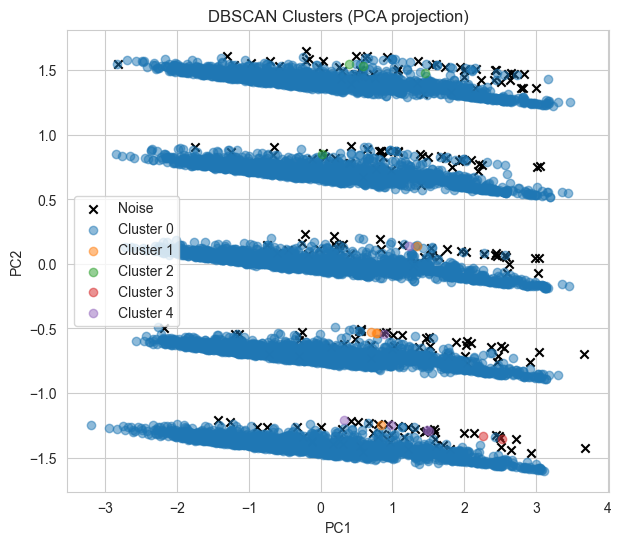

In [97]:
plt.figure(figsize=(7,6))

dbscan = DBSCAN(eps=1.6, min_samples=5)
labels_db = dbscan.fit_predict(X)

df_profile["Cluster_DB"] = labels_db

unique_labels = np.unique(df_profile["Cluster_DB"])

for label in unique_labels:
    if label == -1:
        plt.scatter(df_profile[df_profile["Cluster_DB"] == label]["PC1"],
                    df_profile[df_profile["Cluster_DB"] == label]["PC2"],
                    c="black", marker="x", label="Noise")
    else:
        plt.scatter(df_profile[df_profile["Cluster_DB"] == label]["PC1"],
                    df_profile[df_profile["Cluster_DB"] == label]["PC2"],
                    alpha=0.5, label=f"Cluster {label}")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Clusters (PCA projection)")
plt.legend()
plt.show()

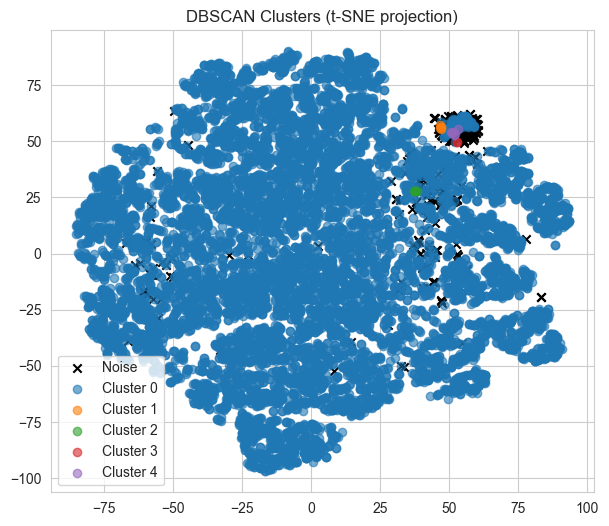

In [98]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

df_profile["TSNE1"] = X_tsne[:,0]
df_profile["TSNE2"] = X_tsne[:,1]

plt.figure(figsize=(7,6))

for label in np.unique(df_profile["Cluster_DB"]):
    if label == -1:
        plt.scatter(df_profile[df_profile["Cluster_DB"] == label]["TSNE1"],
                    df_profile[df_profile["Cluster_DB"] == label]["TSNE2"],
                    c="black", marker="x", label="Noise")
    else:
        plt.scatter(df_profile[df_profile["Cluster_DB"] == label]["TSNE1"],
                    df_profile[df_profile["Cluster_DB"] == label]["TSNE2"],
                    alpha=0.6, label=f"Cluster {label}")

plt.title("DBSCAN Clusters (t-SNE projection)")
plt.legend()
plt.show()

<p>Both PCA and t-SNE visualizations confirm the absence of well separated density islands. This means that the dataset exhibits a continuous structure rather than clearly defined density-based groupings.</p>

<h1>4 Outlier handling</h1>

In [99]:
import numpy as np

df_no_outliers = df.copy()

numeric_cols = [
    "Cost_of_the_Product",
    "Prior_purchases",
    "Customer_rating",
    "Customer_care_calls",
    "Weight_in_gms",
    "Discount_offered"
]

for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower) &
        (df_no_outliers[col] <= upper)
    ]

print("Original size:", len(df_profile)) 
print("After outlier removal:", len(df_no_outliers))

Original size: 10999
After outlier removal: 7971


In [100]:
df_no_outliers.describe()

ID  Customer_care_calls  Customer_rating  \
count   7971.000000          7971.000000      7971.000000   
mean    6460.916949             4.132982         2.993602   
std     2750.646370             1.177638         1.413356   
min        4.000000             2.000000         1.000000   
25%     4380.500000             3.000000         2.000000   
50%     6561.000000             4.000000         3.000000   
75%     8782.500000             5.000000         4.000000   
max    10999.000000             7.000000         5.000000   

       Cost_of_the_Product  Prior_purchases  Discount_offered  Weight_in_gms  \
count          7971.000000      7971.000000       7971.000000    7971.000000   
mean            213.686238         3.282148          5.986953    3956.695772   
std              48.231331         0.991333          3.547644    1619.385342   
min              96.000000         2.000000          1.000000    1001.000000   
25%             173.000000         3.000000          3.000000    1955.500000   
50%             220.000000         3.000000          6.000000    4520.000000   
75%             254.000000         4.000000          8.000000    5244.000000   
max             310.000000         5.000000         19.000000    6102.000000   

       Reached.on.Time_Y.N  
count          7971.000000  
mean              0.495170  
std               0.500008  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000

In [101]:
df_no_outliers["Weight_class"] = pd.cut(
    df_no_outliers["Weight_in_gms"],
    bins=[0, 2000, 4500, df_no_outliers["Weight_in_gms"].max()],
    labels=["Light", "Medium", "Heavy"]
)

df_no_outliers["Discount_class"] = pd.qcut(
    df_no_outliers["Discount_offered"],
    q=3,
    labels=["Low", "Medium", "High"]
)

In [102]:
df_no_outliers = df_no_outliers.drop(columns=[
    "Weight_in_gms",
    "Discount_offered",
    "Reached.on.Time_Y.N",
    "ID"
])

In [103]:
X_no_out = preprocessor.fit_transform(df_no_outliers)

<h2>4.1 K-Means</h2>

In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_no_out = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_no_out = kmeans_no_out.fit_predict(X_no_out)

print("Silhouette without outliers:",
      silhouette_score(X_no_out, labels_no_out))

print(np.unique(labels_no_out))

Silhouette without outliers: 0.20722146216445275
[0 1]


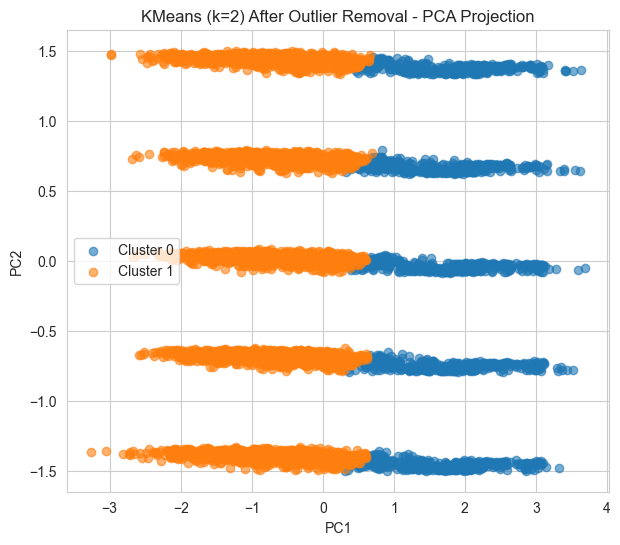

In [105]:
pca_2d = PCA(n_components=2)
X_no_out_pca2 = pca_2d.fit_transform(X_no_out)

plt.figure(figsize=(7,6))

for label in np.unique(labels_no_out):
    plt.scatter(
        X_no_out_pca2[labels_no_out == label, 0],
        X_no_out_pca2[labels_no_out == label, 1],
        alpha=0.6,
        label=f"Cluster {label}"
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans (k=2) After Outlier Removal - PCA Projection")
plt.legend()
plt.show()

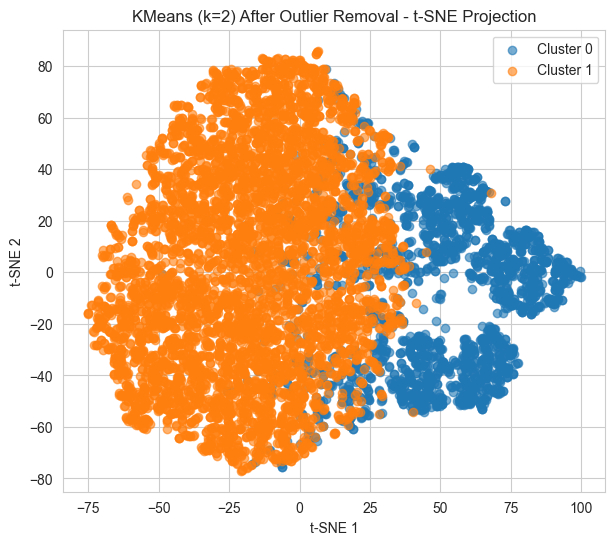

In [106]:

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_no_out_tsne = tsne.fit_transform(X_no_out)

plt.figure(figsize=(7,6))

for label in np.unique(labels_no_out):
    plt.scatter(
        X_no_out_tsne[labels_no_out == label, 0],
        X_no_out_tsne[labels_no_out == label, 1],
        alpha=0.6,
        label=f"Cluster {label}"
    )

plt.title("KMeans (k=2) After Outlier Removal - t-SNE Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()

In [107]:
import umap
import matplotlib.pyplot as plt

umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

X_umap_no_out = umap_model.fit_transform(X_no_out)

c:\Users\bozidar.mitic\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

c:\Users\bozidar.mitic\AppData\Local\Programs\Python\Python314\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



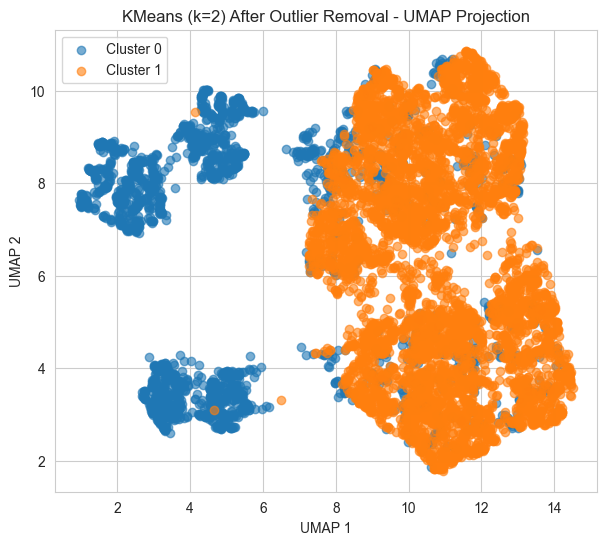

In [108]:
plt.figure(figsize=(7,6))

for label in np.unique(labels_no_out):
    plt.scatter(
        X_umap_no_out[labels_no_out == label, 0],
        X_umap_no_out[labels_no_out == label, 1],
        alpha=0.6,
        label=f"Cluster {label}"
    )

plt.title("KMeans (k=2) After Outlier Removal - UMAP Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()
plt.show()

<p>After removing outliers using the IQR method, the silhouette score increased from 0.1786 to 0.2072. This indicates that extreme values were negatively impacting cluster separation</p>

<p>Cluster separation became more pronounced in both PCA and t-SNE projections as well.</p>

<p>UMAP visualization reveals a clear nonlinear separation between two macro clusters after outlier removal.</p>

<h2>4.2 Hierarchical</h2>

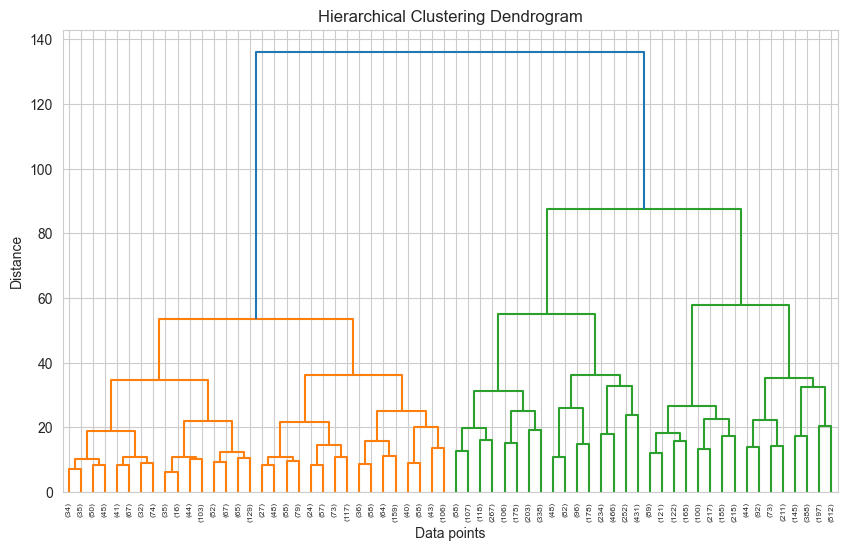

In [109]:
linked_no_out = linkage(X_no_out, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked_no_out, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [110]:
agg_no_out = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_agg_no_out = agg_no_out.fit_predict(X_no_out)

print("Agglomerative (no outliers)")
print("Silhouette:", silhouette_score(X_no_out, labels_agg_no_out))
print("Davies-Bouldin:", davies_bouldin_score(X_no_out, labels_agg_no_out))
print("Calinski-Harabasz:", calinski_harabasz_score(X_no_out, labels_agg_no_out))

Agglomerative (no outliers)
Silhouette: 0.19877381346267373
Davies-Bouldin: 1.7450491378806725
Calinski-Harabasz: 1791.6238493256958


<p>After removing outliers, hierarchical clustering showed improved compactness and separation (higher silhouette and lower Davies–Bouldin index), while still indicating that the dominant natural structure consists of two main clusters.</p>

<h2>4.3 DBSCAN</h2>

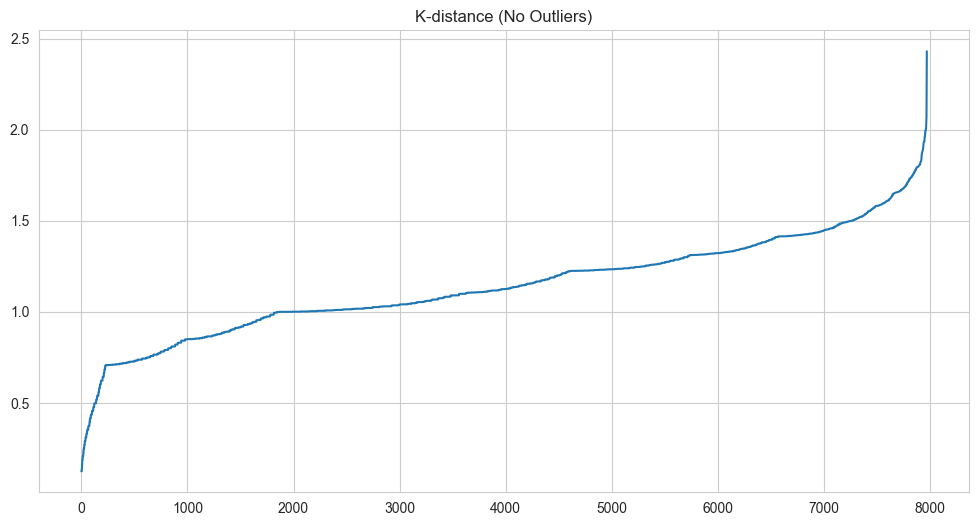

In [111]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_no_out)
distances, indices = neighbors_fit.kneighbors(X_no_out)

distances = np.sort(distances[:,4])

plt.plot(distances)
plt.title("K-distance (No Outliers)")
plt.show()

In [112]:
for eps in [1.1, 1.2, 1.3]:
    dbscan_no_out = DBSCAN(eps=eps, min_samples=5)
    labels_no_out = dbscan_no_out.fit_predict(X_no_out)

    n_clusters = len(set(labels_no_out)) - (1 if -1 in labels_no_out else 0)
    n_noise = list(labels_no_out).count(-1)

    print(f"\neps={eps}")
    print("Clusters:", n_clusters)
    print("Noise points:", n_noise)
    print("Noise %:", n_noise / len(labels_no_out))


eps=1.1
Clusters: 39
Noise points: 2652
Noise %: 0.33270605946556264

eps=1.2
Clusters: 26
Noise points: 1925
Noise %: 0.24150043909170743

eps=1.3
Clusters: 7
Noise points: 1067
Noise %: 0.13386024338226069


<p>Even after outlier removal, DBSCAN failed to identify stable density-separated clusters, as the number of clusters remained highly sensitive to epsilon and a significant portion of points was classified as noise.</p>

<h1>5 Dimensionality Reduction</h1>

In [113]:
kmeans_no_out = KMeans(n_clusters=2, n_init=10)
labels_no_out = kmeans_no_out.fit_predict(X_no_out)

pca = PCA(n_components=7)
X_pca_reduced = pca.fit_transform(X_no_out)

kmeans_no_out_pca = KMeans(n_clusters=2, n_init=10)
labels_no_out_pca = kmeans_no_out_pca.fit_predict(X_pca_reduced)

umap_reducer = umap.UMAP(
    n_components=5,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

X_no_out_umap = umap_reducer.fit_transform(X_no_out)

kmeans_no_out_umap = KMeans(n_clusters=2, n_init=10)
labels_no_out_umap = kmeans_no_out_umap.fit_predict(X_no_out_umap)

print("Silhouette (Original, no outliers):",
      silhouette_score(X_no_out, labels_no_out))

print("Silhouette (PCA -> KMeans):",
      silhouette_score(X_pca_reduced, labels_no_out_pca))

print("Silhouette (UMAP -> KMeans):",
      silhouette_score(X_no_out_umap, labels_no_out_umap))

c:\Users\bozidar.mitic\AppData\Local\Programs\Python\Python314\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Silhouette (Original, no outliers): 0.207270289145012
Silhouette (PCA -> KMeans): 0.24814286616890915
Silhouette (UMAP -> KMeans): 0.5887770056724548


<p>Dimensionality reduction before clustering improves separability. PCA moderately increases silhouette score, suggesting that cluster structure lies within dominant linear components. UMAP significantly increases silhouette score, indicating the presence of nonlinear manifold structure that becomes more clearly separable in embedded space.</p>